#1. Chuẩn bị môi trường và dữ liệu

##1.1 Cài đặt môi trường

In [67]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


##1.2 Tải và đọc dữ liệu

In [68]:
# Đọc file CSV
url = "https://raw.githubusercontent.com/ThuyAn4342/Data-Mining/main/social_media_vs_productivity.csv"
df = pd.read_csv(url)

# Xem 10 dòng đầu tiên
df.head(10)

age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                      NaN   
3   60  Female  Unemployed                      NaN   
4   25    Male          IT                      NaN   
5   38    Male     Finance                 1.512568   
6   56  Female  Unemployed                 4.381070   
7   36  Female   Education                 4.089168   
8   40  Female   Education                 4.097401   
9   28   Other          IT                 7.595577   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   
5                    Twitter                       50            6.429312   
6                     TikTok                       60            3.902309   
7                    Twitter                       49            6.560467   
8                  Instagram                       57            5.839590   
9                    Twitter                       64            5.888936   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      8.040464                   7.291555           4.0   
1                      5.063368                   5.165093           7.0   
2                      3.861762                   3.474053           4.0   
3                      2.916331                   1.774869           6.0   
4                      8.868753                        NaN           7.0   
5                           NaN                   4.081026           5.0   
6                      6.420989                   5.976408           7.0   
7                      2.681830                   2.446927           4.0   
8                      3.219022                   3.004240           4.0   
9                           NaN                        NaN           3.0   

   sleep_hours  screen_time_before_sleep  breaks_during_work  uses_focus_apps  \
0     5.116546                  0.419102                   8            False   
1     5.103897                  0.671519                   7             True   
2     8.583222                  0.624378                   0             True   
3     6.052984                  1.204540                   1            False   
4     5.405706                  1.876254                   1            False   
5     5.515251                  1.518612                   5            False   
6     7.549849                  2.252624                   4            False   
7     6.325507                  0.747998                   2            False   
8          NaN                  0.000000                  10            False   
9     6.761952                  1.449841                  10            False   

   has_digital_wellbeing_enabled  coffee_consumption_per_day  \
0                          False                           4   
1                           True                           2   
2                          False                           3   
3                          False                           0   
4                           True                           1   
5                           True                           5   
6                          False                           4   
7                          False                           4   
8                           True                           2   
9                          False                           1   

   days_feeling_burnout_per_month  weekly_offline_hours  \
0                              11             21.927072 

## 1.3 Khám phá dữ liệu (EDA)

Trong tập dữ liệu mỗi hàng là 1 người dùng độc lập  

*   Không có liên kết giữa các dòng
*   Mỗi trường là 1 thuộc tính độc lập  
==> Tập dữ liệu thuộc **Nondependency-Oriented Data**

Thuộc nhóm Categorical & Mixed Attribute Data do:
*   Có **numeric attributes**: age, number_of_notifications,actual_productivity_score
*   Có **Categorical**: gender, job_type, social_platform_preference
*   Có **Binary** (con của Categorical ): uses_focus_apps







###1.3.1 Thông tin tổng quan

In [69]:
print("Kích thước dữ liệu: ", df.shape)

Kích thước dữ liệu:  (30000, 19)


Tập dữ liệu bao gồm 30.000 dòng và 19 cột

In [70]:
#Thông tin tổng quan về tập dữ liệu
print("Thông tin tổng quan: ")
df.info()


Thông tin tổng quan: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_dur

- Các kiểu dữ liệu: int64, float64, bool và object  =>  Điều này cho thấy tập dữ liệu khá đầy đủ và đa dạng về kiểu dữ liệu, thích hợp cho các bài toán phân tích, dự đoán hoặc gom cụm.
- Các cột dạng object(categorical) cần Label Encoding


In [71]:
#thống kê mô tả cho các biến số định lượng
print("\nThống kê mô tả:")
df.describe()



Thống kê mô tả:


age  daily_social_media_time  number_of_notifications  \
count  30000.000000             27235.000000             30000.000000   
mean      41.486867                 3.113418                59.958767   
std       13.835221                 2.074813                 7.723772   
min       18.000000                 0.000000                30.000000   
25%       30.000000                 1.639566                55.000000   
50%       41.000000                 3.025913                60.000000   
75%       53.000000                 4.368917                65.000000   
max       65.000000                17.973256                90.000000   

       work_hours_per_day  perceived_productivity_score  \
count        30000.000000                  28386.000000   
mean             6.990792                      5.510488   
std              1.997736                      2.023470   
min              0.000000                      2.000252   
25%              5.643771                      3.757861   
50%              6.990641                      5.525005   
75%              8.354725                      7.265776   
max             12.000000                      8.999376   

       actual_productivity_score  stress_level   sleep_hours  \
count               27635.000000  28096.000000  27402.000000   
mean                    4.951805      5.514059      6.500247   
std                     1.883378      2.866344      1.464004   
min                     0.296812      1.000000      3.000000   
25%                     3.373284      3.000000      5.493536   
50%                     4.951742      6.000000      6.498340   
75%                     6.526342      8.000000      7.504143   
max                     9.846258     10.000000     10.000000   

       screen_time_before_sleep  breaks_during_work  \
count              27789.000000        30000.000000   
mean                   1.025568            4.992200   
std                    0.653355            3.173737   
min                    0.000000            0.000000   
25%                    0.528490            2.000000   
50%                    1.006159            5.000000   
75%                    1.477221            8.000000   
max                    3.000000           10.000000   

       coffee_consumption_per_day  days_feeling_burnout_per_month  \
count                30000.000000                    30000.000000   
mean                     1.999300                       15.557067   
std                      1.410047                        9.252956   
min                      0.000000                        0.000000   
25%                      1.000000                        8.000000   
50%                      2.000000                       16.000000   
75%                      3.000000                       24.000000   
max                     10.000000                       31.000000   

       weekly_offline_hours  job_satisfaction_score  
count          30000.000000            27270.000000  
mean              10.360655                4.964901  
std                7.280415                2.121194  
min                0.000000                0.000000  
25%                4.541872                3.363580  
50%               10.013677                4.951049  
75%               15.300809                6.581323  
max               40.964769               10.000000

###1.3.2 Xác định tỉ lệ NaN trên các cột

In [72]:
# Tỉ lệ NaN/ cột
print((df.isnull().sum() / len(df) * 100).round(2))

age                               0.00
gender                            0.00
job_type                          0.00
daily_social_media_time           9.22
social_platform_preference        0.00
number_of_notifications           0.00
work_hours_per_day                0.00
perceived_productivity_score      5.38
actual_productivity_score         7.88
stress_level                      6.35
sleep_hours                       8.66
screen_time_before_sleep          7.37
breaks_during_work                0.00
uses_focus_apps                   0.00
has_digital_wellbeing_enabled     0.00
coffee_consumption_per_day        0.00
days_feeling_burnout_per_month    0.00
weekly_offline_hours              0.00
job_satisfaction_score            9.10
dtype: float64


--  Các cột có giá trị bị thiếu (null): daily_social_media_time, perceived_productivity_score, actual_productivity_score, stress_level , sleep_hours, screen_time_before_sleep, job_satisfaction_score                    

=> Cần tiền xử lý trước khi đưa vào mô hình để huấn luyện.

###1.3.3 Đánh giá phân bổ các biến định lượng




*   Thực hiện đánh giá các chỉ số: **skew**, **kurtosis** để nhận định phân bổ dữ liệu
*   Xác định số outlier theo: **Z-score** và **IQR**
*   Trực quan với: **Histogram** + **KDE** và **Boxplot**




 Phân tích phân phối cho cột: age
  → Skewness  = 0.0153 (Gần chuẩn)
  → Kurtosis  = 1.8088 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


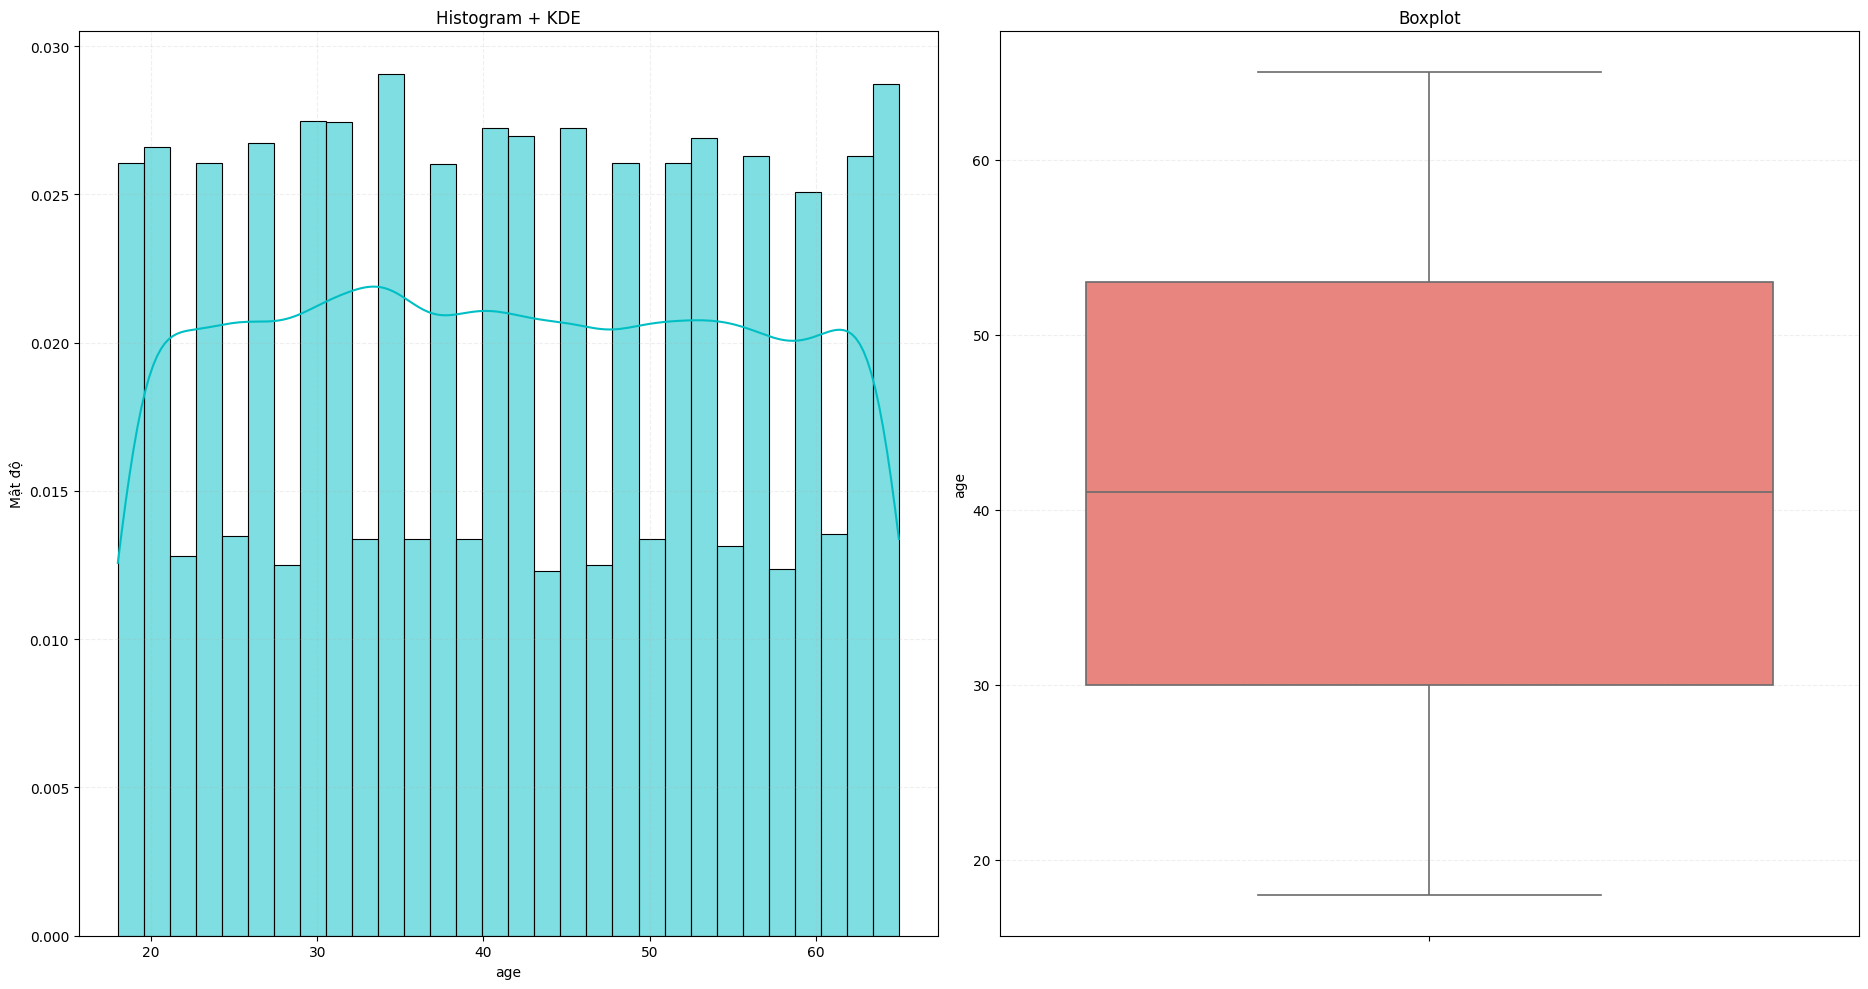


 Phân tích phân phối cho cột: daily_social_media_time
  → Skewness  = 1.1916 (Lệch mạnh phải)
  → Kurtosis  = 8.2041 (Nhọn)
  → Số lượng outlier(z-score): 167
  → Số lượng outlier(IQR): 226


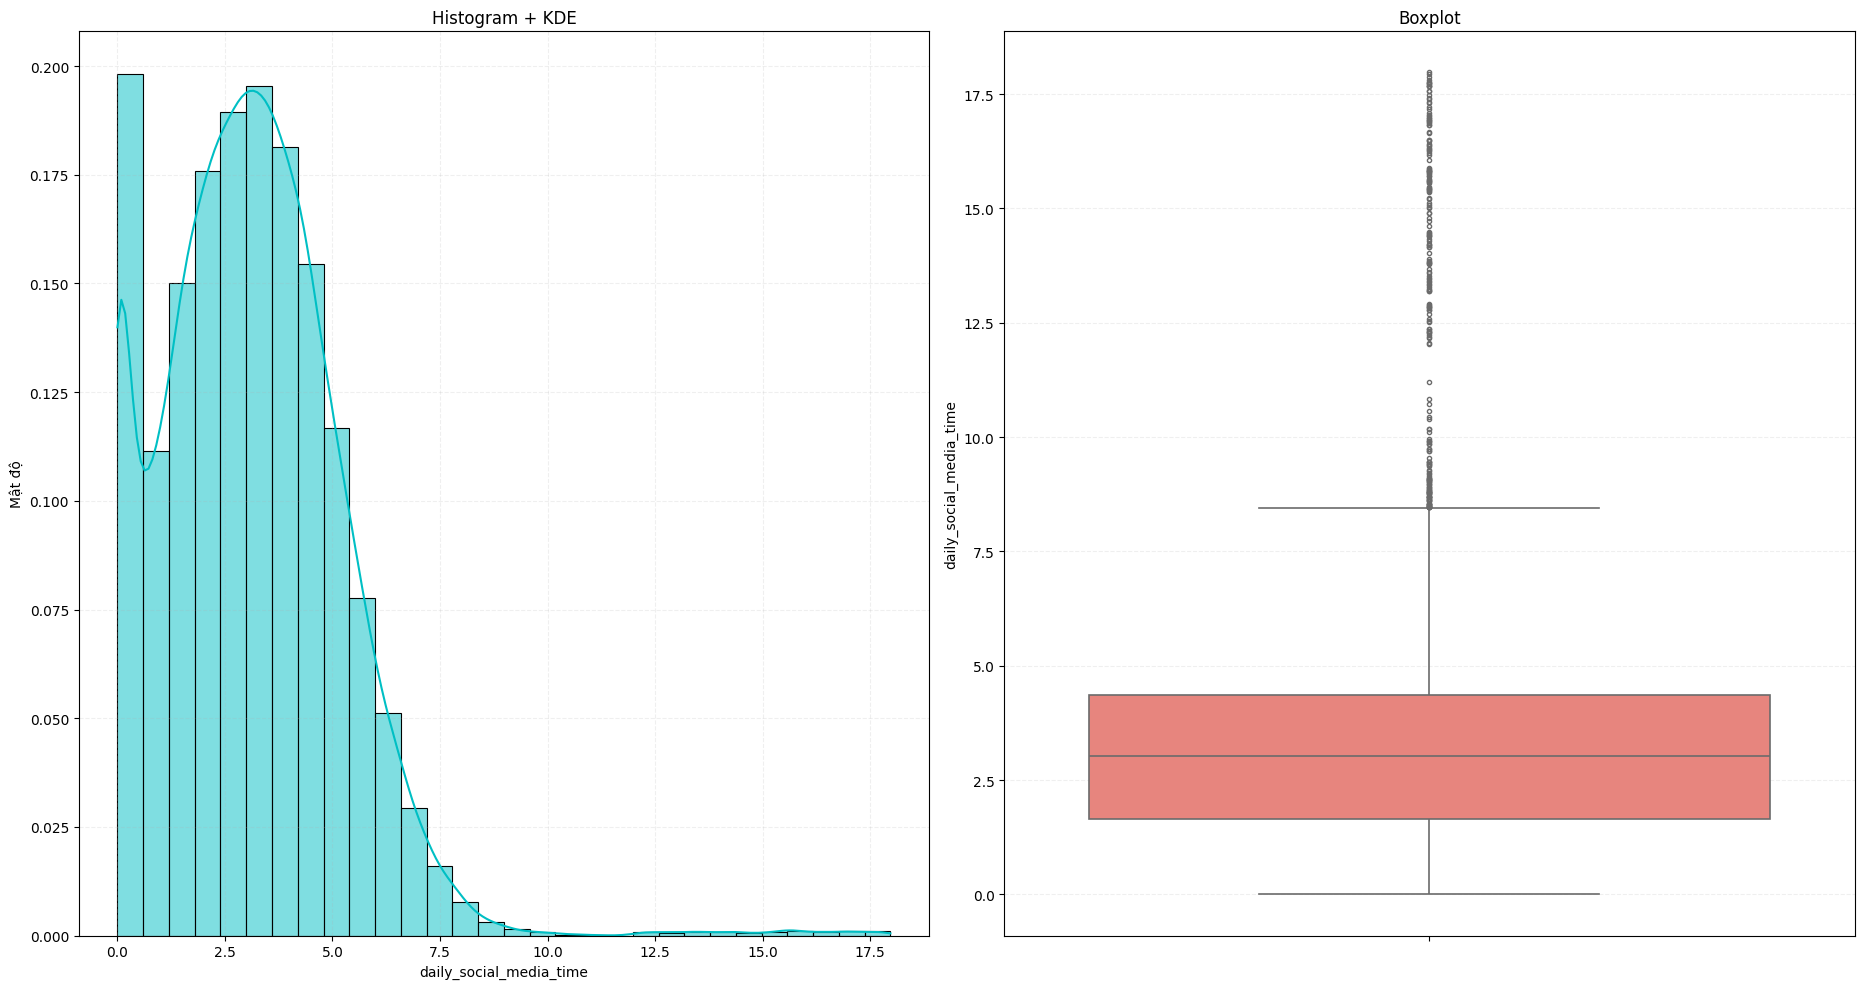


 Phân tích phân phối cho cột: number_of_notifications
  → Skewness  = 0.1177 (Lệch nhẹ phải)
  → Kurtosis  = 3.0406 (Nhọn)
  → Số lượng outlier(z-score): 84
  → Số lượng outlier(IQR): 261


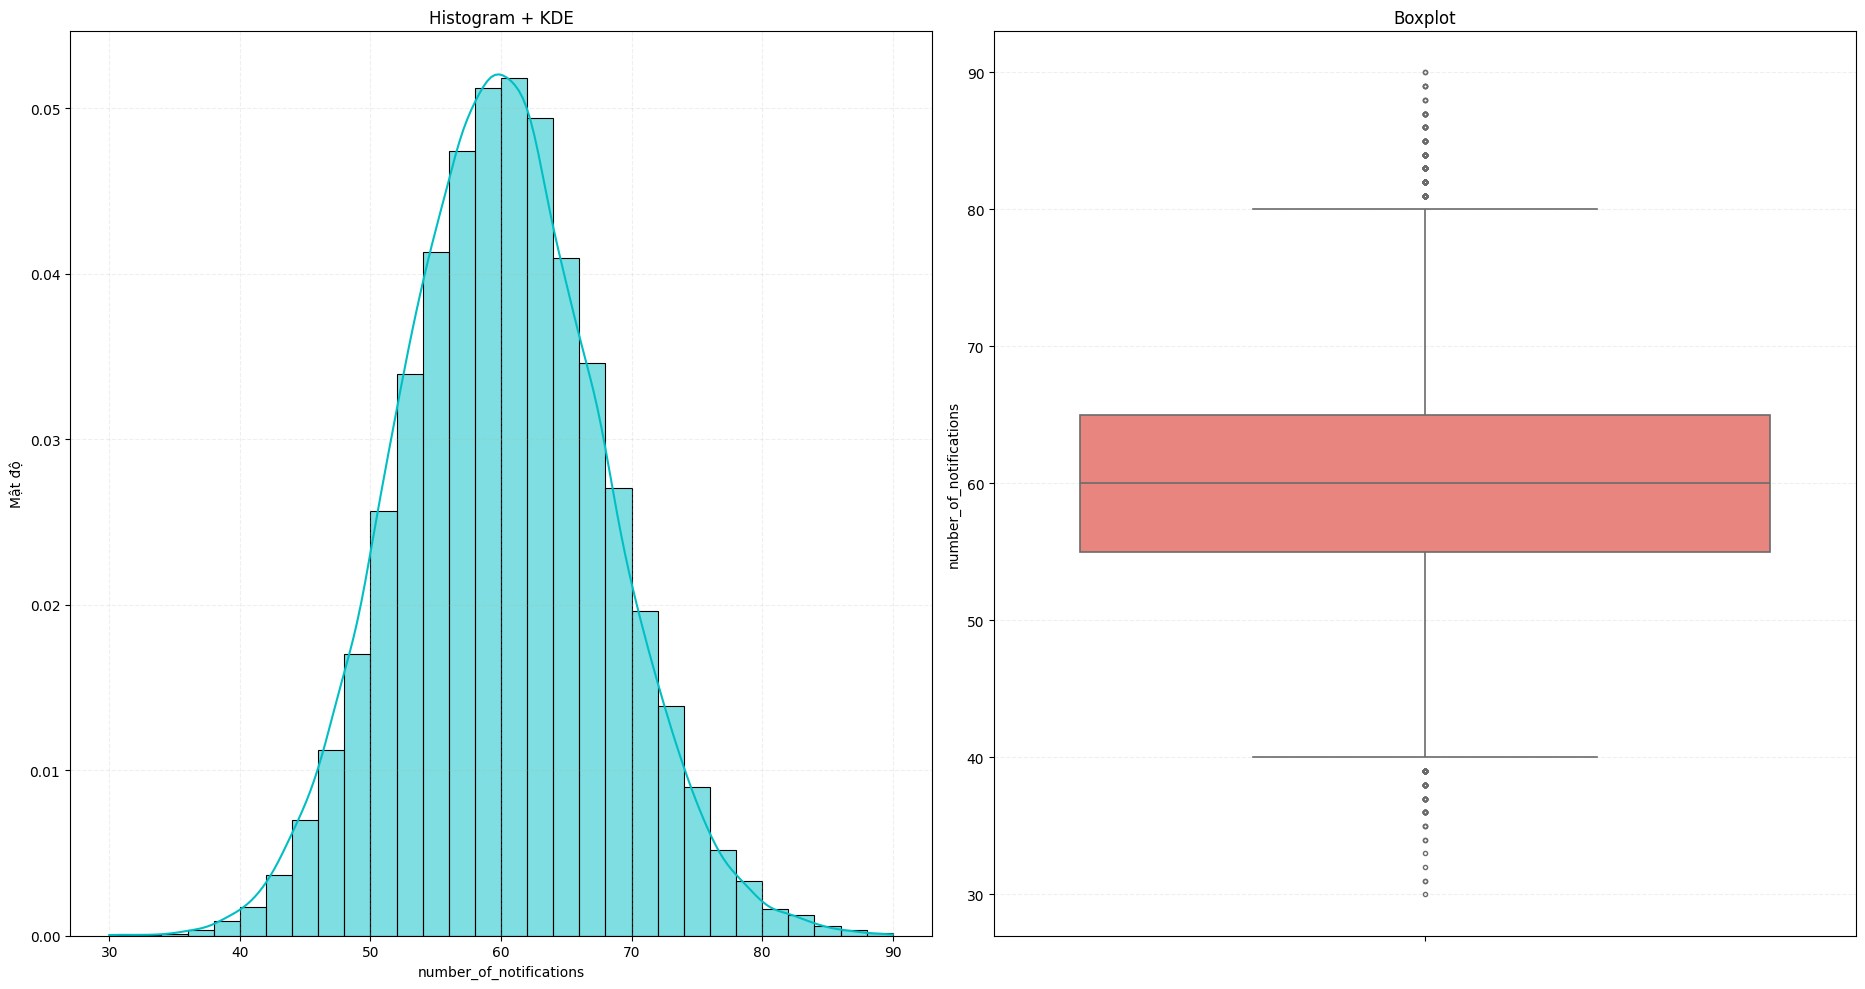


 Phân tích phân phối cho cột: work_hours_per_day
  → Skewness  = -0.0382 (Gần chuẩn)
  → Kurtosis  = 2.8408 (Dẹt)
  → Số lượng outlier(z-score): 36
  → Số lượng outlier(IQR): 97


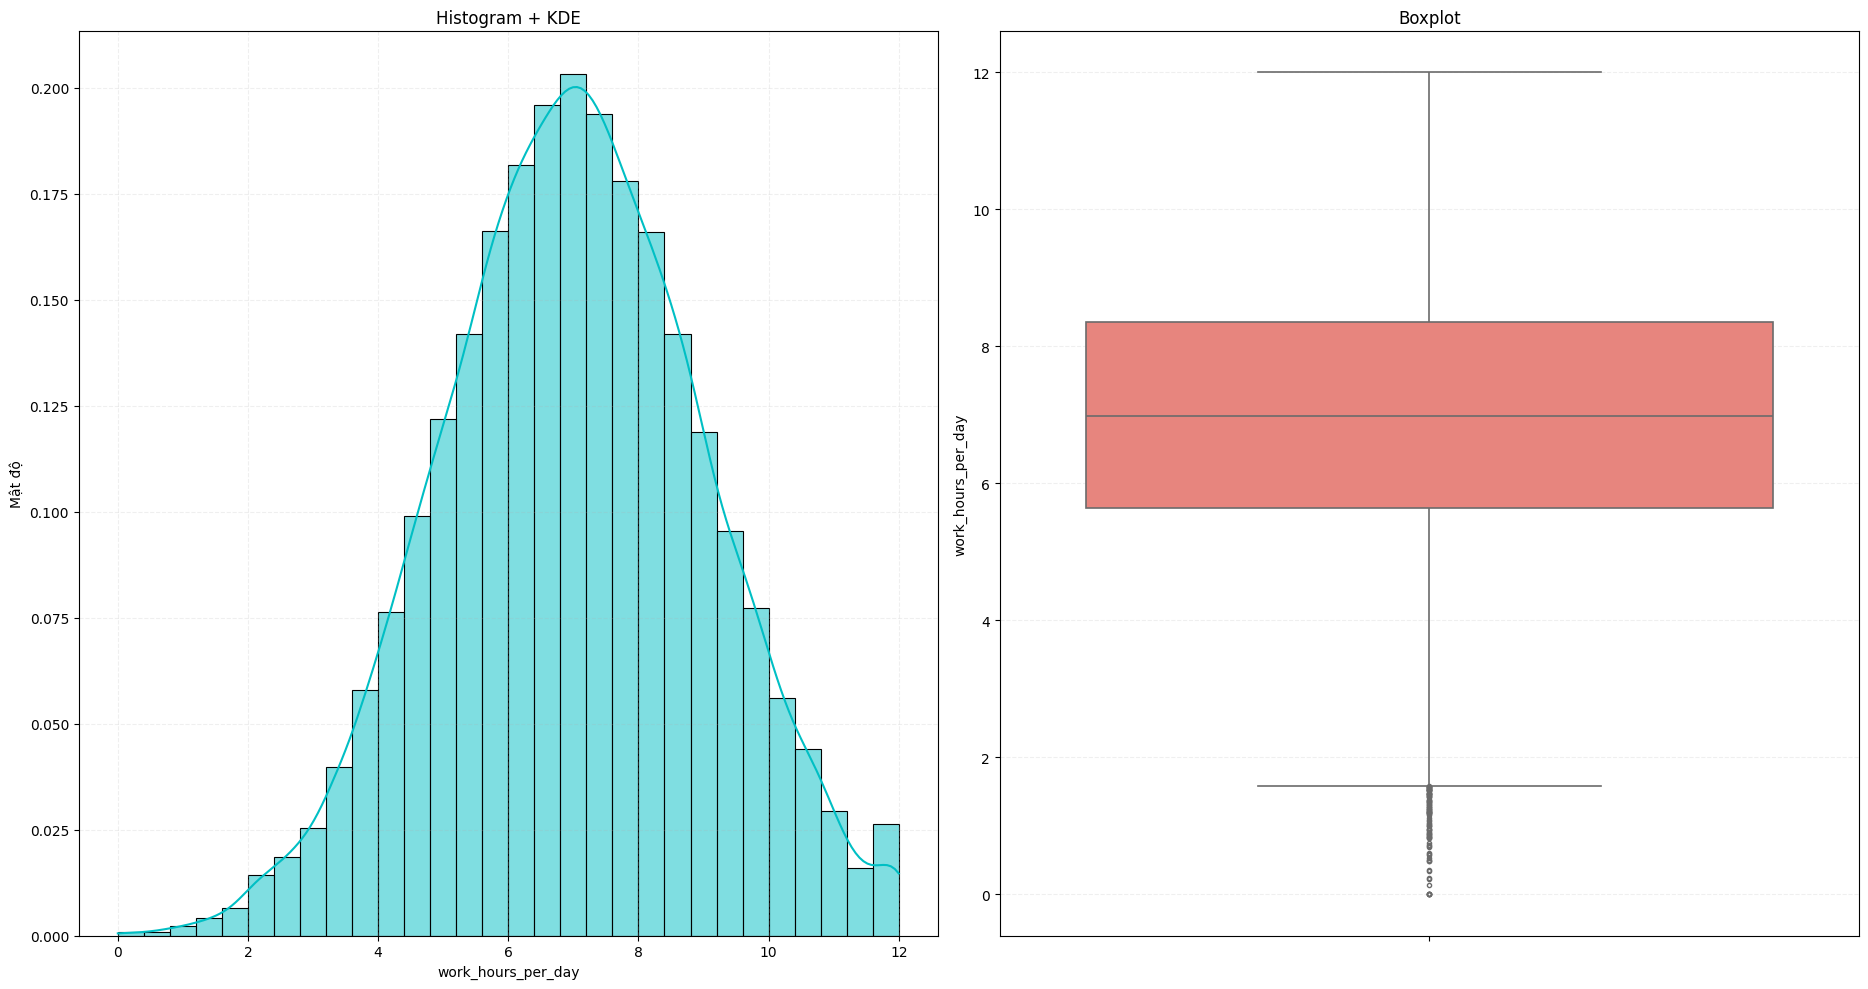


 Phân tích phân phối cho cột: perceived_productivity_score
  → Skewness  = -0.0112 (Gần chuẩn)
  → Kurtosis  = 1.7957 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


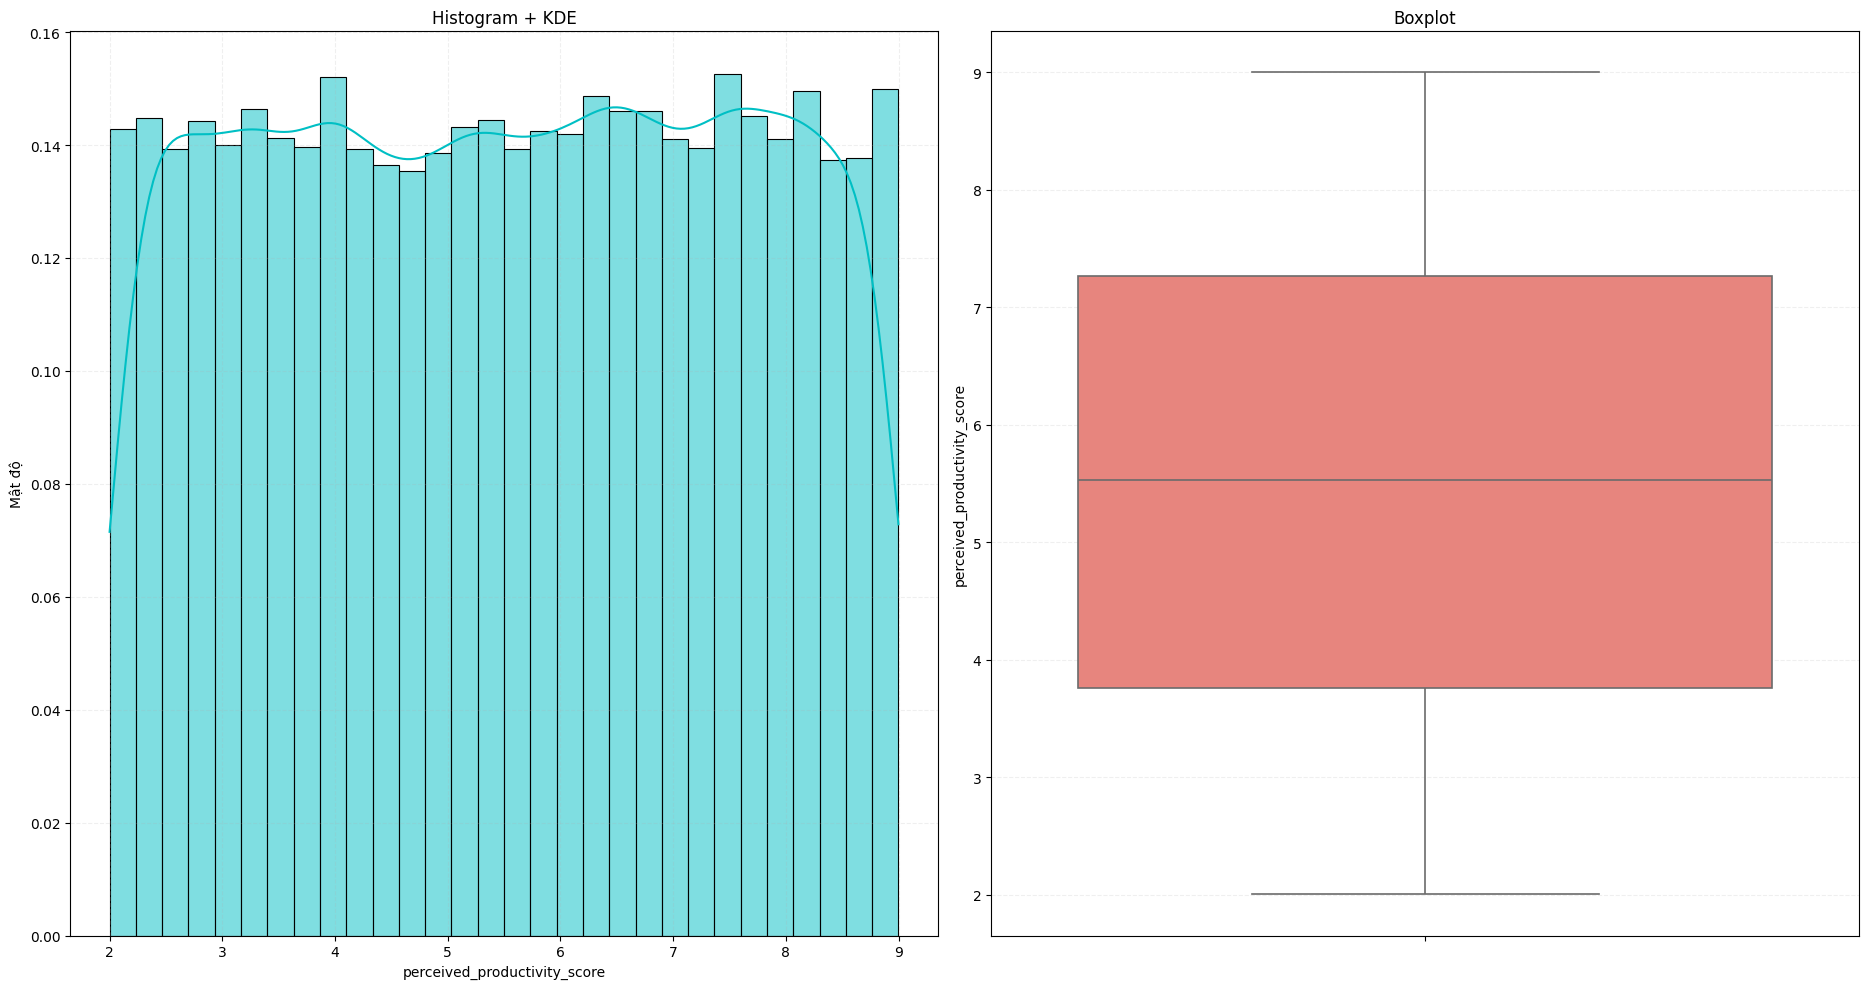


 Phân tích phân phối cho cột: actual_productivity_score
  → Skewness  = -0.0068 (Gần chuẩn)
  → Kurtosis  = 1.9637 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


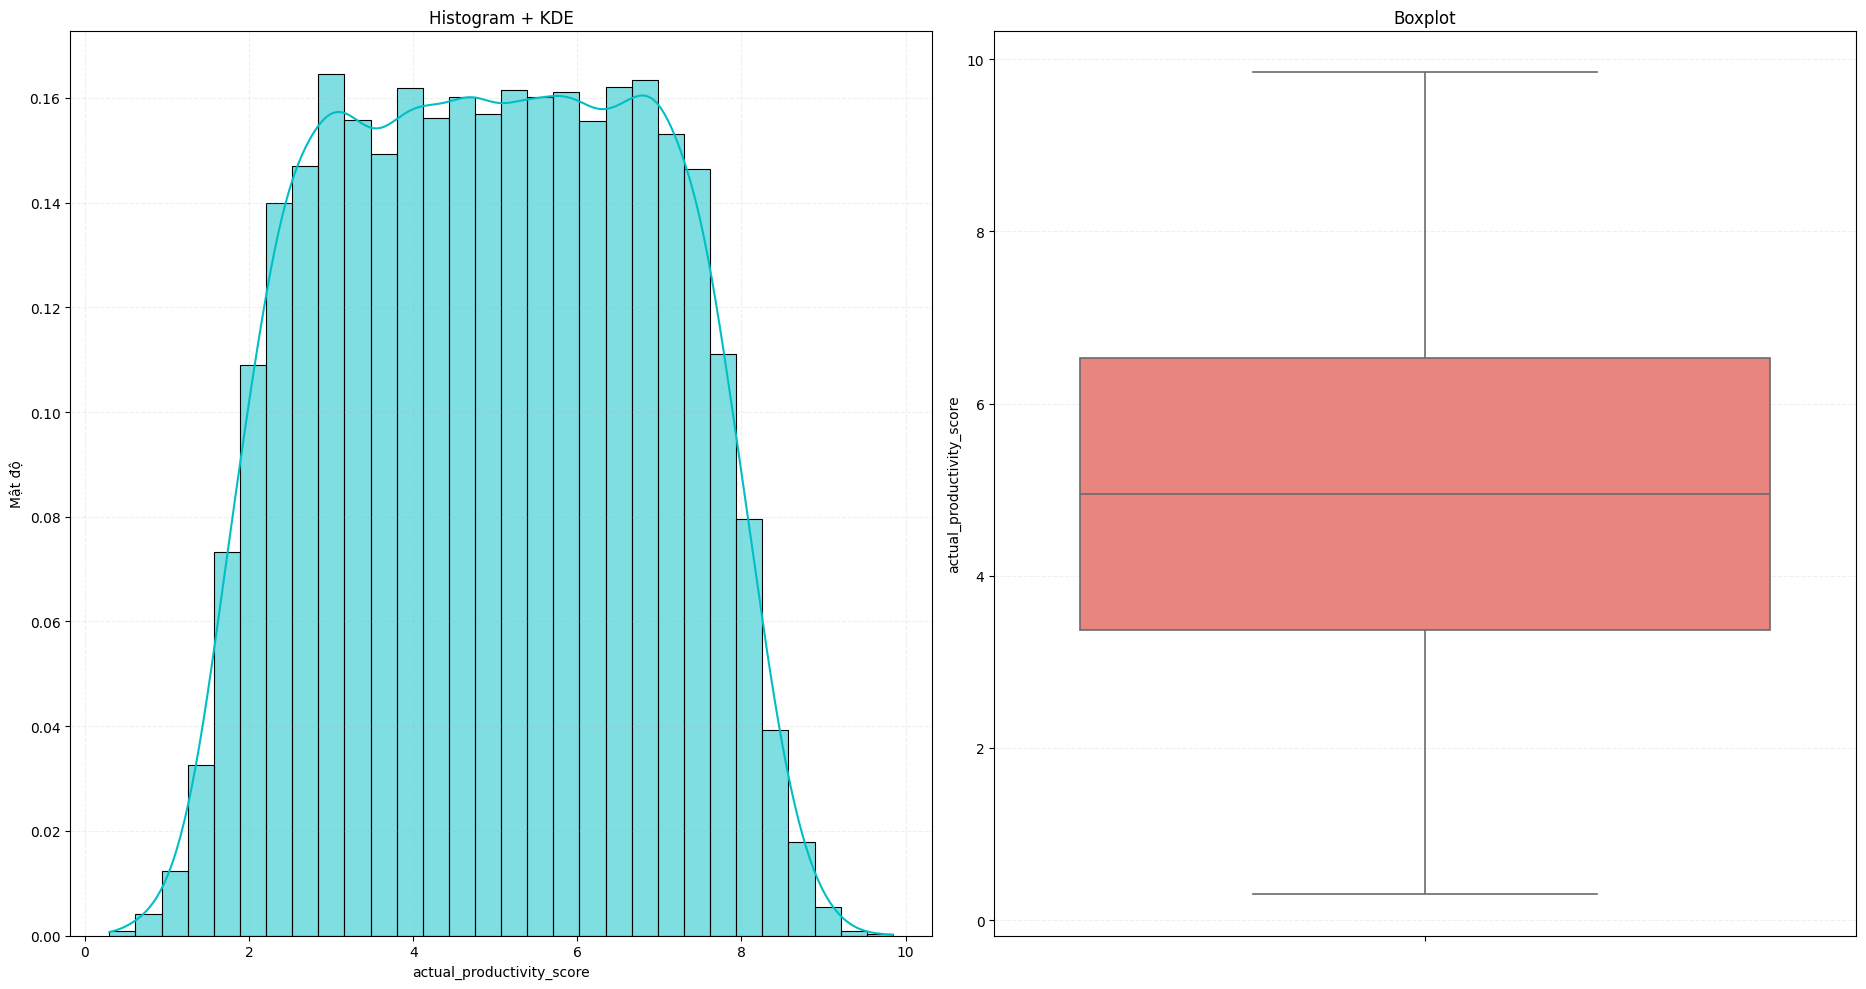


 Phân tích phân phối cho cột: stress_level
  → Skewness  = 0.0010 (Gần chuẩn)
  → Kurtosis  = 1.7819 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


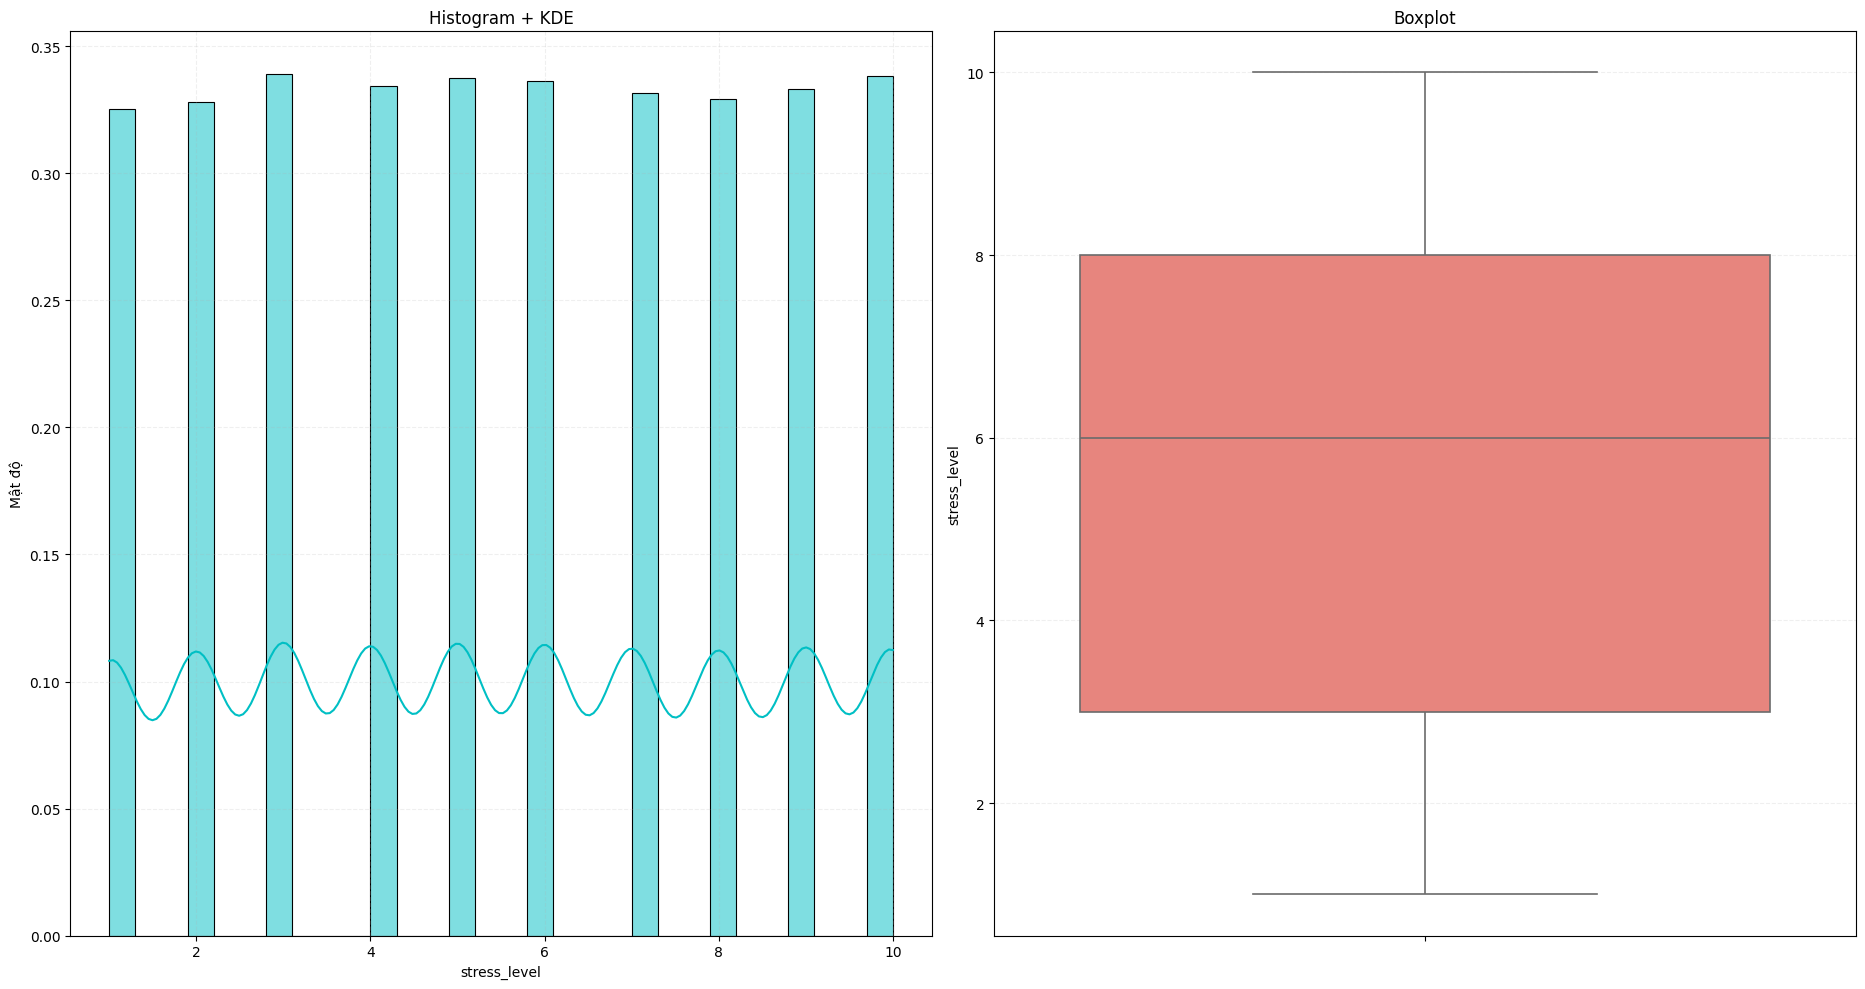


 Phân tích phân phối cho cột: sleep_hours
  → Skewness  = 0.0040 (Gần chuẩn)
  → Kurtosis  = 2.6739 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


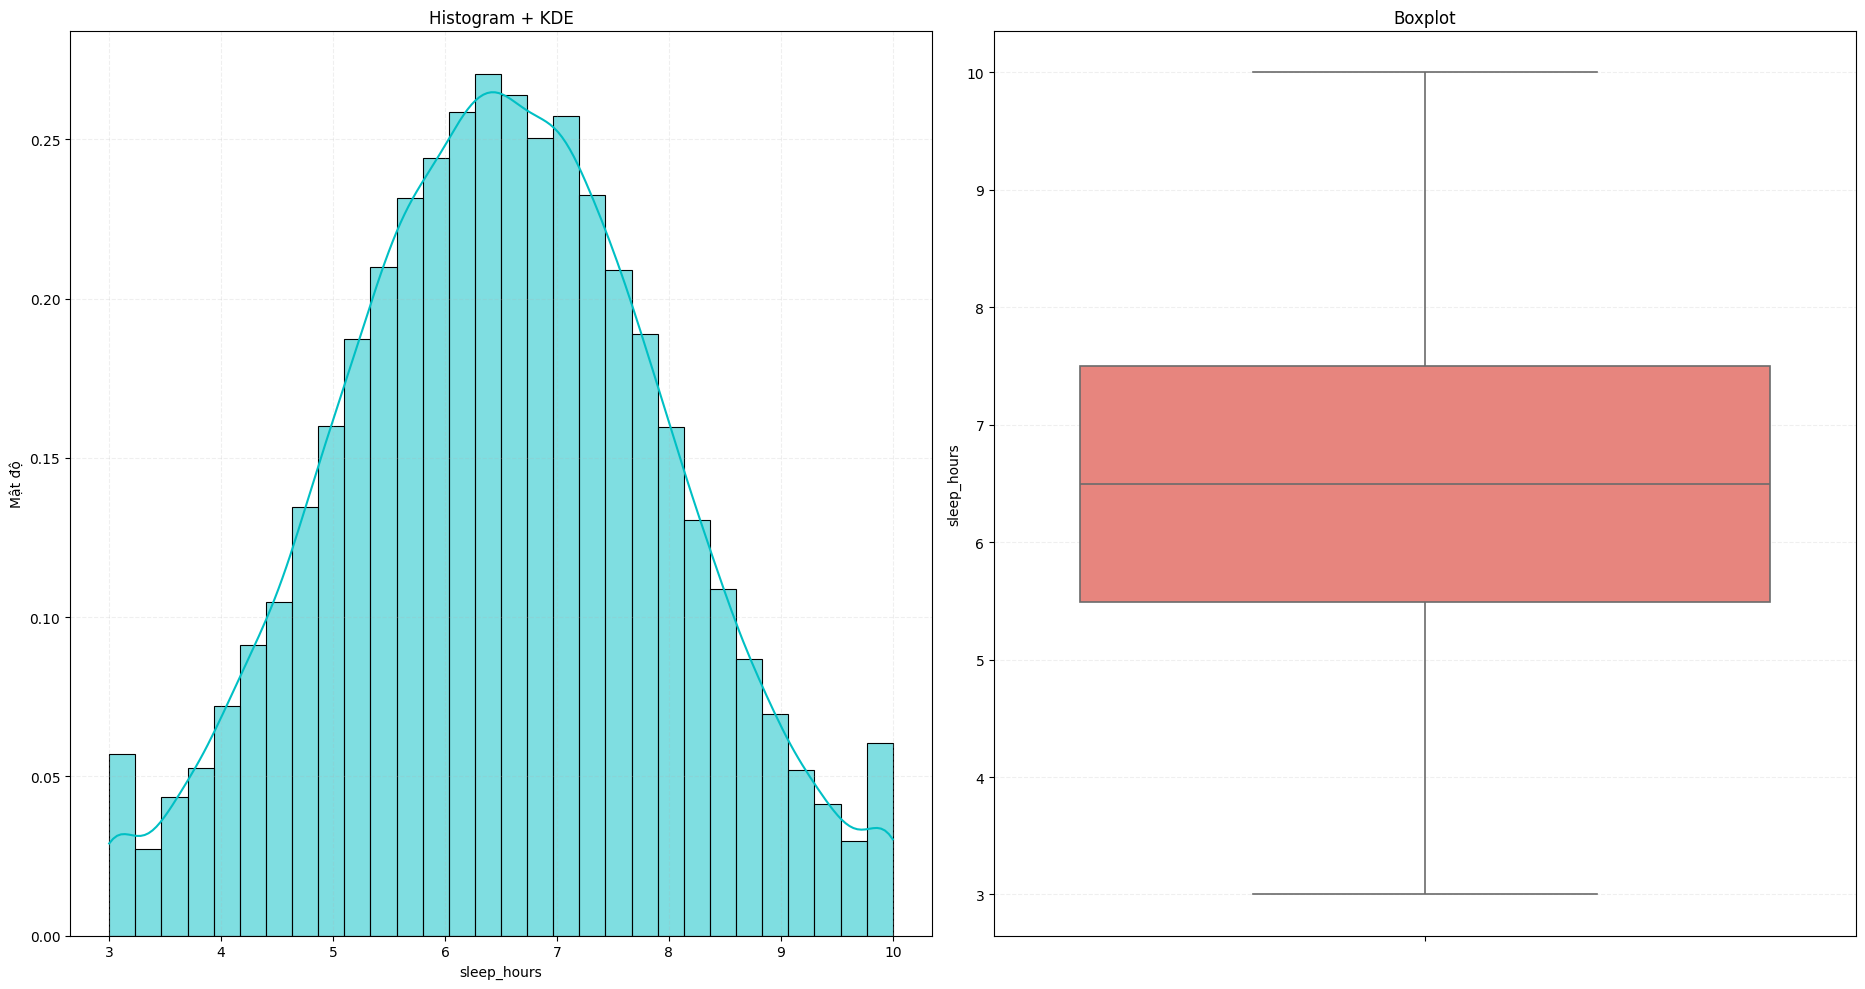


 Phân tích phân phối cho cột: screen_time_before_sleep
  → Skewness  = 0.3042 (Lệch nhẹ phải)
  → Kurtosis  = 2.5663 (Dẹt)
  → Số lượng outlier(z-score): 61
  → Số lượng outlier(IQR): 98


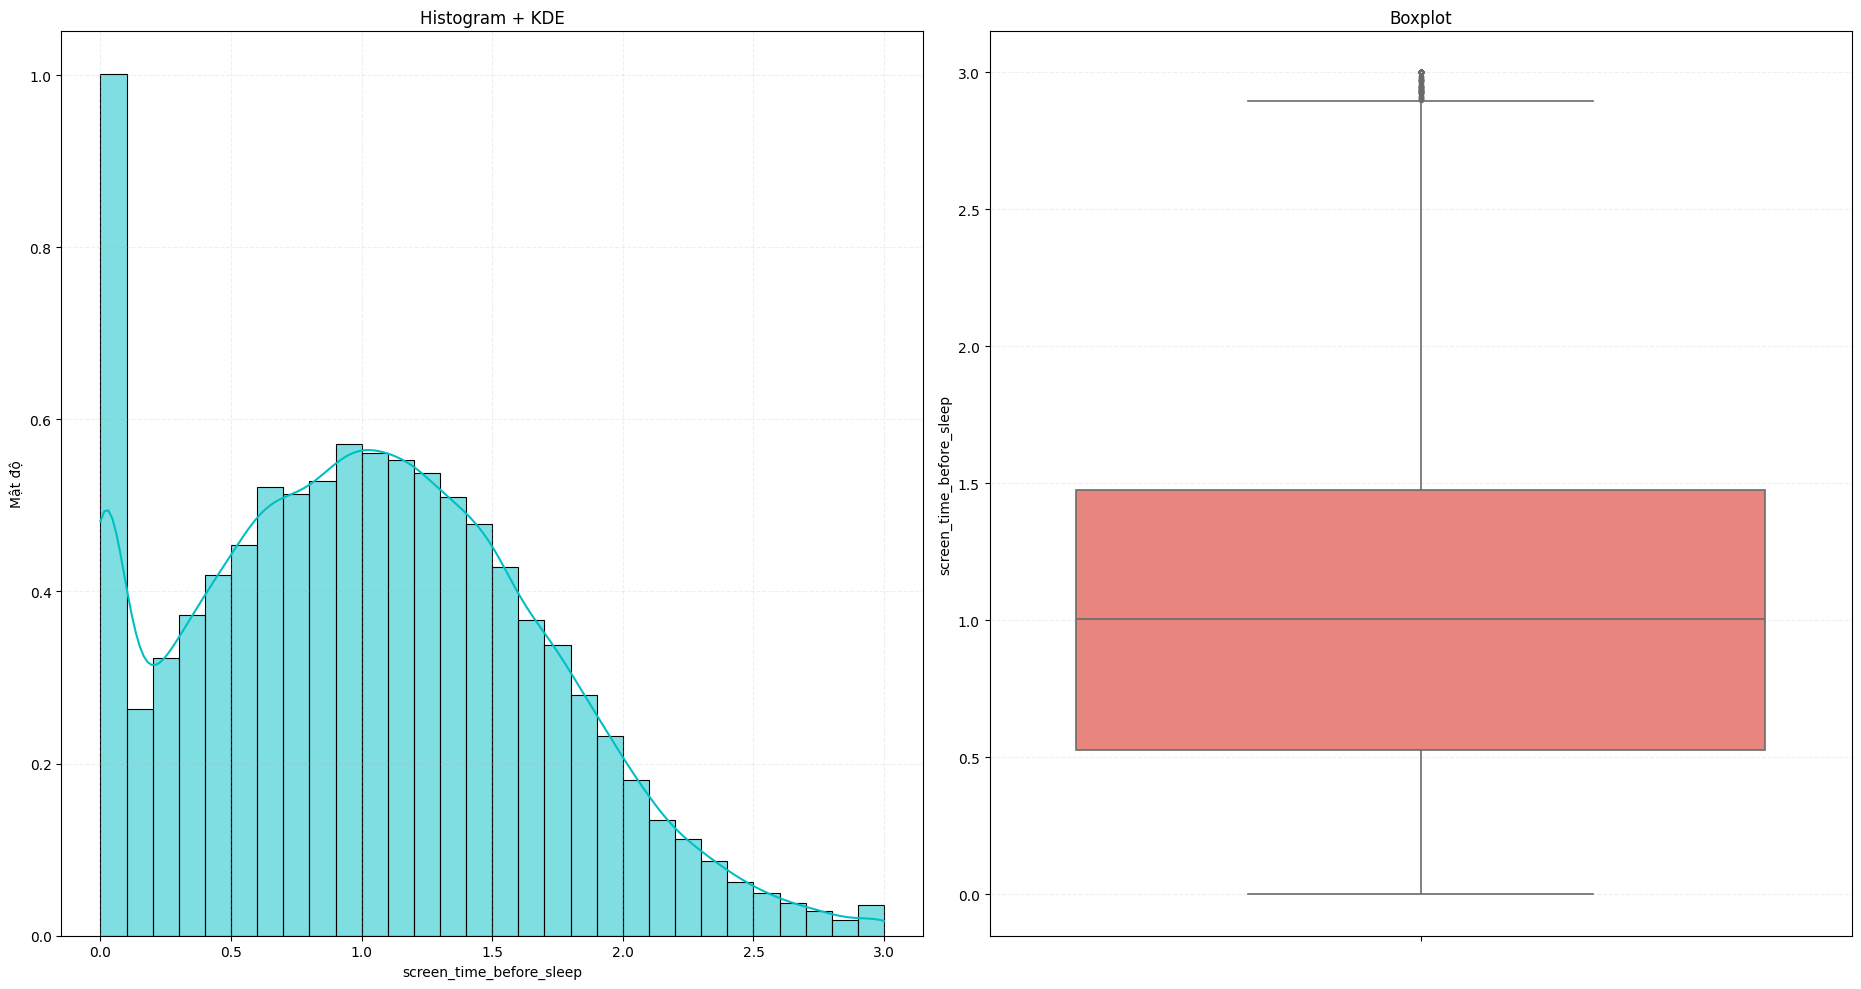


 Phân tích phân phối cho cột: breaks_during_work
  → Skewness  = 0.0067 (Gần chuẩn)
  → Kurtosis  = 1.7700 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


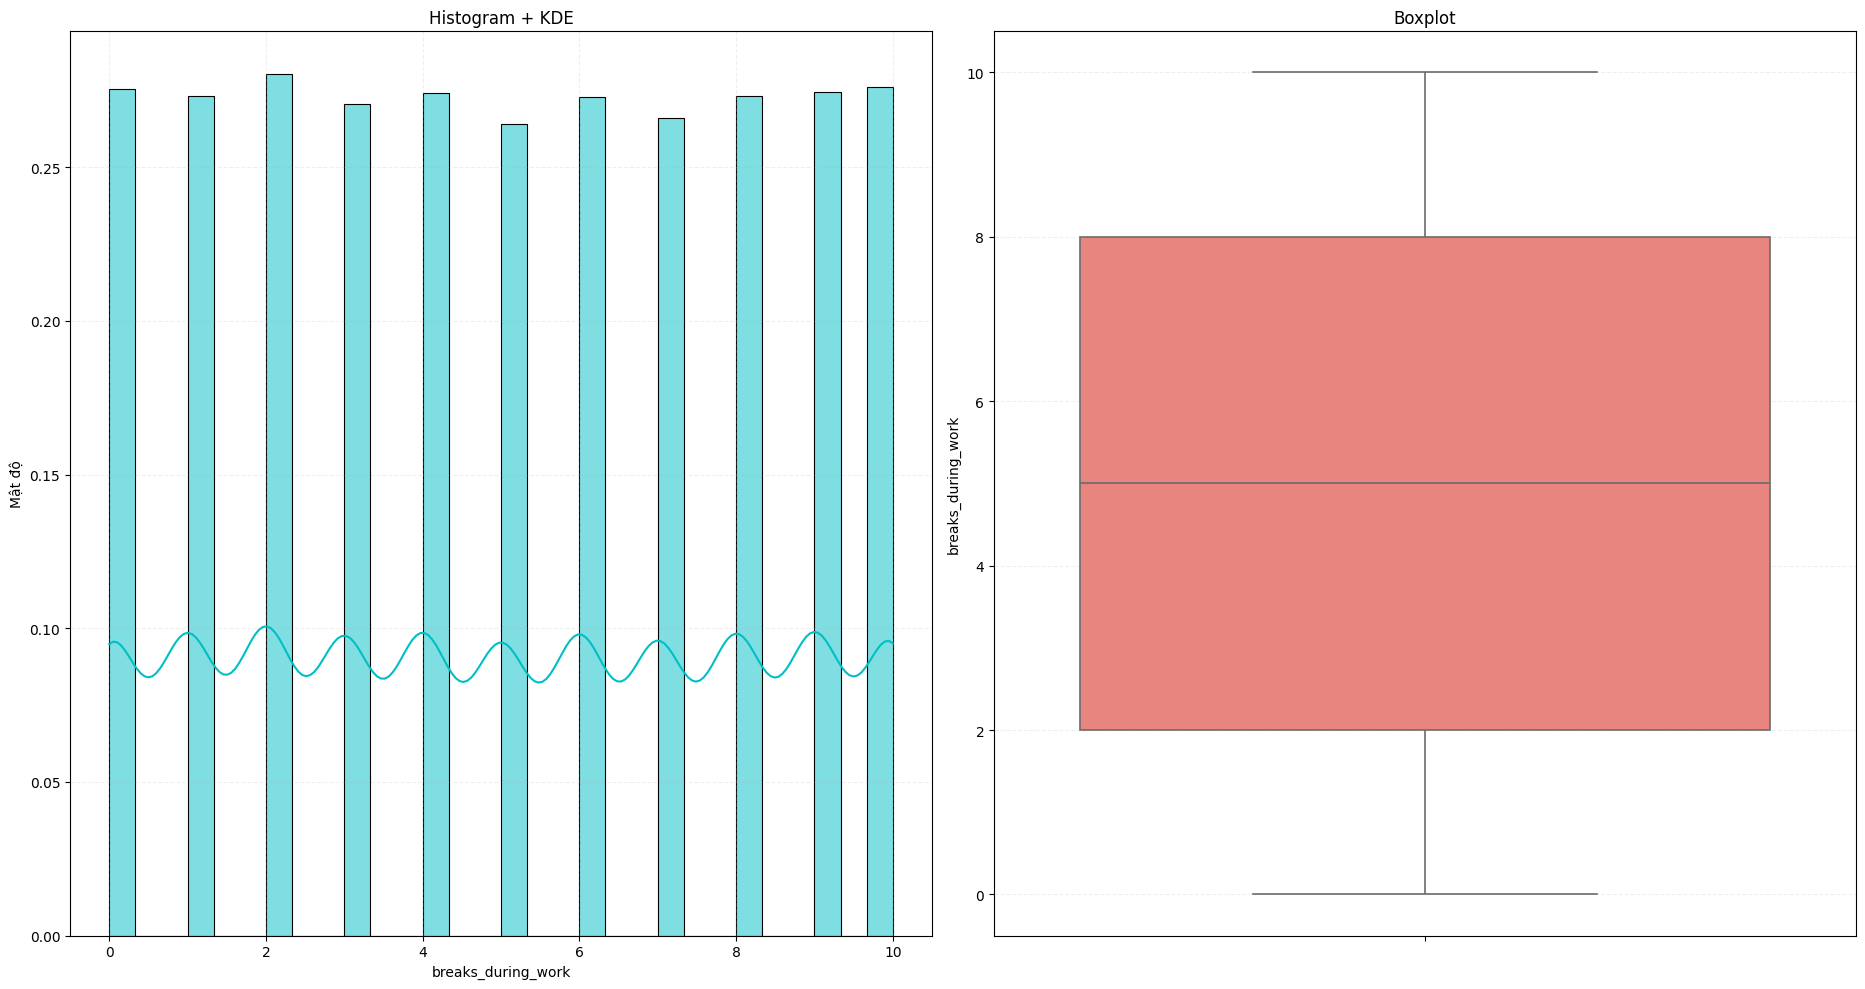


 Phân tích phân phối cho cột: coffee_consumption_per_day
  → Skewness  = 0.6747 (Lệch vừa phải)
  → Kurtosis  = 3.4161 (Nhọn)
  → Số lượng outlier(z-score): 127
  → Số lượng outlier(IQR): 127


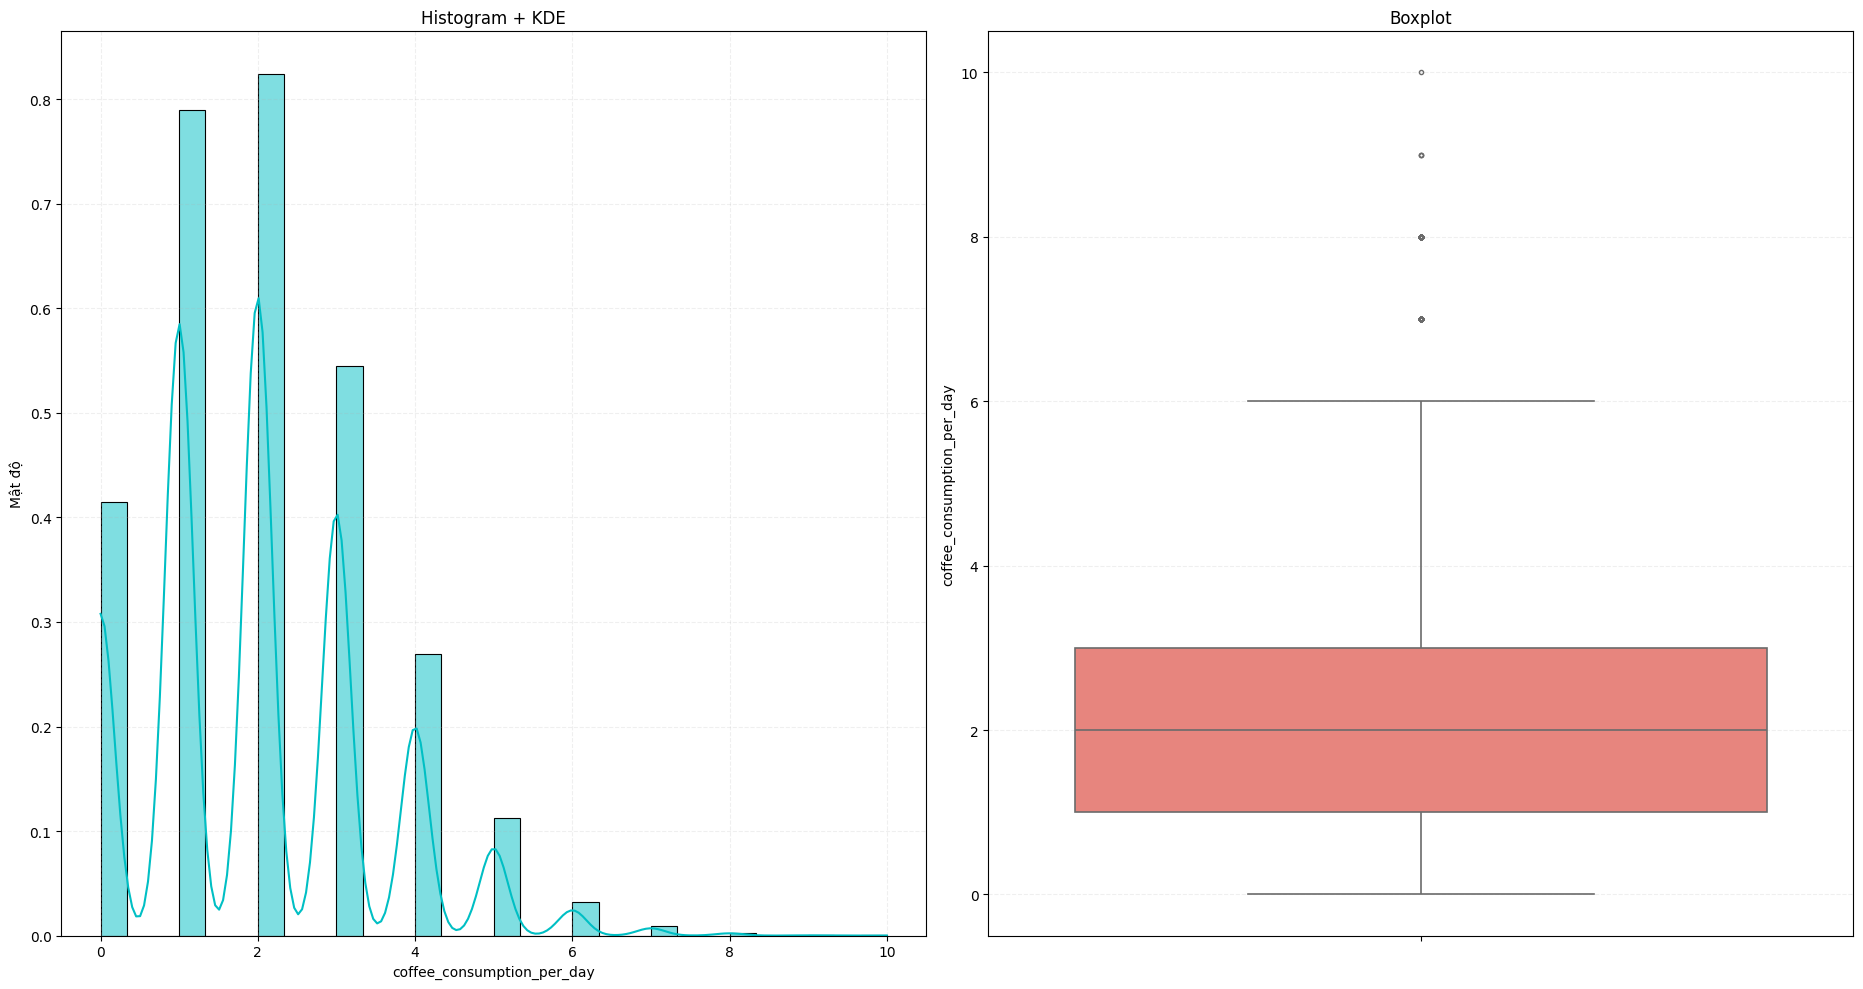


 Phân tích phân phối cho cột: days_feeling_burnout_per_month
  → Skewness  = -0.0078 (Gần chuẩn)
  → Kurtosis  = 1.7949 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


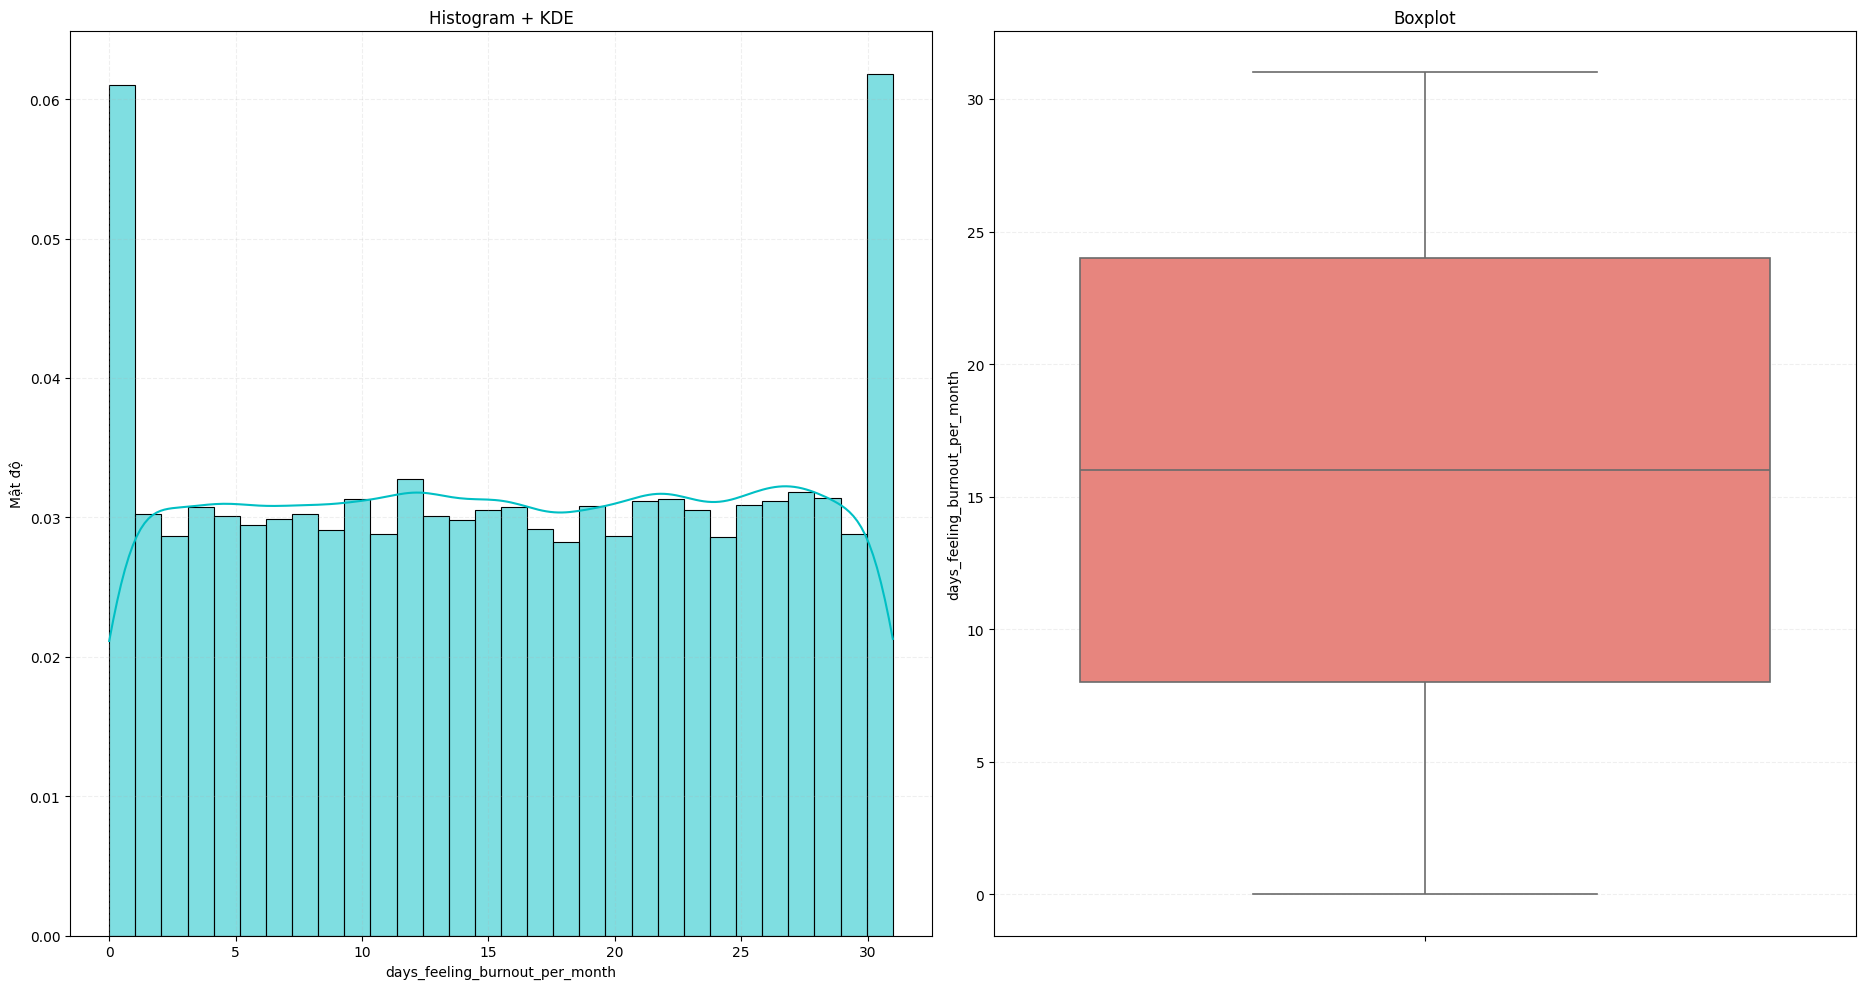


 Phân tích phân phối cho cột: weekly_offline_hours
  → Skewness  = 0.4233 (Lệch nhẹ phải)
  → Kurtosis  = 2.6703 (Dẹt)
  → Số lượng outlier(z-score): 88
  → Số lượng outlier(IQR): 116


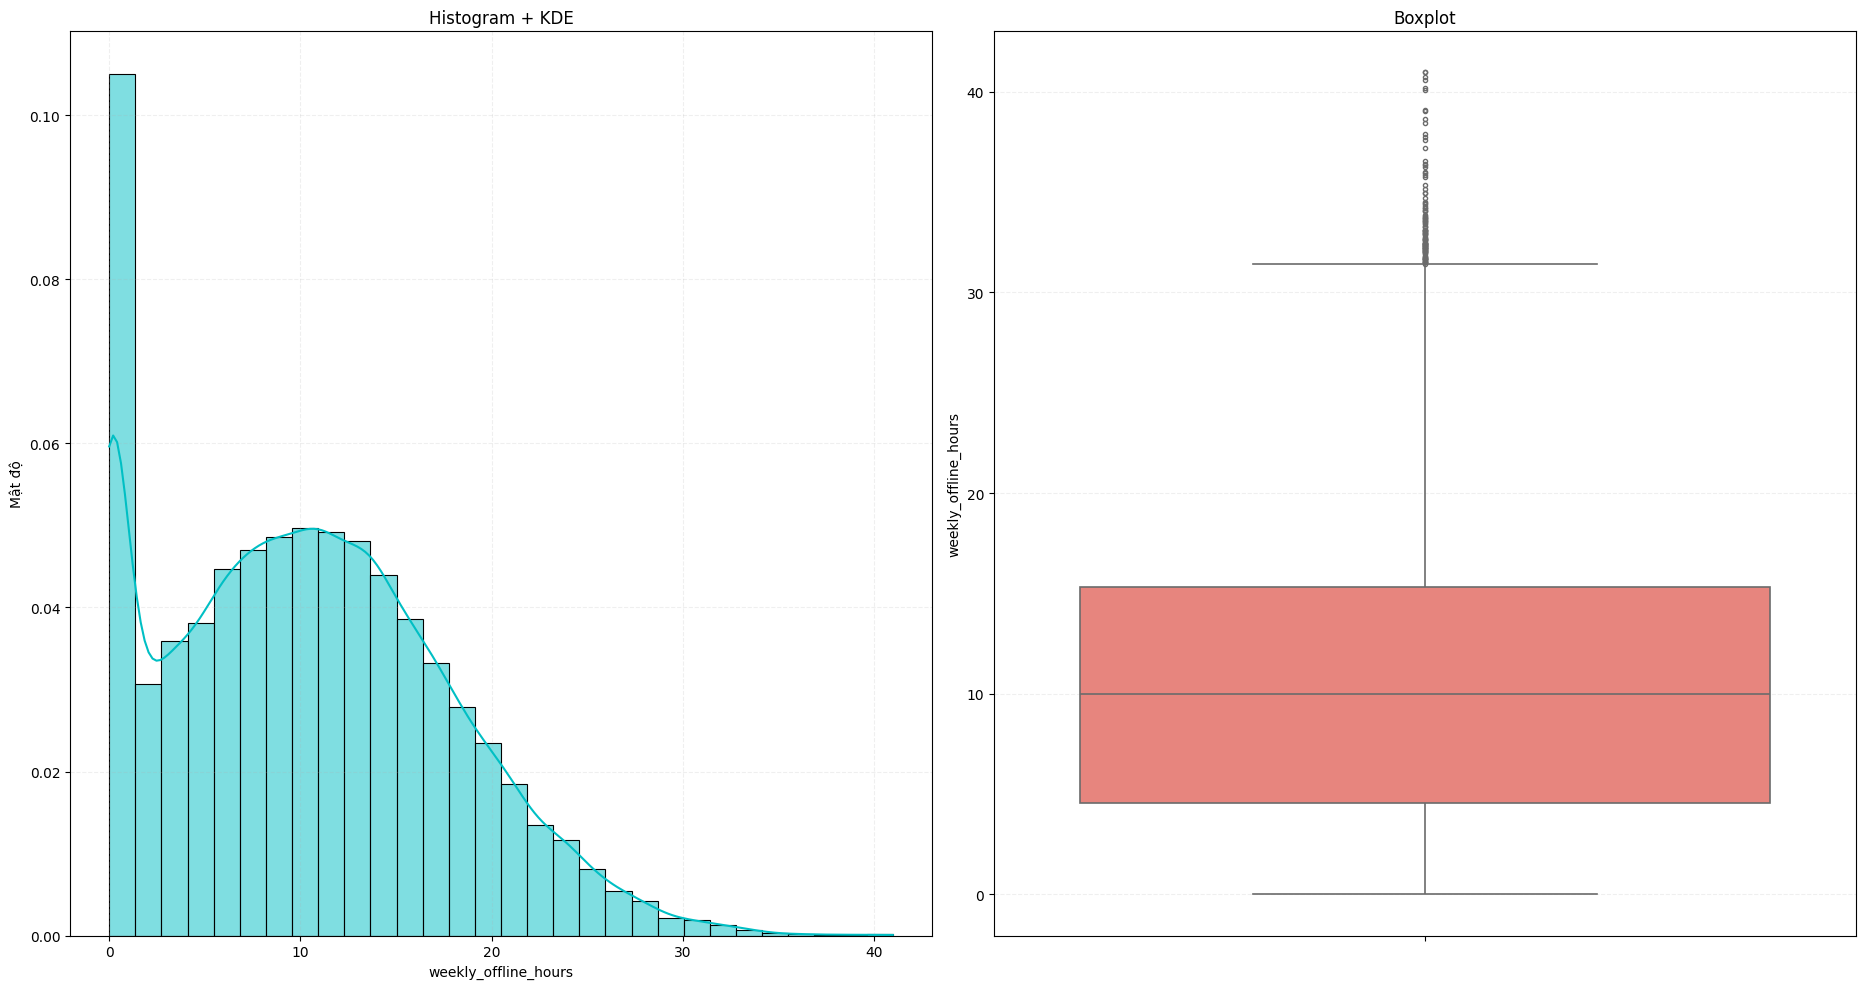


 Phân tích phân phối cho cột: job_satisfaction_score
  → Skewness  = 0.0092 (Gần chuẩn)
  → Kurtosis  = 2.3213 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


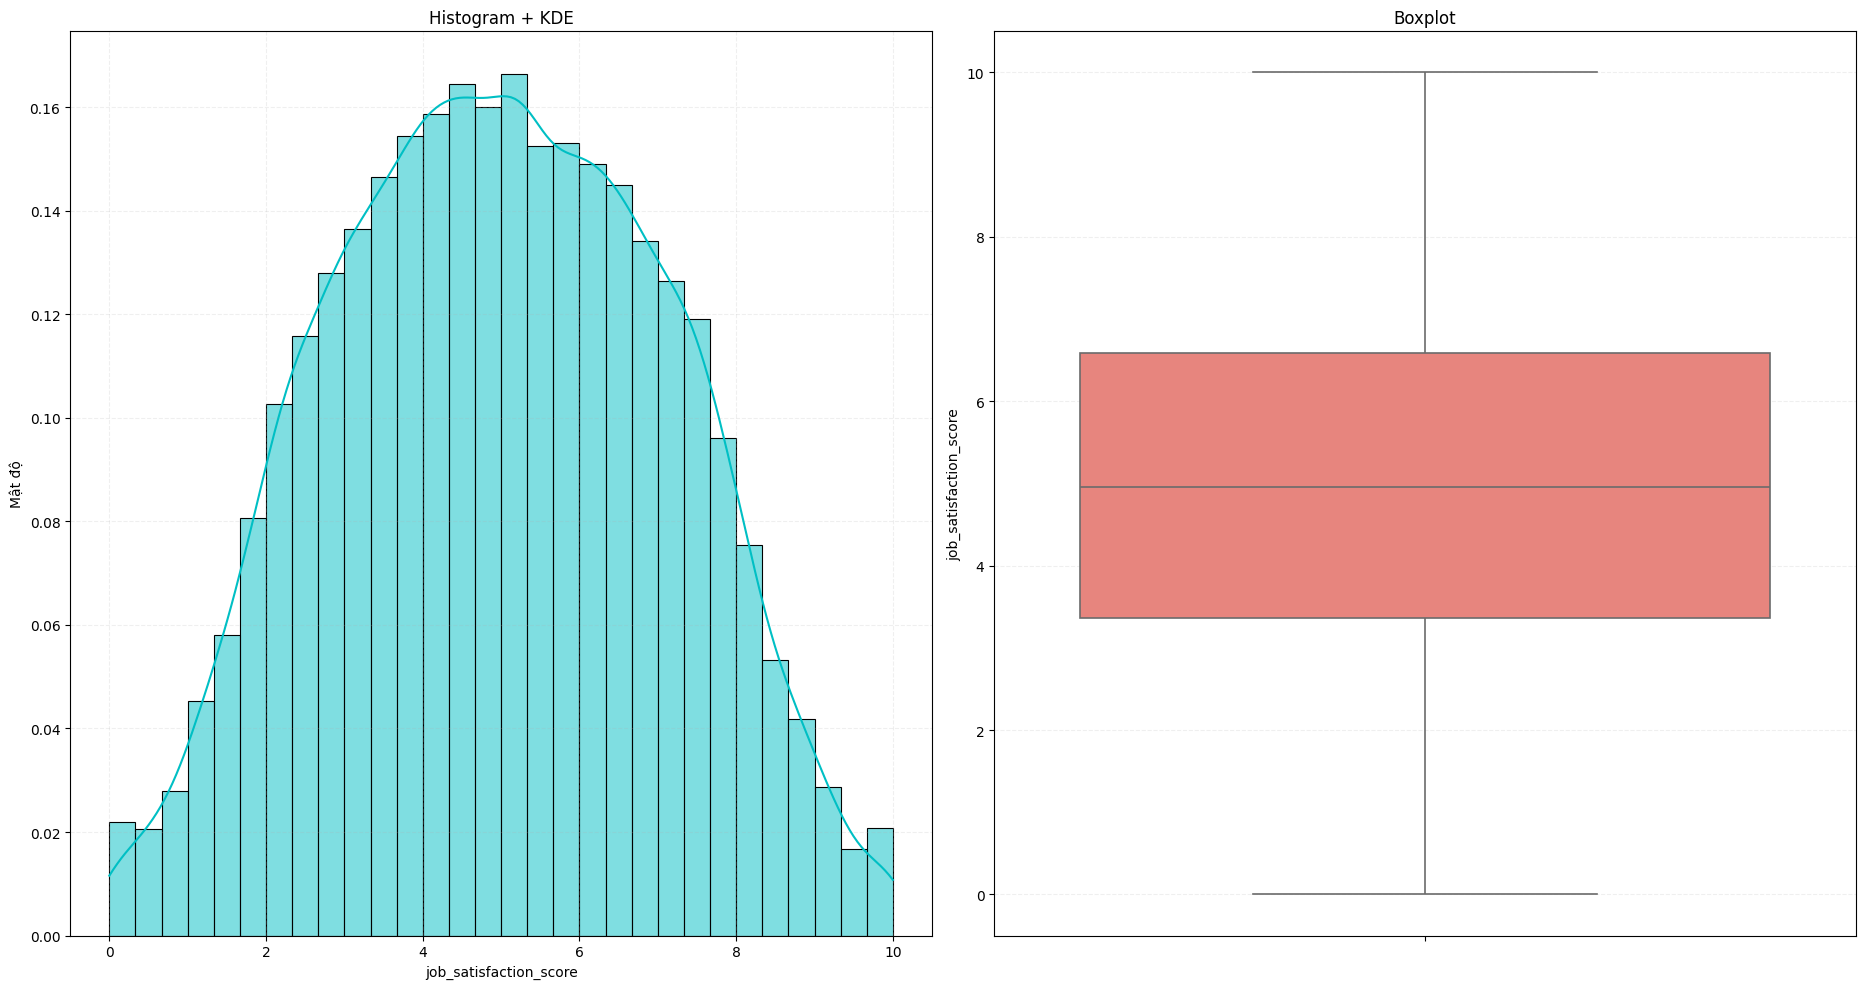

In [73]:
# Lấy các cột có kiểu dữ liệu là int, float
numeric_cols = df.select_dtypes(include=[np.integer, np.floating]).columns.to_list()

# Đánh giá phân bố: skewness & kurtosis
def evaluate_distribution(data):
    s = skew(data)
    k = kurtosis(data, fisher=False)

    # Phân loại skewness
    if abs(s) < 0.05:
        skew_status = "Gần chuẩn"
    elif 0.05 <= abs(s) <= 0.5:
        skew_status = "Lệch nhẹ " + ("phải" if s > 0 else "trái")
    elif 0.5 < abs(s) <= 1.0:
        skew_status = "Lệch vừa " + ("phải" if s > 0 else "trái")
    else:
        skew_status = "Lệch mạnh " + ("phải" if s > 0 else "trái")

    # Phân loại kurtosis
    if k < 3:
        kurt_status = "Dẹt"
    elif k > 3:
        kurt_status = "Nhọn"
    else:
        kurt_status = "Chuẩn"

    return s, k, skew_status, kurt_status

# Đếm số lượng outlier theo Z-score
def count_outliers_z_score(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return np.sum(z_scores > threshold)

# Hàm IQR
def outliers_iqr(data, threshold=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower = Q1 - threshold * IQR
    upper = Q3 + threshold * IQR
    return lower, upper

# Đếm số lượng outlier theo IQR
def count_outliers_iqr(data):
    lower, upper = outliers_iqr(data,threshold=1.5)
    return np.sum((data < lower) | (data > upper))

# Vẽ biểu đồ phân phối
def draw_distribution_plots(data, column_name):
    plt.figure(figsize=(28,10))

    # Histogram + KDE
    plt.subplot(1, 3, 1)
    sns.histplot(data, kde=True, stat="density", bins=30, color="#00BFC4", edgecolor='black', linewidth=0.8)
    plt.title('Histogram + KDE')
    plt.xlabel(column_name)
    plt.ylabel('Mật độ')
    plt.grid(True, linestyle='--', alpha=0.2)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=data, color="#F8766D", linewidth=1.2, fliersize=3)
    plt.title('Boxplot')
    plt.grid(True, axis='y', linestyle='--', alpha=0.2)

    plt.tight_layout()
    plt.show()

# Hàm tổng hợp phân tích một cột
def analyze_column(df, column):
    # tạo bản sao không ảnh hưởng df gốc
    data = df[column].dropna()

    outliers_z_score = count_outliers_z_score(data)
    outliers_iqr = count_outliers_iqr(data)

    s, k, skew_status, kurt_status = evaluate_distribution(data)

    print(f"\n Phân tích phân phối cho cột: {column}")
    print(f"  → Skewness  = {s:.4f} ({skew_status})")
    print(f"  → Kurtosis  = {k:.4f} ({kurt_status})")
    print(f"  → Số lượng outlier(z-score): {outliers_z_score}")
    print(f"  → Số lượng outlier(IQR): {outliers_iqr}")

    # Vẽ biểu đồ
    draw_distribution_plots(data, column)

for col in numeric_cols:
    analyze_column(df, col)


Một số cột bị lệch, có nhiều outlier => Xử lý outlier bằng các phương pháp phù hợp.

#2. Tiền xử lý dữ liệu

##2.1 NaN

Phân loại mức độ NaN trong cột:

*   < 5%: có thể cân nhắc dropna
*   5% - 30%: điền giá trị fillna
*   \>30%: cân nhắc xóa cột

Cột có NaN là **numeric** sẽ điền bằng **median** để tránh bị ảnh hưởng bởi outliers

In [74]:
numeric_cols = df.select_dtypes(include=[np.integer, np.floating]).columns.to_list()

for col in numeric_cols:
  df[col] = df[col].fillna(df[col].median())

Cột có NaN là **bool** sẽ điền bằng **Mode**



In [75]:
bool_cols = df.select_dtypes(bool).columns.to_list()

for col in bool_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

In [76]:
# Kiểm tra lại NaN
print(df.isna().sum())

age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64


##2.2 Outlier

###So sánh outlier của 2 cách

Hàm so sánh số lượng outlier mà Z_score và IQR quét được


    Tính và trực quan hóa số lượng giá trị ngoại lai của từng biến số,
    so sánh hai phương pháp Z‑score và IQR. Chỉ hiển thị những biến
    thực sự có ngoại lai ở ít nhất một phương pháp.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame nguồn.
    numeric_cols : list | None
        Danh sách cột số cần phân tích. Nếu None ➜ tự động chọn toàn bộ cột số.
    z_thresh : float
        Ngưỡng Z‑score để coi là ngoại lai (mặc định ±3).
    iqr_factor : float
        Hệ số nhân IQR (mặc định 1.5).
    figsize : tuple
        Kích thước figure matplotlib.
    title : str
        Tiêu đề biểu đồ.
    show_plot : bool
        True ➜ vẽ biểu đồ; False ➜ chỉ trả DataFrame.

    Returns
    -------
    pd.DataFrame
        Bảng hai cột: số ngoại lai theo Z‑score và IQR, chỉ chứa biến có ≥1 ngoại lai.


In [77]:
def compare_outliers_by_method(
        df: pd.DataFrame,
        numeric_cols: list | None = None,
        z_thresh: float = 3,
        iqr_factor: float = 1.5,
        figsize: tuple = (12, 6),
        title: str = "So sánh số lượng ngoại lai: Z‑score vs. IQR",
        show_plot: bool = True
    ) -> pd.DataFrame:
    # 1. Xác định cột số
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include="number").columns.tolist()

    # 2. Ngoại lai theo Z‑score
    z_scores = df[numeric_cols].apply(zscore, nan_policy="omit")
    out_z = (np.abs(z_scores) > z_thresh).sum()

    # 3. Ngoại lai theo IQR
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - iqr_factor * IQR
    upper = Q3 + iqr_factor * IQR
    out_iqr = ((df[numeric_cols] < lower) | (df[numeric_cols] > upper)).sum()

    # 4. Gộp kết quả và giữ lại biến có ngoại lai
    summary = pd.DataFrame({
        'Outlier_Zscore': out_z,
        'Outlier_IQR': out_iqr
    })
    summary = summary.loc[(summary > 0).any(axis=1)].sort_values('Outlier_IQR', ascending=False)

    # 5. Trực quan hóa
    if show_plot and not summary.empty:
        ax = summary.plot(kind='bar',
                          figsize=figsize,
                          colormap='Set2',
                          width=0.75,
                          edgecolor='black')
        ax.set_title(title, fontsize=14)
        ax.set_xlabel("Biến", fontsize=12)
        ax.set_ylabel("Số ngoại lai", fontsize=12)
        ax.legend(title="Phương pháp")
        ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    return summary


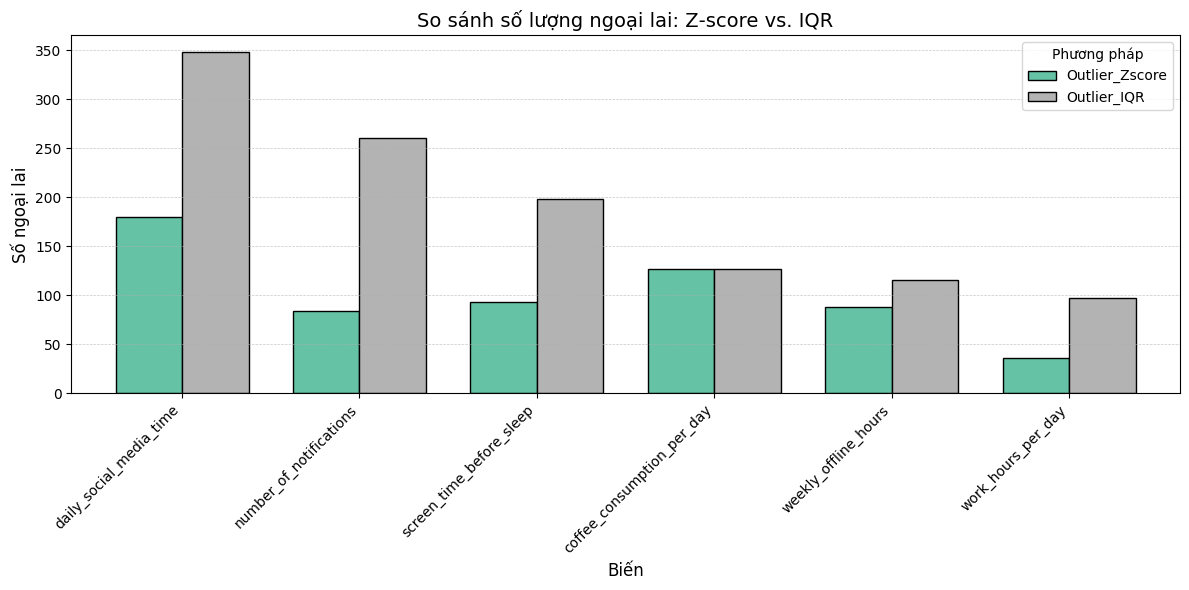

                            Outlier_Zscore  Outlier_IQR
daily_social_media_time                180          348
number_of_notifications                 84          261
screen_time_before_sleep                93          198
coffee_consumption_per_day             127          127
weekly_offline_hours                    88          116
work_hours_per_day                      36           97


In [78]:
# Giả sử df là DataFrame đã load sẵn
df_t = df.copy()
outlier_table = compare_outliers_by_method(df_t)

# outlier_table giờ là DataFrame bạn có thể chèn vào báo cáo
print(outlier_table)


=> IQR quét được nhiều giá trị ngoại lai hơn

### Xử lý theo IQR

Vét sạch được outlier

In [79]:
'''         Xử lý với col_iqr
    Bất kỳ giá trị nào vượt ngưỡng sẽ bị thay thế
    Q1 - 1.5×IQR hoặc Q3 + 1.5×IQR

'''
''' data tạo bản sao từ df bỏ tất cả NaN
    capped copy lại data
    capped đọc dữ liệu từ data sau khi xử lý xong ghi đè lên lại df
'''
def cap_outliers_iqr(df, col, factor=1.5, inplace=True):
    data = df[col].dropna()
    lower, upper = outliers_iqr(data, threshold=factor)

    capped = df[col].copy()
    capped[capped < lower] = lower
    capped[capped > upper] = upper

    if inplace:
        df[col] = capped
        return None
    else:
        return capped
for col in numeric_cols:
    cap_outliers_iqr(df, col)




##2.3 Biến đổi dữ liệu

Chuyển đổ giá trị True/ False thành 1/0

In [80]:
for col in bool_cols:
    df[col] = df[col].astype(int)

In [81]:
df.head(10)

age  gender    job_type  daily_social_media_time  \
0   56    Male  Unemployed                 4.180940   
1   46    Male      Health                 3.249603   
2   32    Male     Finance                 3.025913   
3   60  Female  Unemployed                 3.025913   
4   25    Male          IT                 3.025913   
5   38    Male     Finance                 1.512568   
6   56  Female  Unemployed                 4.381070   
7   36  Female   Education                 4.089168   
8   40  Female   Education                 4.097401   
9   28   Other          IT                 7.595577   

  social_platform_preference  number_of_notifications  work_hours_per_day  \
0                   Facebook                       61            6.753558   
1                    Twitter                       59            9.169296   
2                    Twitter                       57            7.910952   
3                   Facebook                       59            6.355027   
4                   Telegram                       66            6.214096   
5                    Twitter                       50            6.429312   
6                     TikTok                       60            3.902309   
7                    Twitter                       49            6.560467   
8                  Instagram                       57            5.839590   
9                    Twitter                       64            5.888936   

   perceived_productivity_score  actual_productivity_score  stress_level  \
0                      8.040464                   7.291555           4.0   
1                      5.063368                   5.165093           7.0   
2                      3.861762                   3.474053           4.0   
3                      2.916331                   1.774869           6.0   
4                      8.868753                   4.951742           7.0   
5                      5.525005                   4.081026           5.0   
6                      6.420989                   5.976408           7.0   
7                      2.681830                   2.446927           4.0   
8                      3.219022                   3.004240           4.0   
9                      5.525005                   4.951742           3.0   

   sleep_hours  screen_time_before_sleep  breaks_during_work  uses_focus_apps  \
0     5.116546                  0.419102                   8                0   
1     5.103897                  0.671519                   7                1   
2     8.583222                  0.624378                   0                1   
3     6.052984                  1.204540                   1                0   
4     5.405706                  1.876254                   1                0   
5     5.515251                  1.518612                   5                0   
6     7.549849                  2.252624                   4                0   
7     6.325507                  0.747998                   2                0   
8     6.498340                  0.000000                  10                0   
9     6.761952                  1.449841                  10                0   

   has_digital_wellbeing_enabled  coffee_consumption_per_day  \
0                              0                           4   
1                              1                           2   
2                              0                           3   
3                              0                           0   
4                              1                           1   
5                              1                           5   
6                              0                           4   
7                              0                           4   
8                              1                           2   
9                              0                           1   

   days_feeling_burnout_per_month  weekly_offline_hours  \
0                              11             21.927072 

##2.4 Trực quan hóa dữ liệu

###Dữ liệu sau khi làm sạch


 Phân tích phân phối cho cột: age
  → Skewness  = 0.0153 (Gần chuẩn)
  → Kurtosis  = 1.8088 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


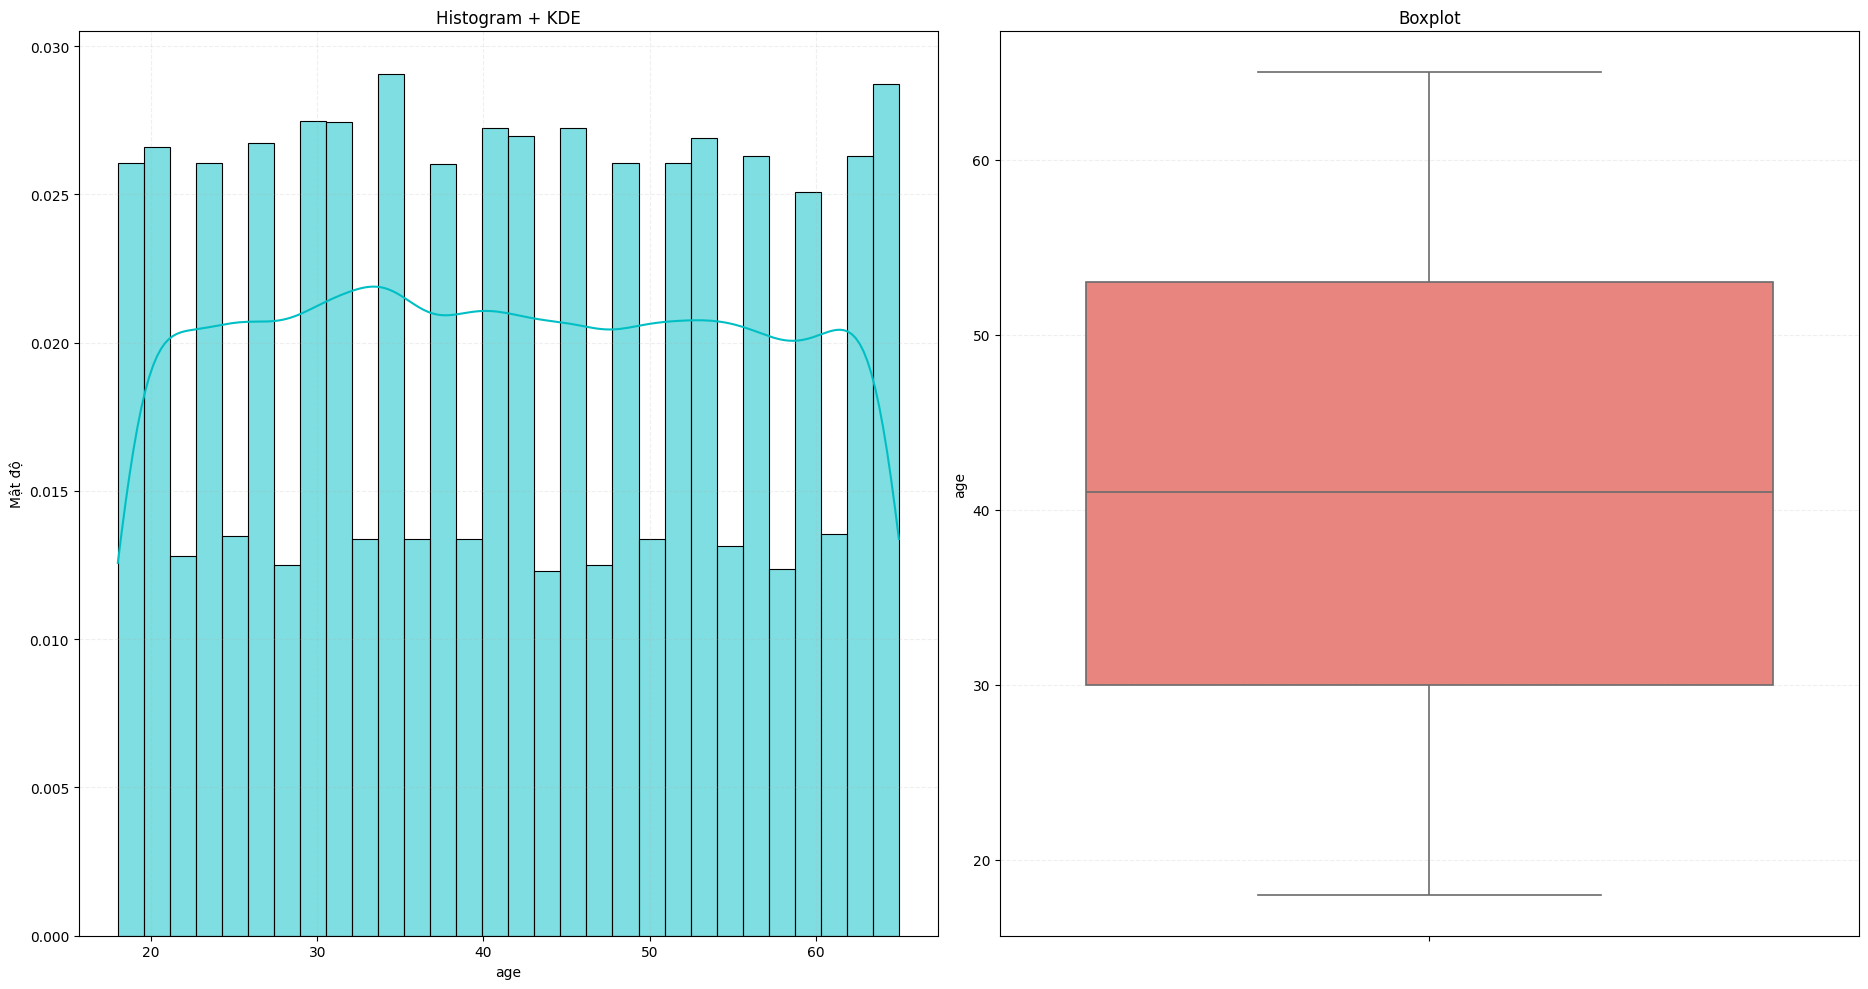


 Phân tích phân phối cho cột: daily_social_media_time
  → Skewness  = 0.2835 (Lệch nhẹ phải)
  → Kurtosis  = 2.7511 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


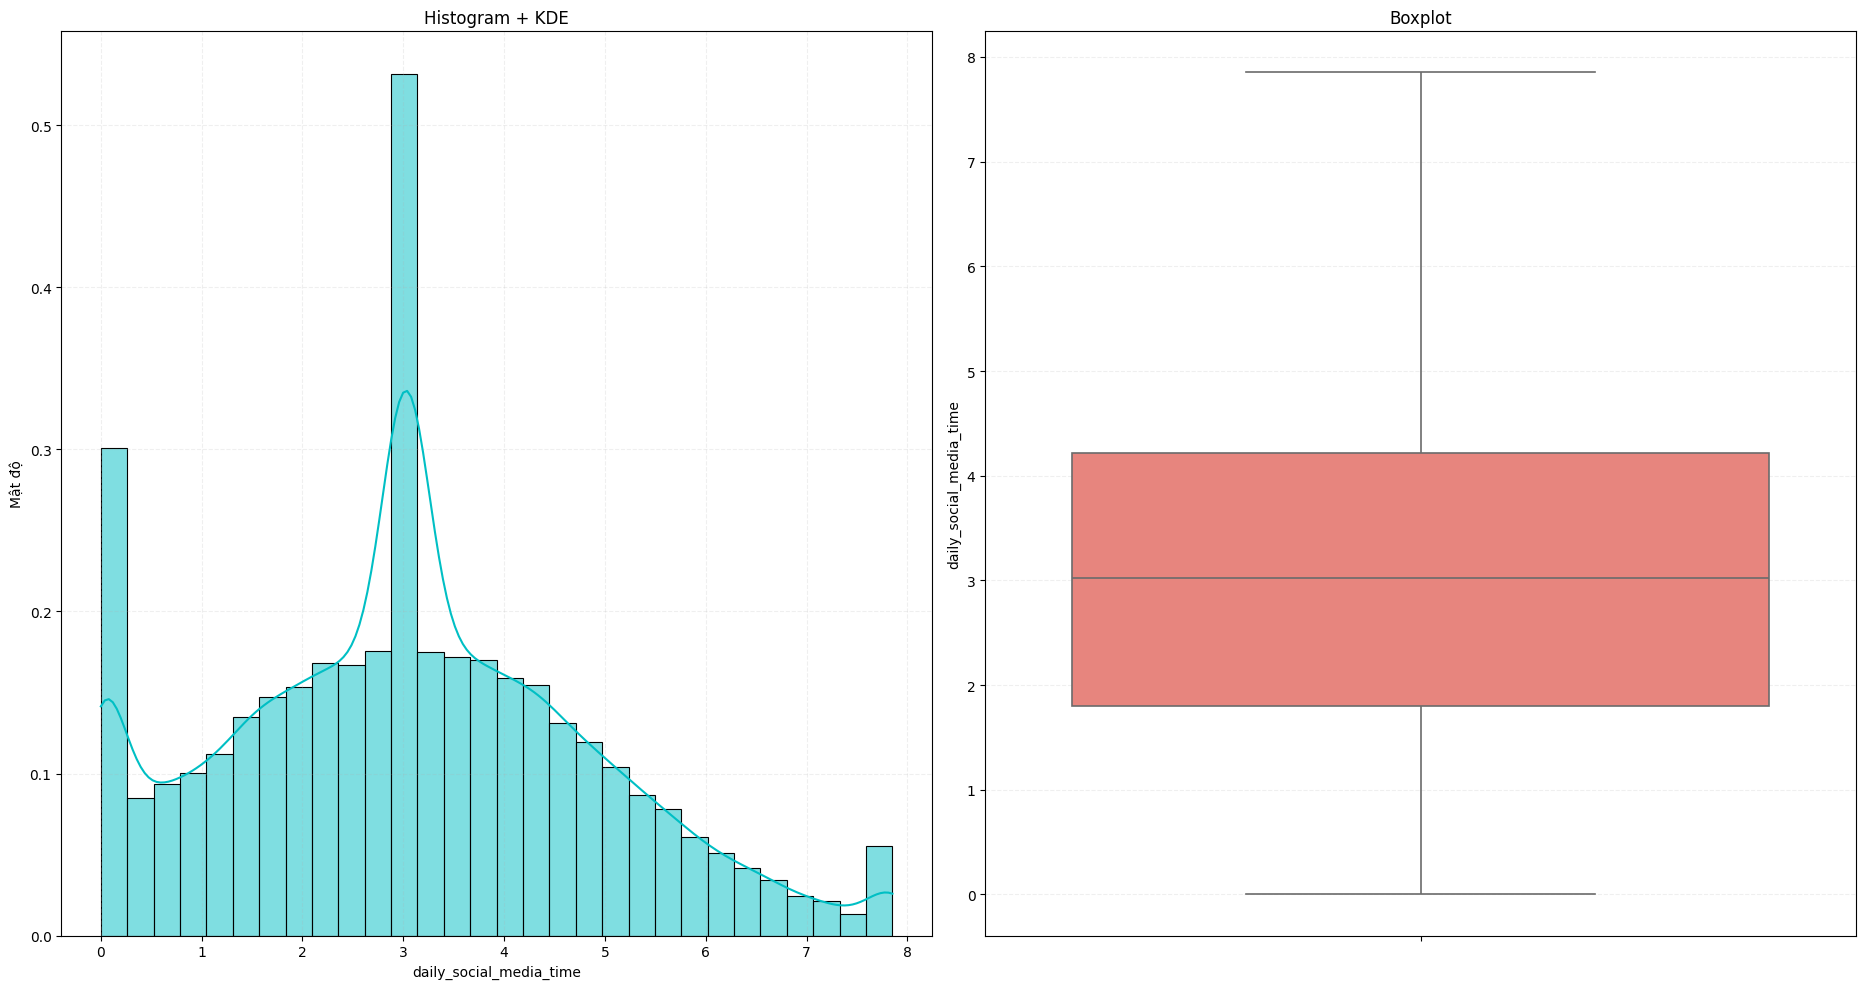


 Phân tích phân phối cho cột: number_of_notifications
  → Skewness  = 0.0844 (Lệch nhẹ phải)
  → Kurtosis  = 2.8162 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


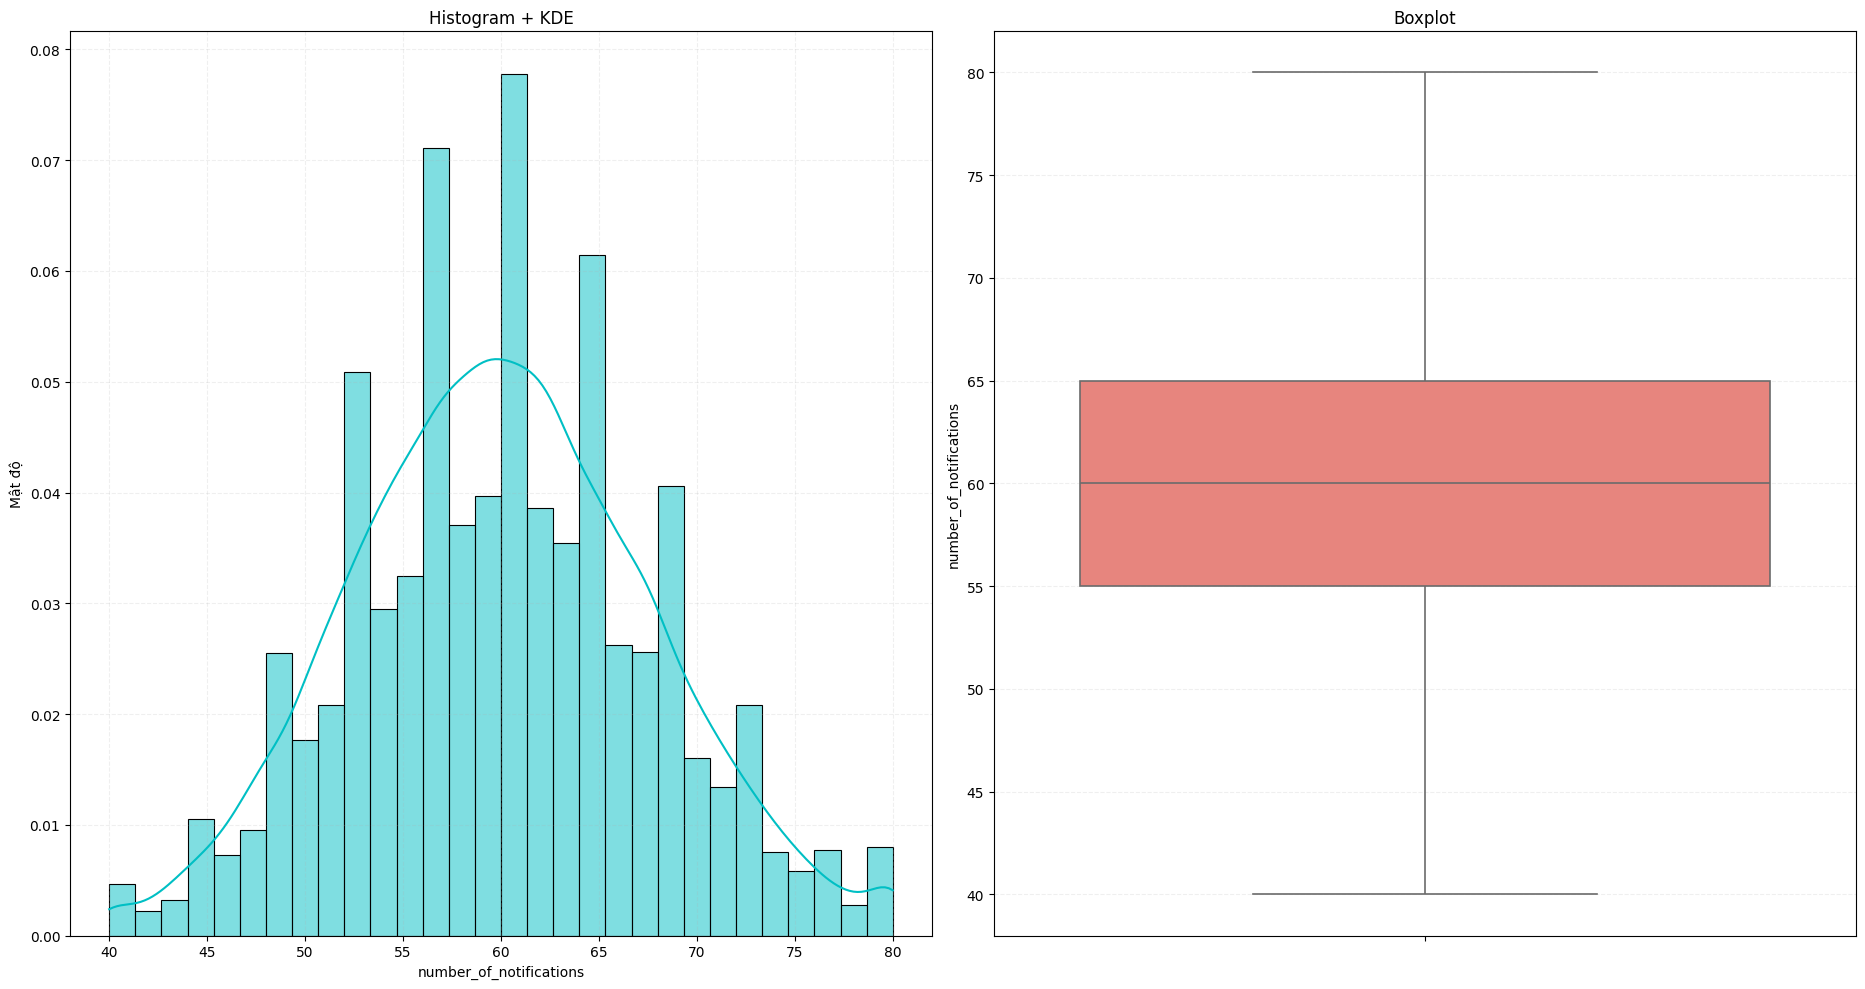


 Phân tích phân phối cho cột: work_hours_per_day
  → Skewness  = -0.0188 (Gần chuẩn)
  → Kurtosis  = 2.7815 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


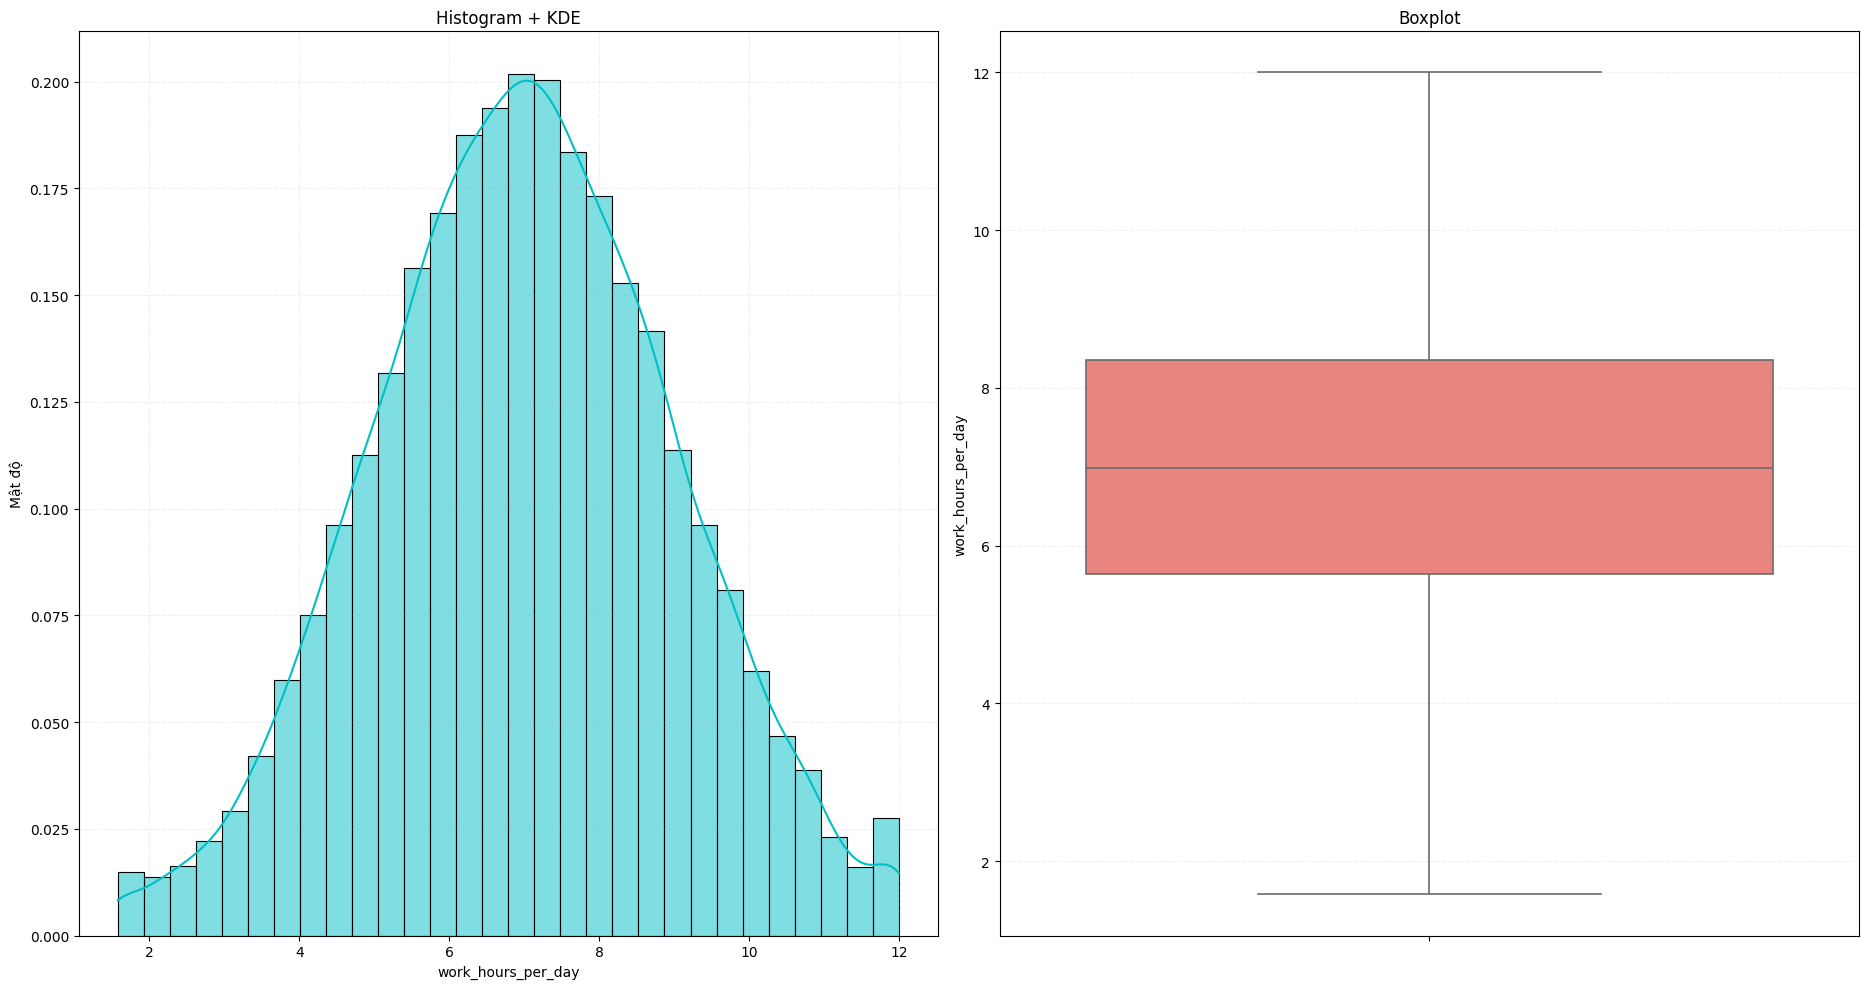


 Phân tích phân phối cho cột: perceived_productivity_score
  → Skewness  = -0.0127 (Gần chuẩn)
  → Kurtosis  = 1.8978 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


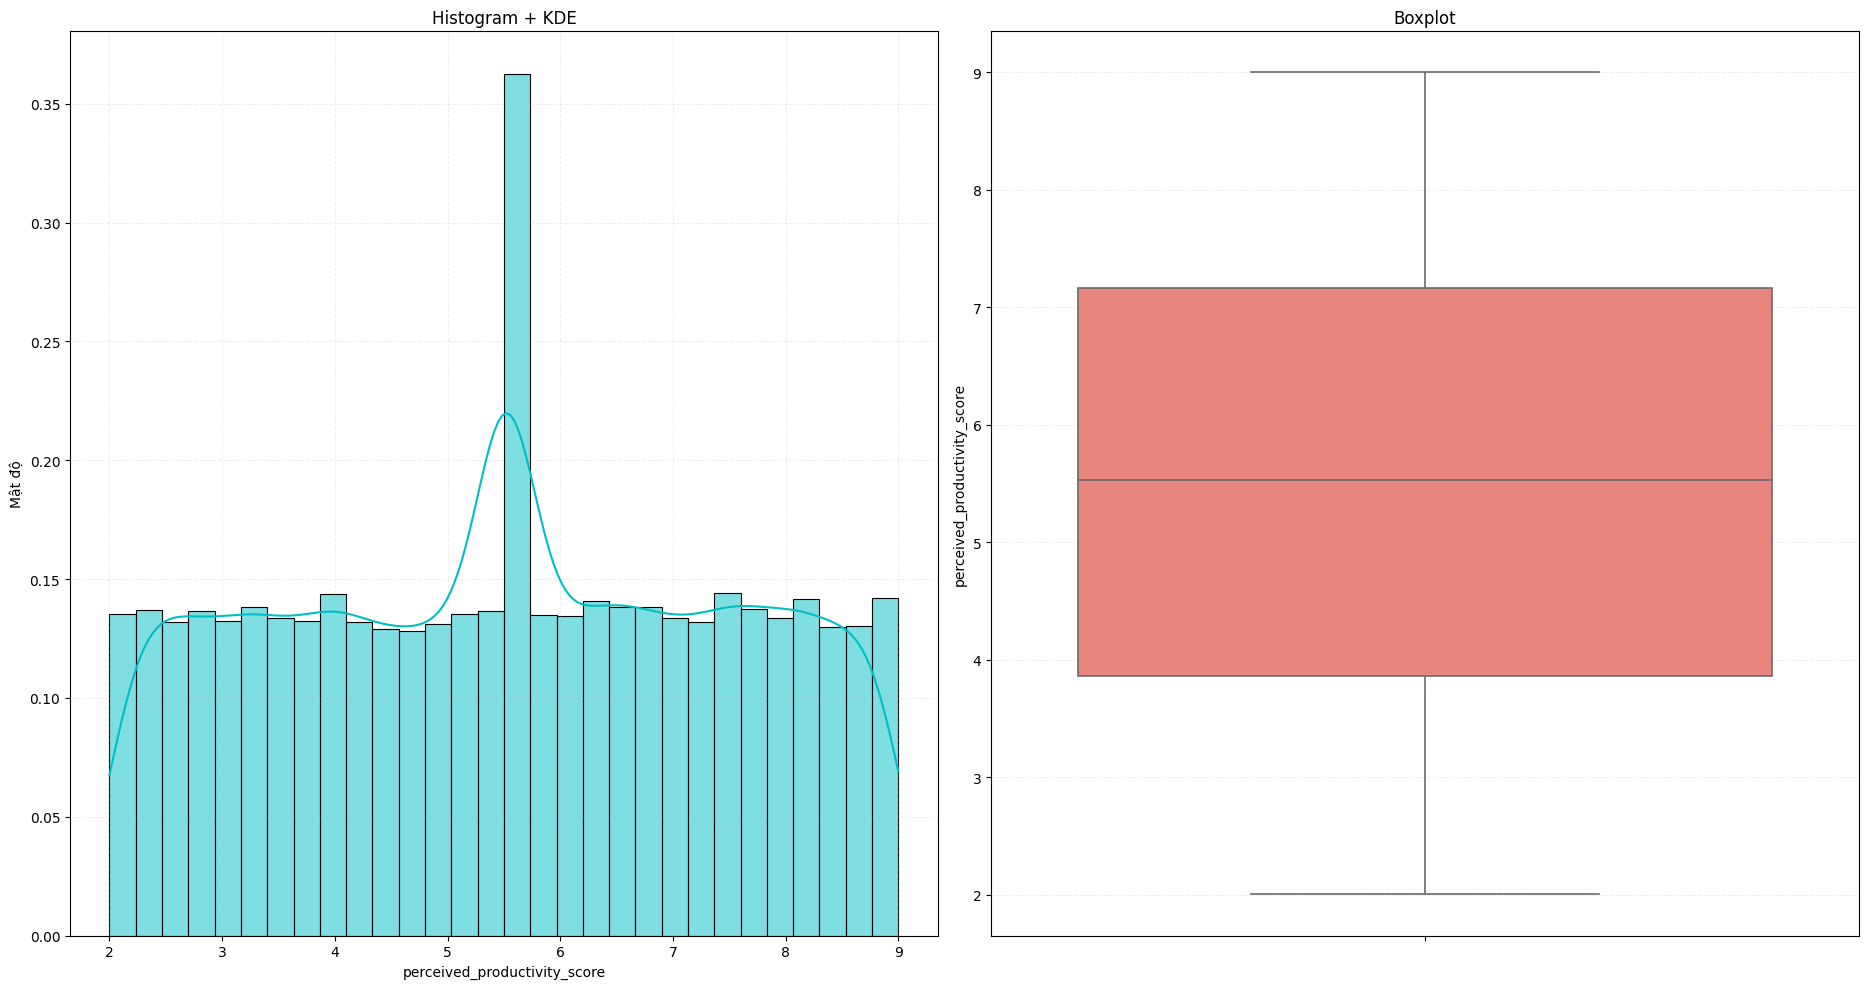


 Phân tích phân phối cho cột: actual_productivity_score
  → Skewness  = -0.0070 (Gần chuẩn)
  → Kurtosis  = 2.1318 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


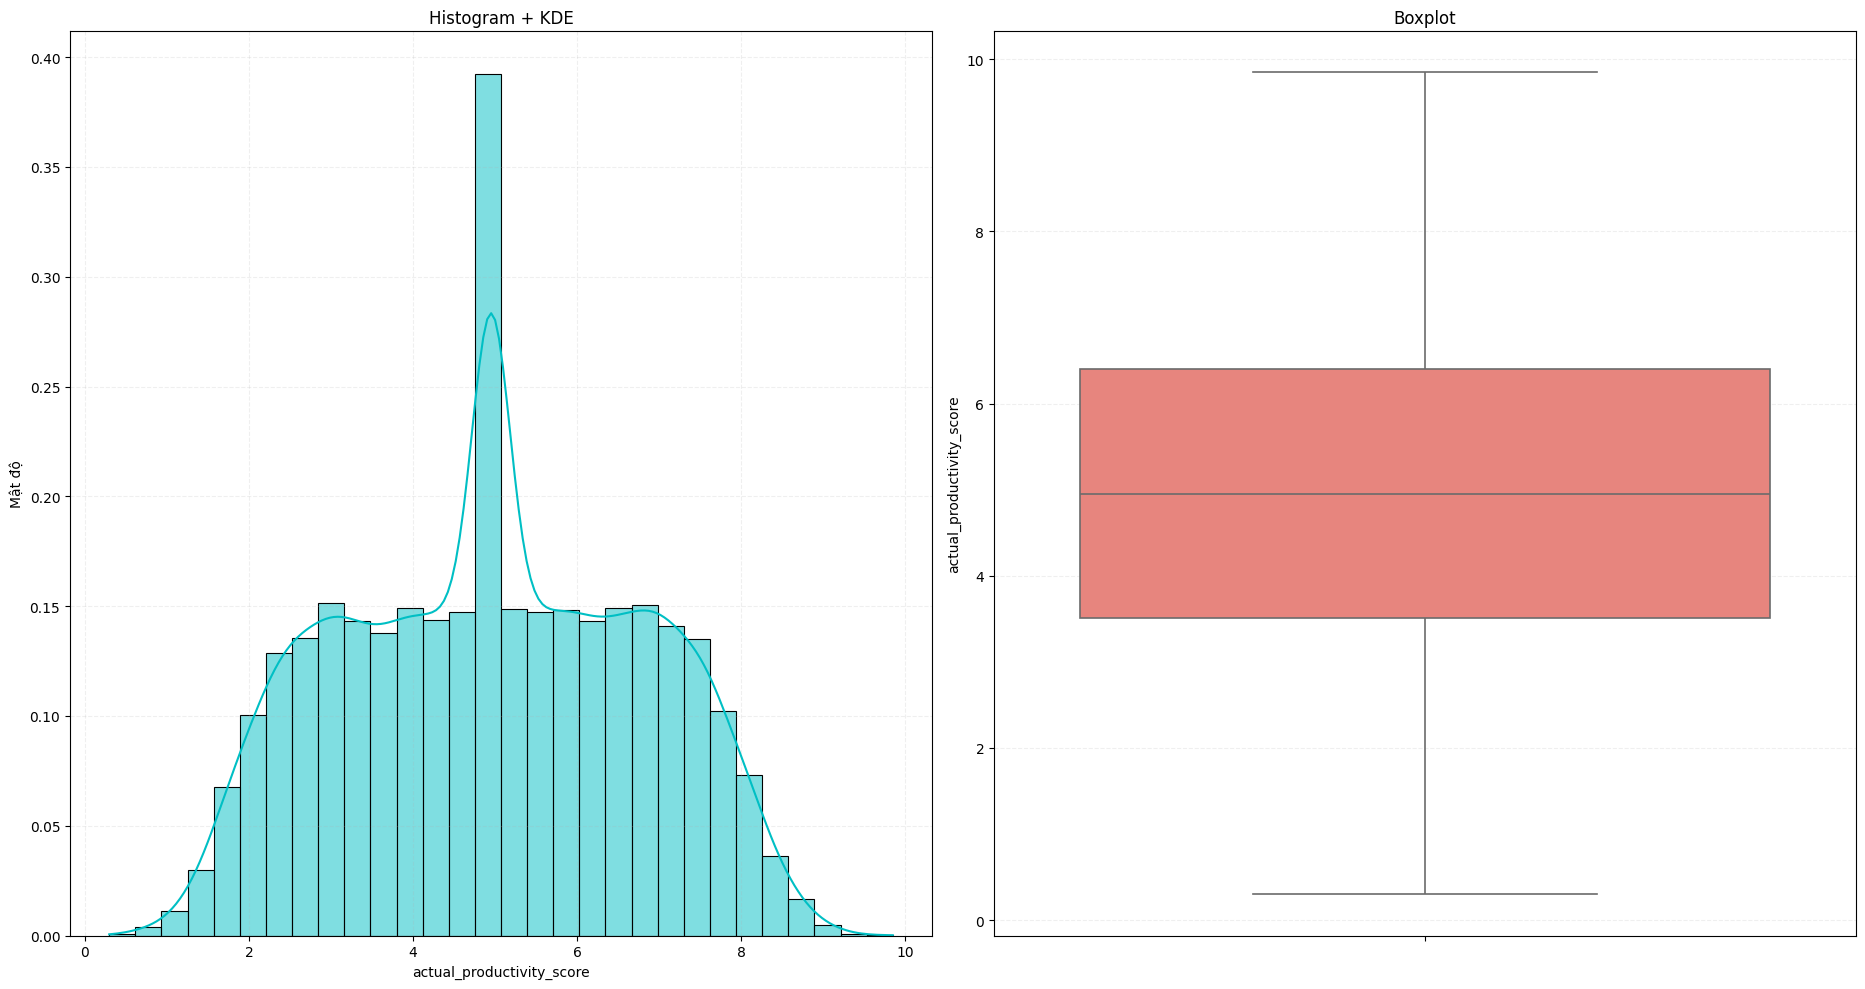


 Phân tích phân phối cho cột: stress_level
  → Skewness  = -0.0320 (Gần chuẩn)
  → Kurtosis  = 1.8965 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


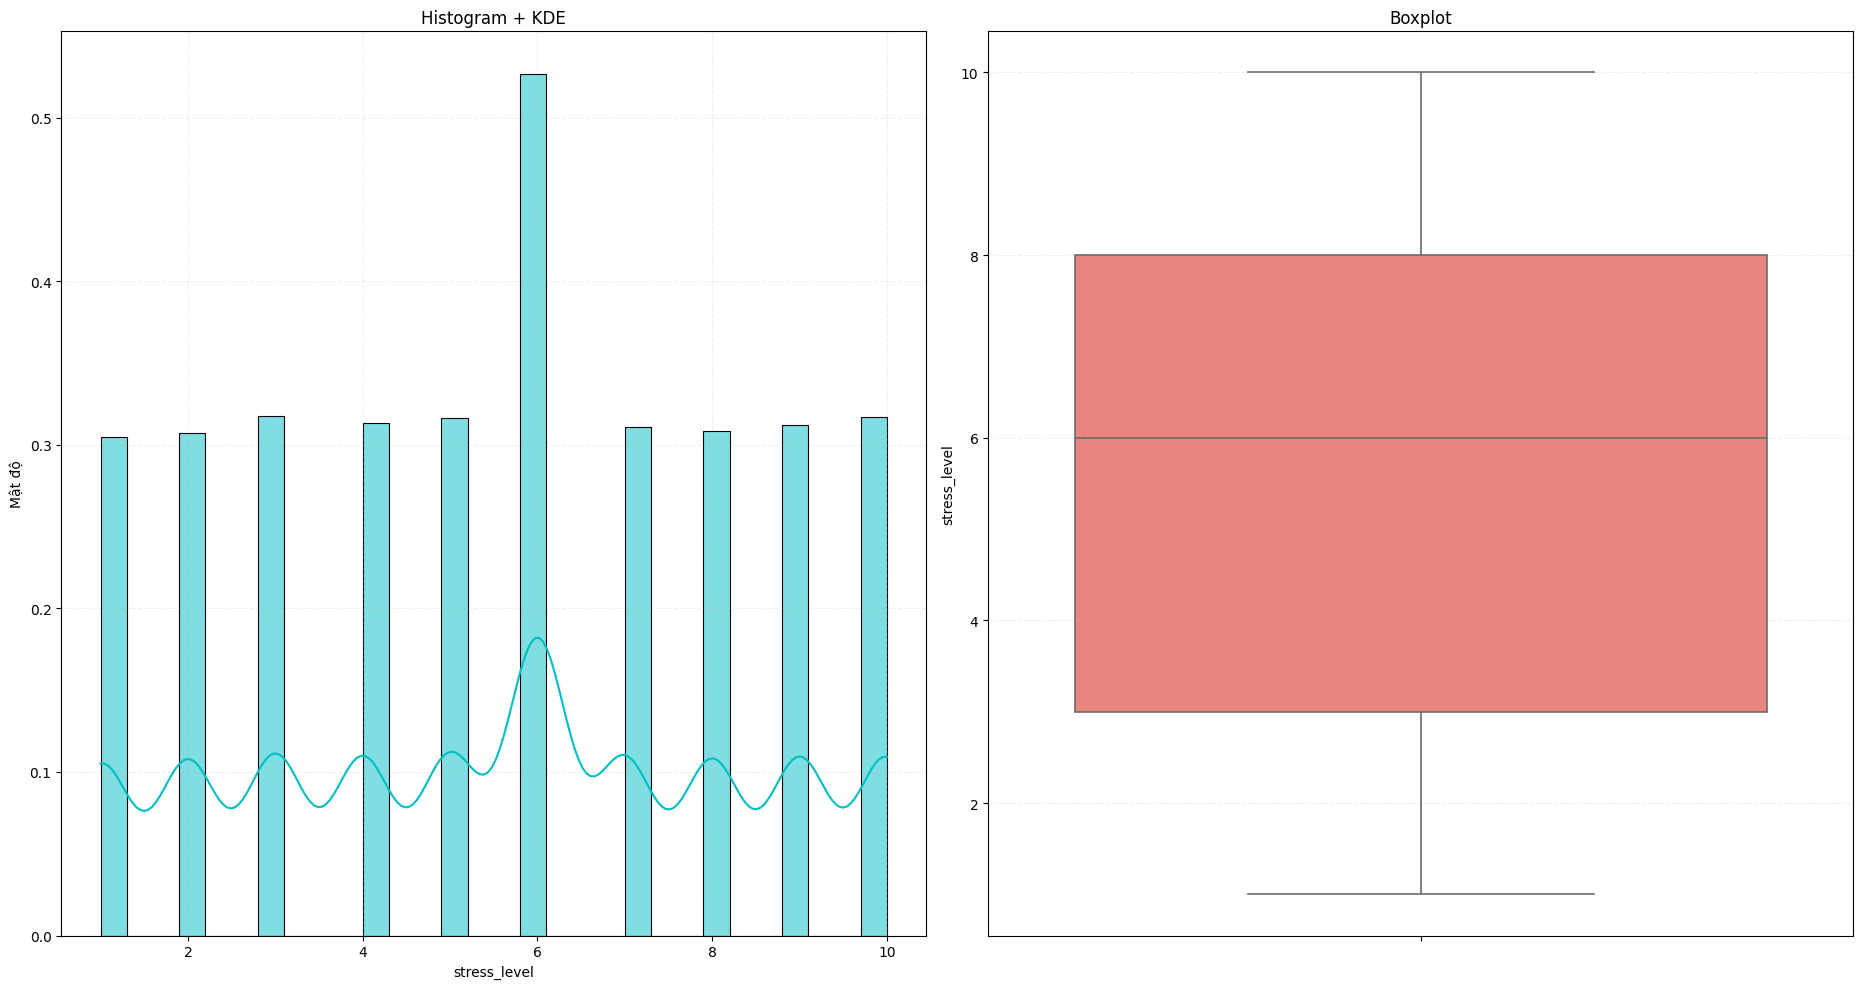


 Phân tích phân phối cho cột: sleep_hours
  → Skewness  = 0.0045 (Gần chuẩn)
  → Kurtosis  = 2.9275 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


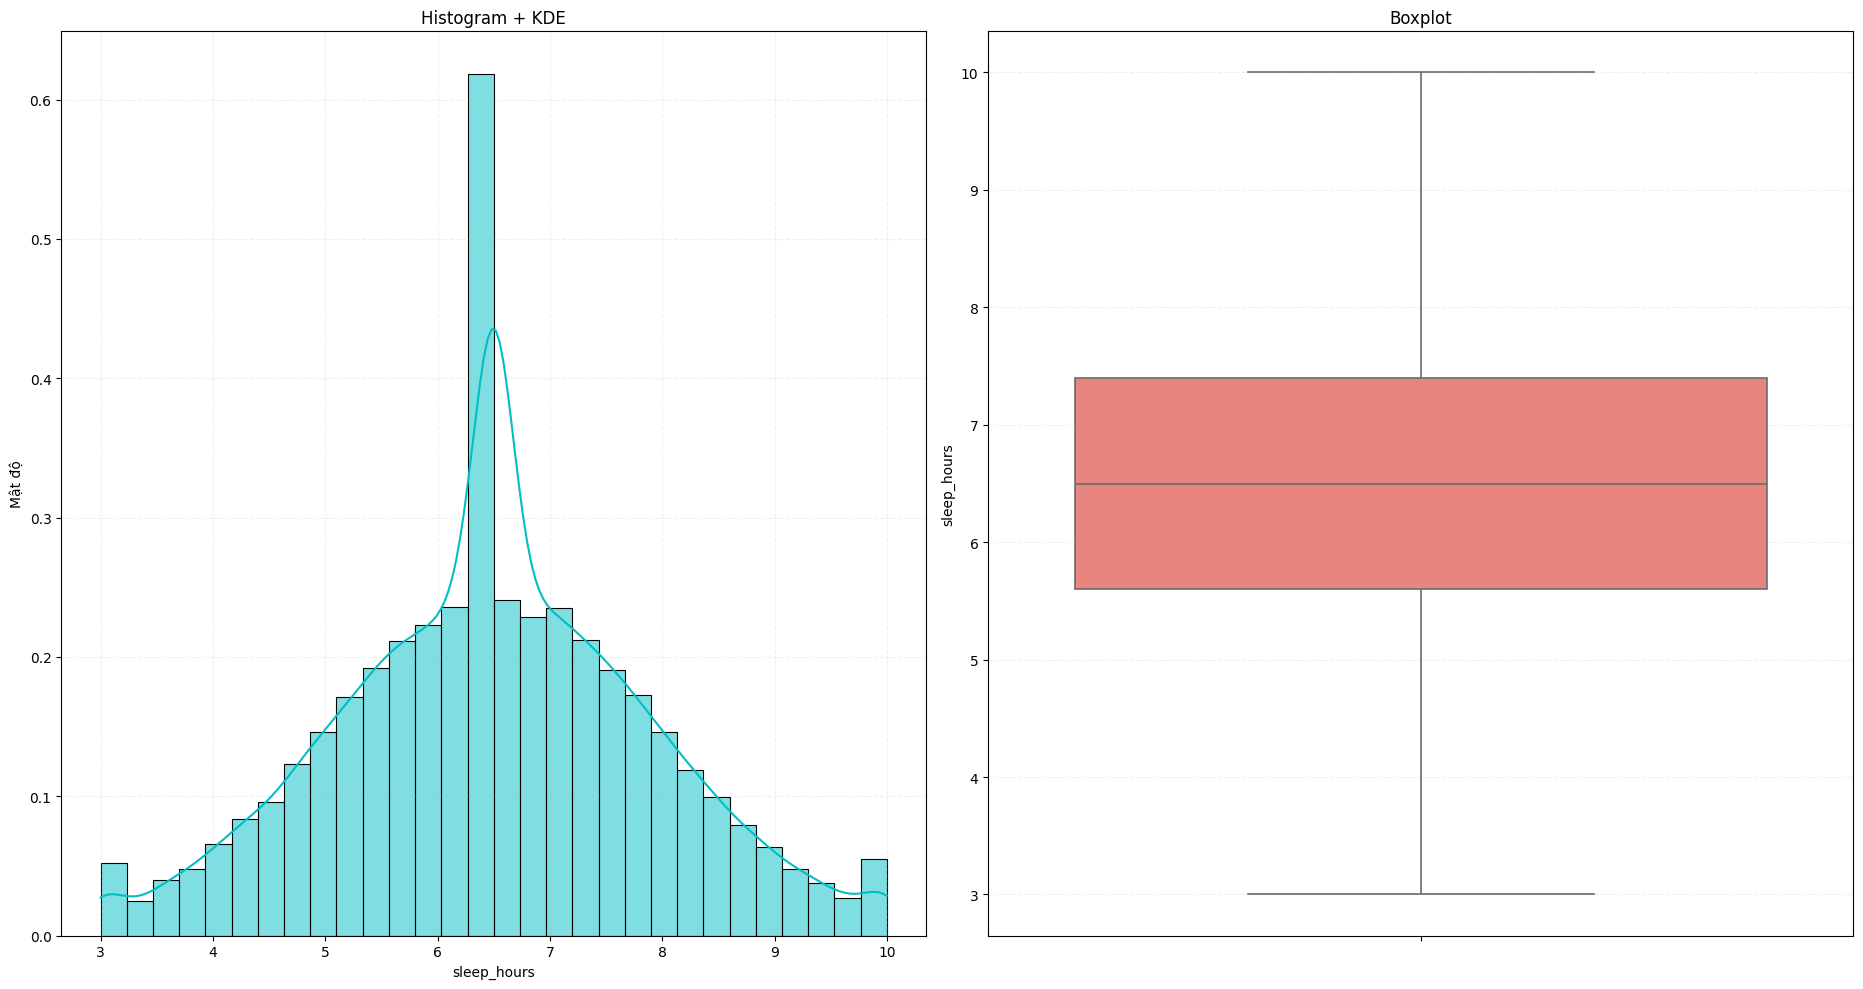


 Phân tích phân phối cho cột: screen_time_before_sleep
  → Skewness  = 0.2911 (Lệch nhẹ phải)
  → Kurtosis  = 2.6673 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


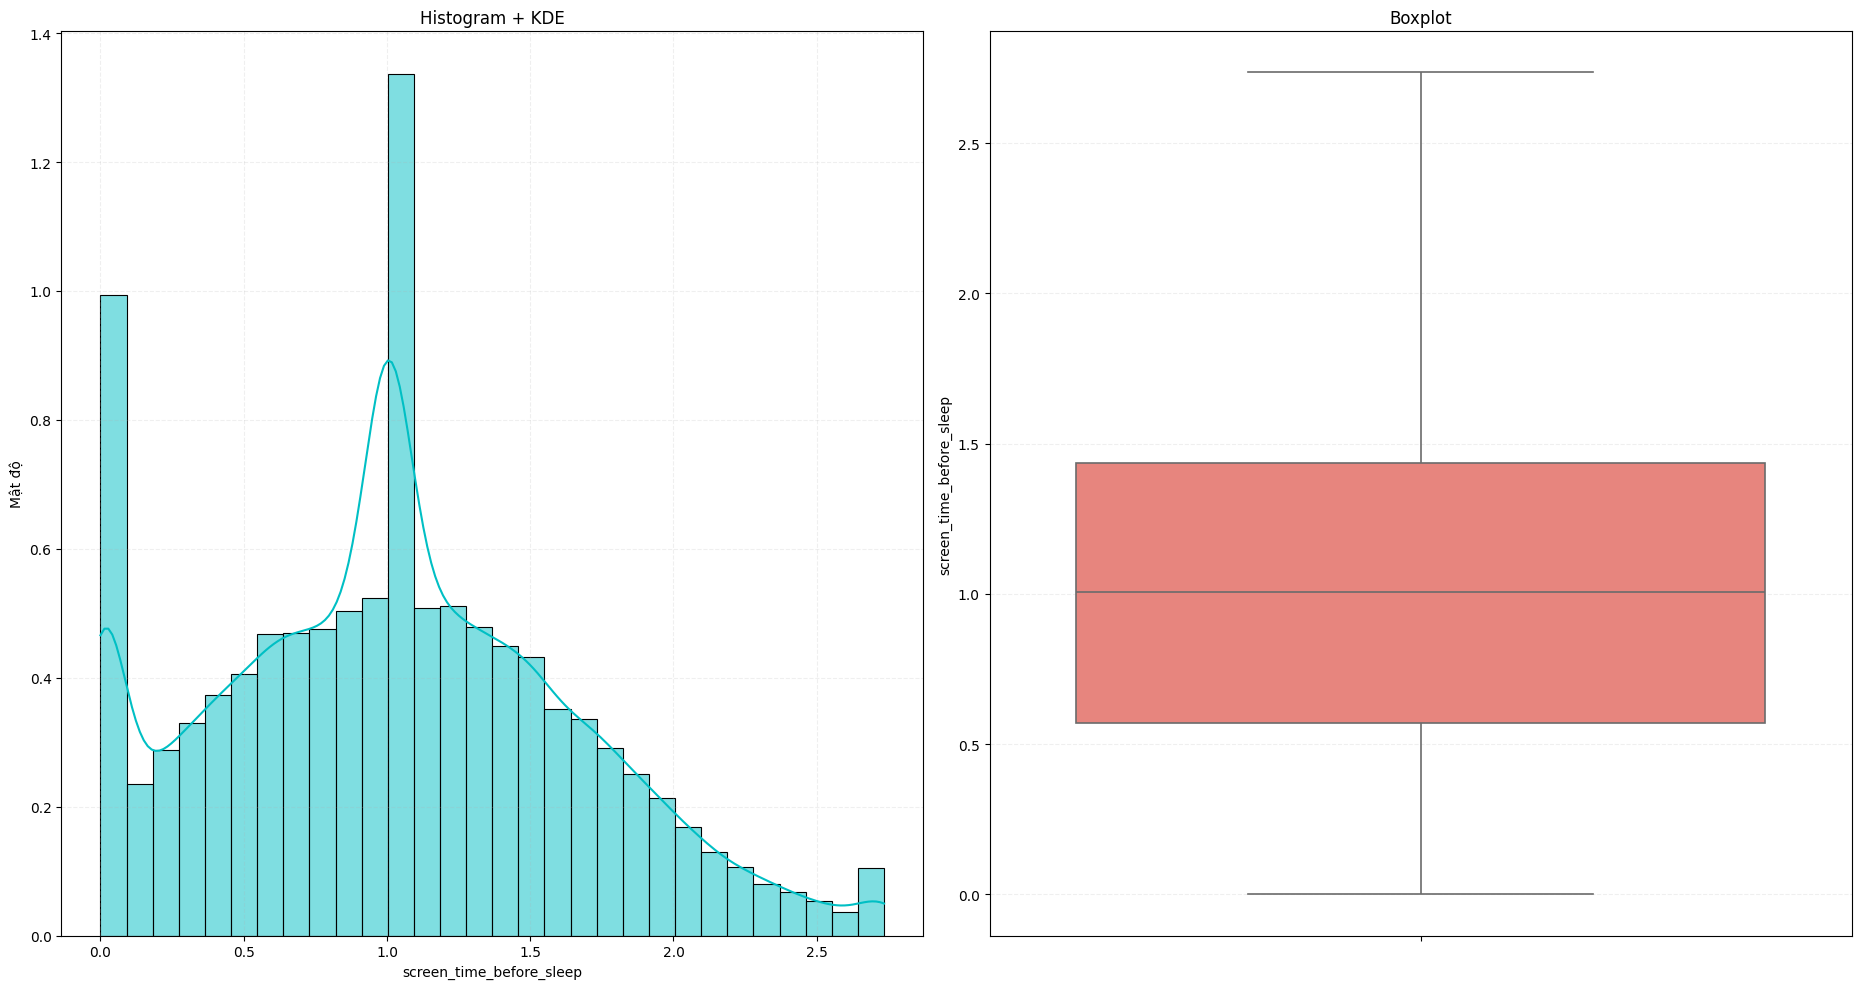


 Phân tích phân phối cho cột: breaks_during_work
  → Skewness  = 0.0067 (Gần chuẩn)
  → Kurtosis  = 1.7700 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


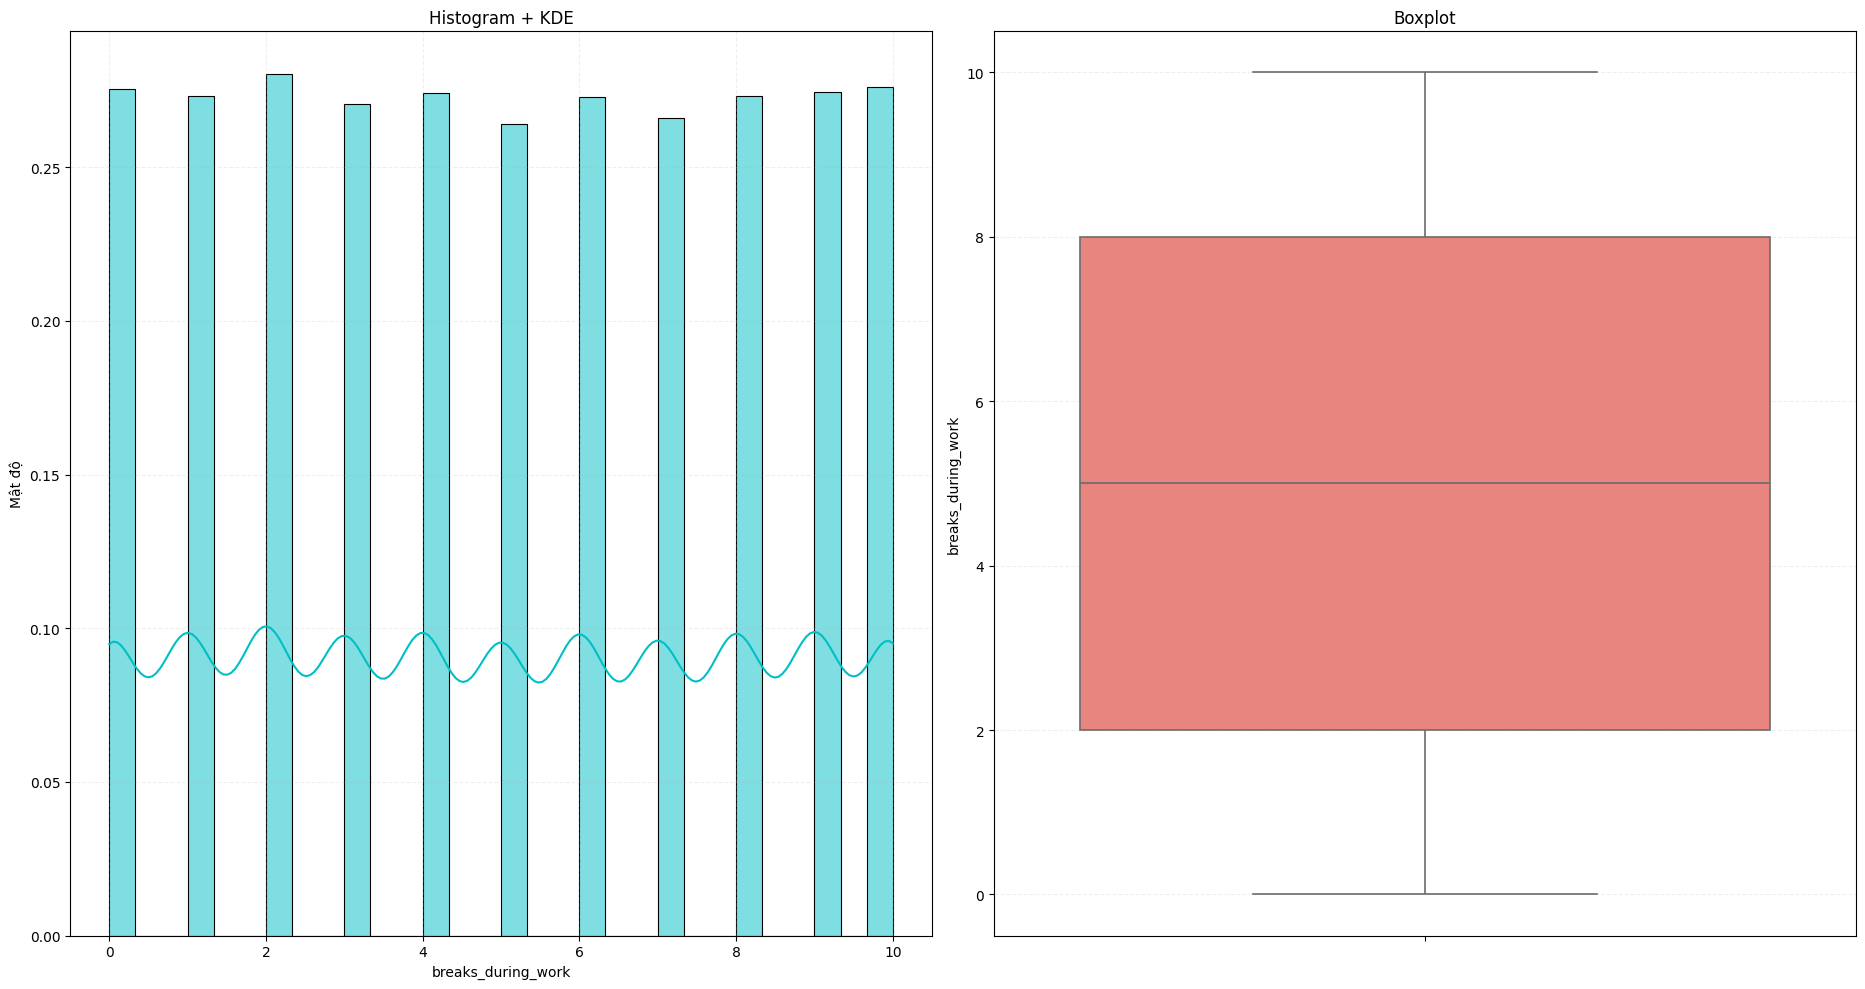


 Phân tích phân phối cho cột: coffee_consumption_per_day
  → Skewness  = 0.5727 (Lệch vừa phải)
  → Kurtosis  = 2.9442 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


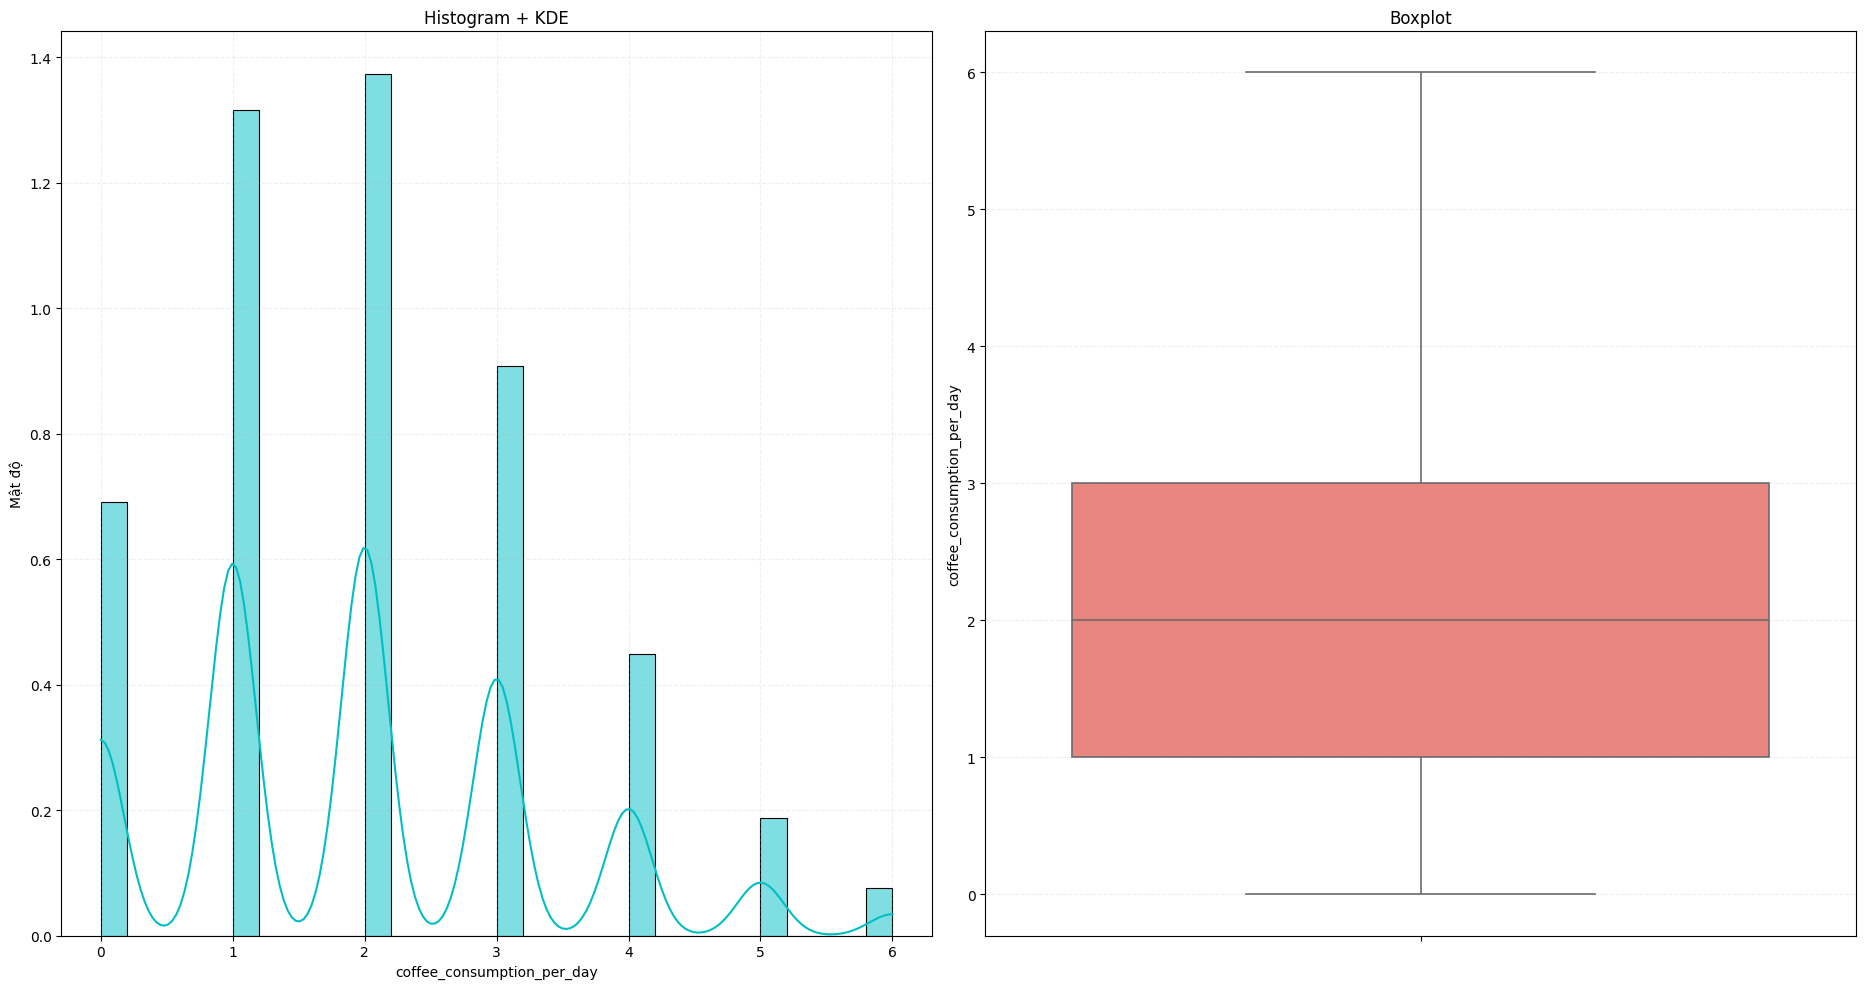


 Phân tích phân phối cho cột: days_feeling_burnout_per_month
  → Skewness  = -0.0078 (Gần chuẩn)
  → Kurtosis  = 1.7949 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


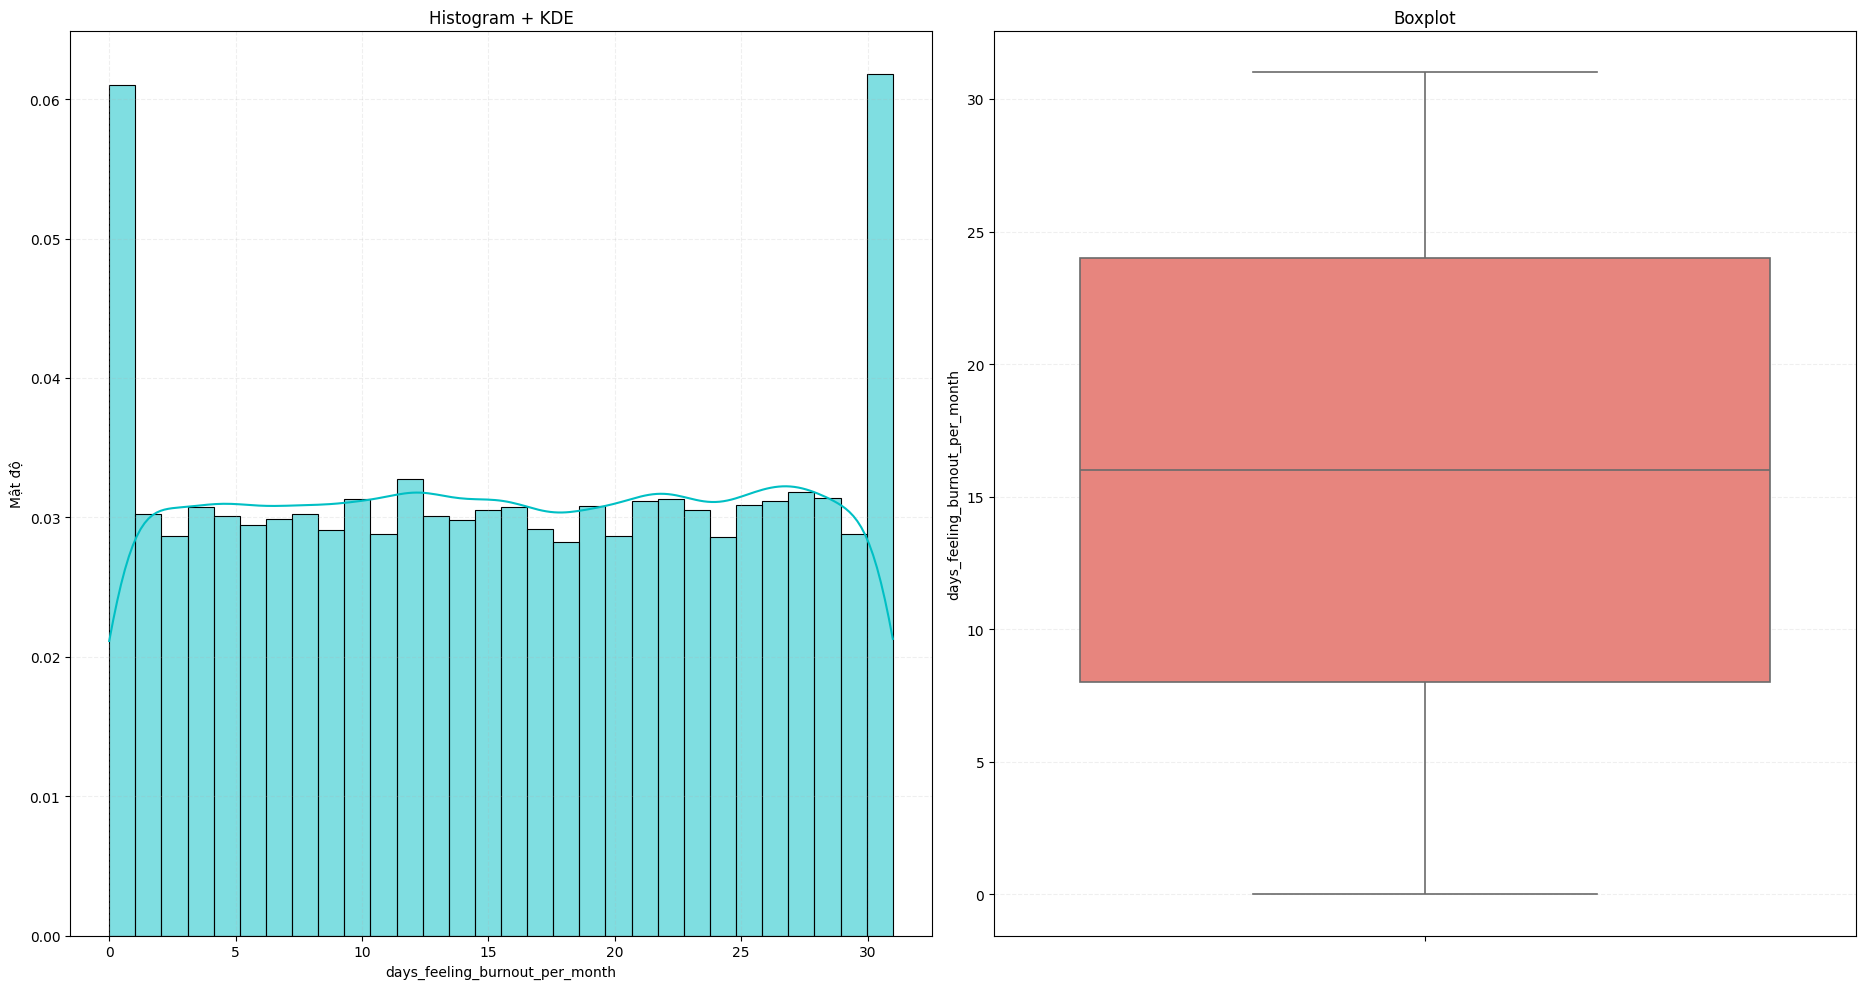


 Phân tích phân phối cho cột: weekly_offline_hours
  → Skewness  = 0.3922 (Lệch nhẹ phải)
  → Kurtosis  = 2.5398 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


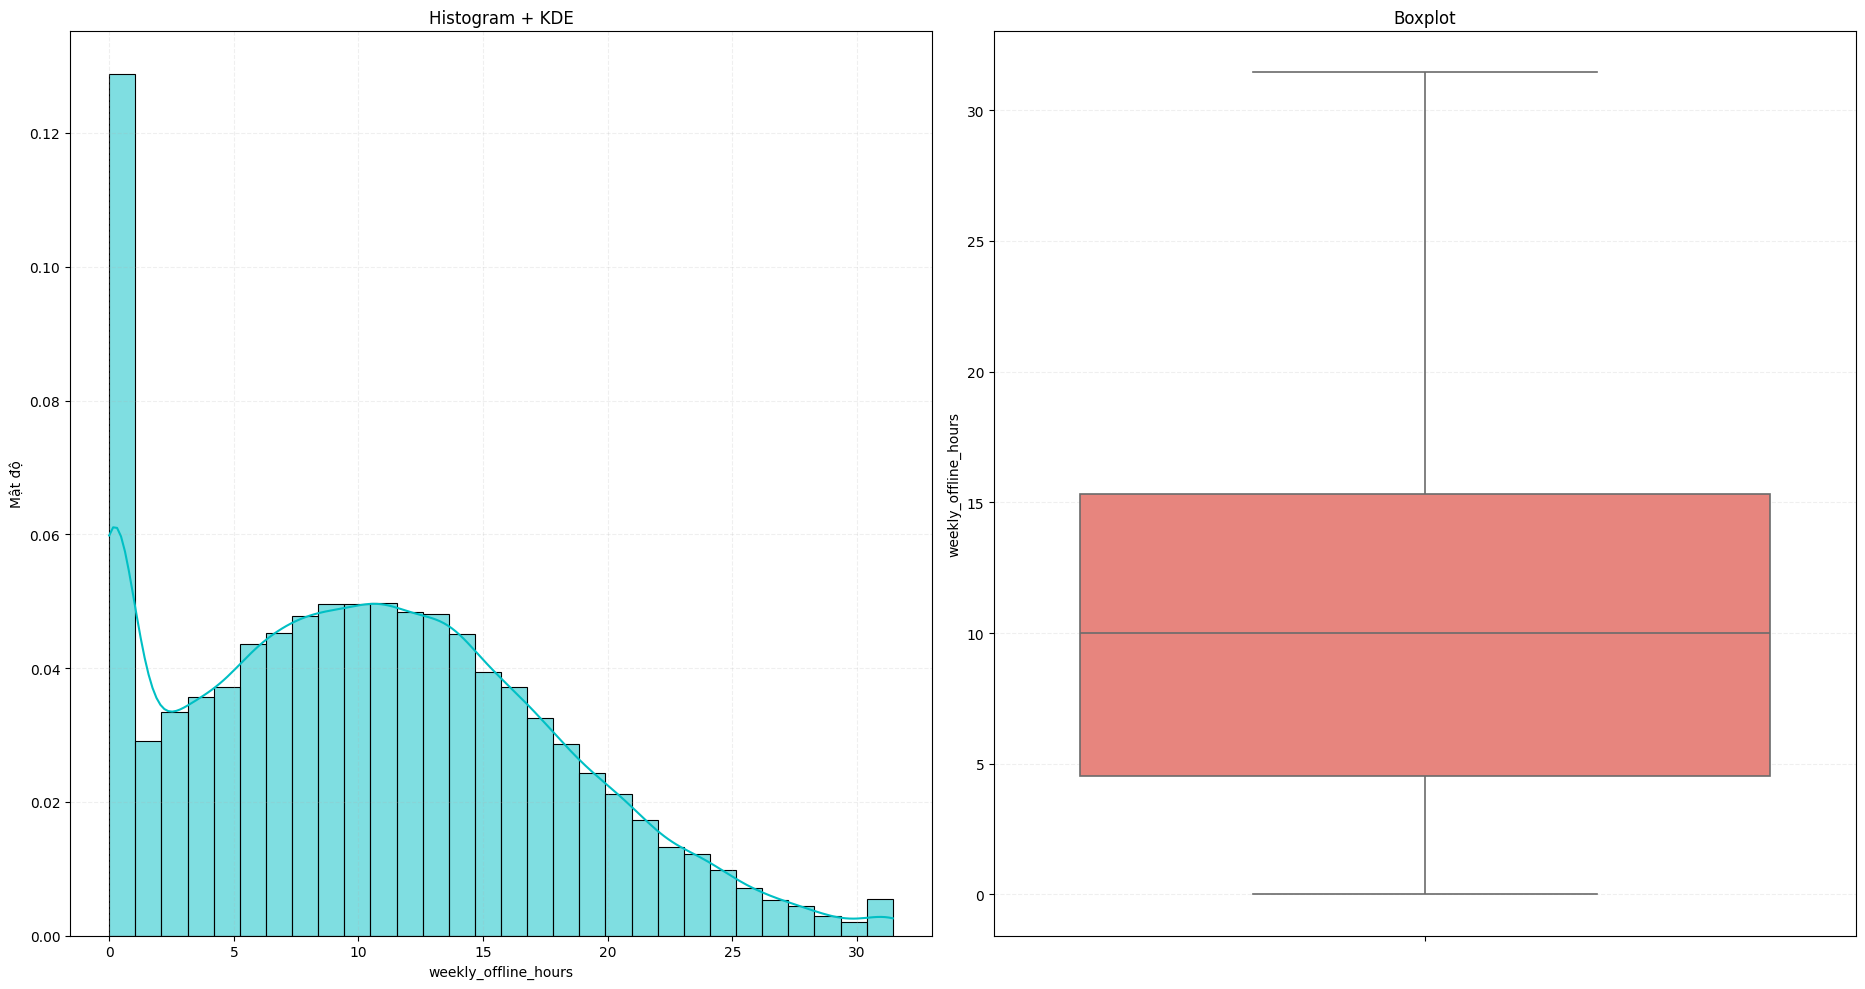


 Phân tích phân phối cho cột: job_satisfaction_score
  → Skewness  = 0.0115 (Gần chuẩn)
  → Kurtosis  = 2.5537 (Dẹt)
  → Số lượng outlier(z-score): 0
  → Số lượng outlier(IQR): 0


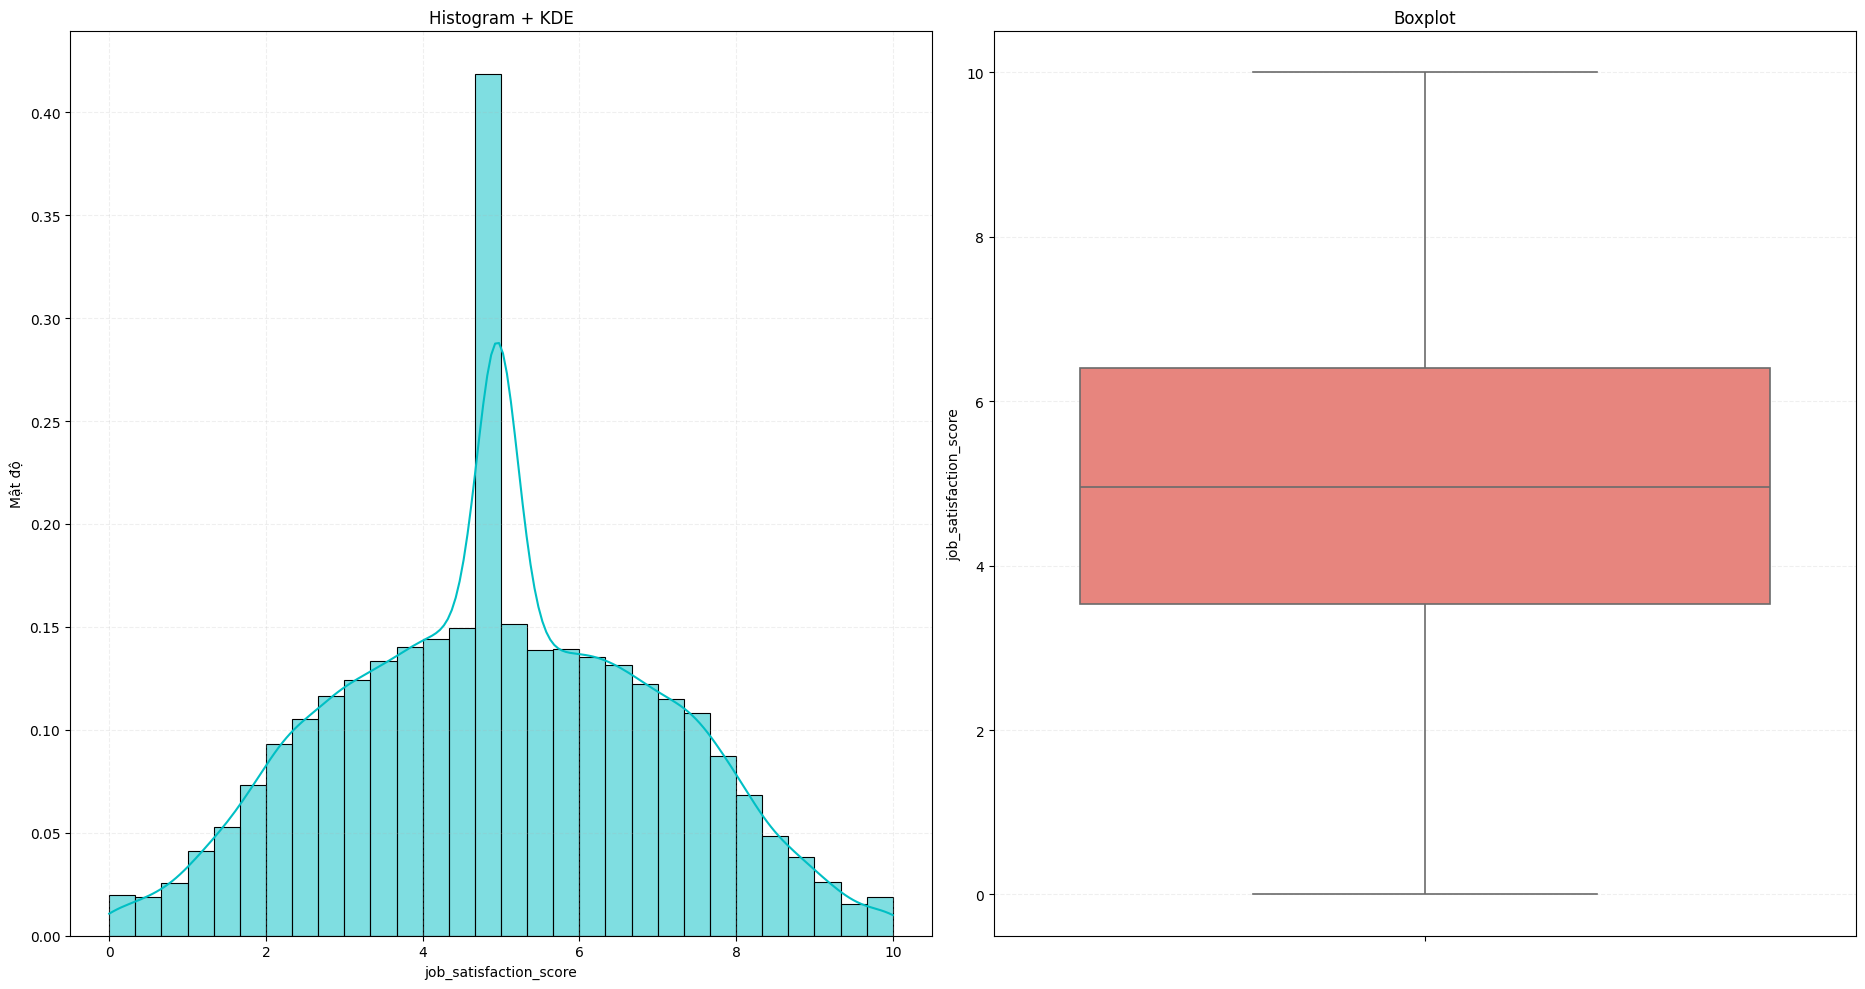

In [82]:
for col in numeric_cols:
    analyze_column(df, col)

###Ảnh hưởng của thời gian dùng MXH đến năng suất thực tế

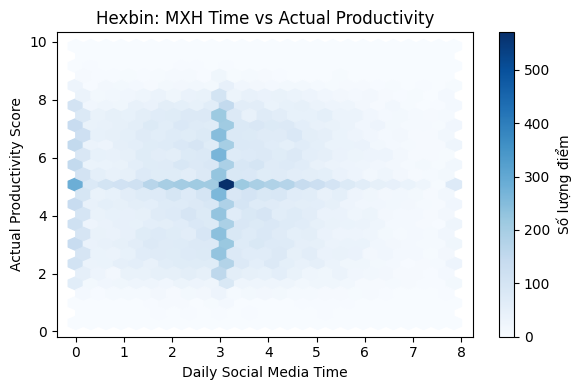

In [83]:
# Dùng matplotlib
plt.figure(figsize=(6, 4))
plt.hexbin(df["daily_social_media_time"], df["actual_productivity_score"], gridsize=25, cmap="Blues")
plt.colorbar(label="Số lượng điểm")
plt.xlabel("Daily Social Media Time")
plt.ylabel("Actual Productivity Score")
plt.title("Hexbin: MXH Time vs Actual Productivity")
plt.tight_layout()
plt.show()



Mối quan hệ giữa số giờ ngủ với số ngày kiệt sức trong tháng

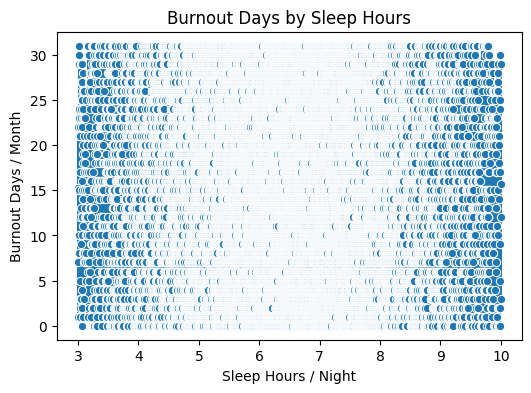

In [84]:
# Lineplot: Sleep hours vs Burnout
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x="sleep_hours", y="days_feeling_burnout_per_month",
             estimator="mean", marker="o")
plt.xlabel("Sleep Hours / Night")
plt.ylabel("Burnout Days / Month")
plt.title("Burnout Days by Sleep Hours")
plt.show()


### Ma trận tương quan giữa các biến mục tiêu với các đặc trưng


*** Tương quan với actual_productivity_score:
perceived_productivity_score      0.901346
job_satisfaction_score            0.809289
days_feeling_burnout_per_month   -0.010554
age                               0.010155
daily_social_media_time          -0.008073
sleep_hours                      -0.007189
has_digital_wellbeing_enabled    -0.006585
weekly_offline_hours             -0.005029
breaks_during_work               -0.004035
screen_time_before_sleep          0.002296
coffee_consumption_per_day        0.001428
uses_focus_apps                  -0.000982
stress_level                      0.000950
number_of_notifications           0.000213
work_hours_per_day                0.000005
Name: actual_productivity_score, dtype: float64


/tmp/ipython-input-85-3425080041.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


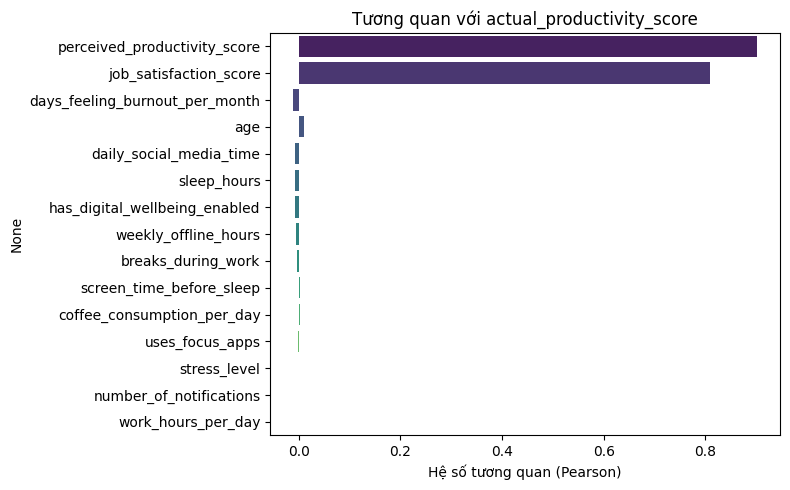


*** Tương quan với days_feeling_burnout_per_month:
weekly_offline_hours             0.015007
perceived_productivity_score    -0.011207
job_satisfaction_score          -0.010884
actual_productivity_score       -0.010554
uses_focus_apps                  0.006919
number_of_notifications          0.005243
sleep_hours                     -0.005028
has_digital_wellbeing_enabled   -0.005000
breaks_during_work              -0.003668
work_hours_per_day               0.003447
age                             -0.002998
coffee_consumption_per_day       0.002689
daily_social_media_time          0.002015
screen_time_before_sleep         0.001367
stress_level                    -0.000946
Name: days_feeling_burnout_per_month, dtype: float64


/tmp/ipython-input-85-3425080041.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


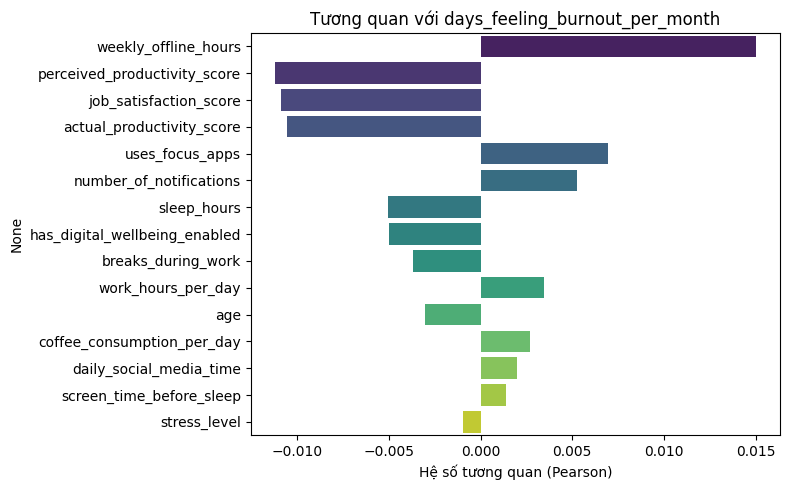

In [85]:
#Xác định các biến mục tiêu
ds_target = ['actual_productivity_score', 'days_feeling_burnout_per_month']
# Lọc ra các cột số để tính Pearson correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


for target in ds_target:
    if target in df.columns:
        print(f"\n*** Tương quan với {target}:")

        # Tạo DataFrame chỉ gồm cột số và cột mục tiêu
        cols = [col for col in numerical_cols if col != target] + [target]
        df_corr = df[cols].dropna()  # loại bỏ dòng thiếu

        # Tính ma trận tương quan
        corr = df_corr.corr()[target].drop(target).sort_values(key=abs, ascending=False)

        # In bảng
        print(corr)

        # Vẽ biểu đồ
        plt.figure(figsize=(8, 5))
        sns.barplot(x=corr.values, y=corr.index, palette='viridis')
        plt.title(f'Tương quan với {target}')
        plt.xlabel('Hệ số tương quan (Pearson)')
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Không tìm thấy cột '{target}' trong DataFrame.")

###Ma trận tương quan giữa các biến định lượng

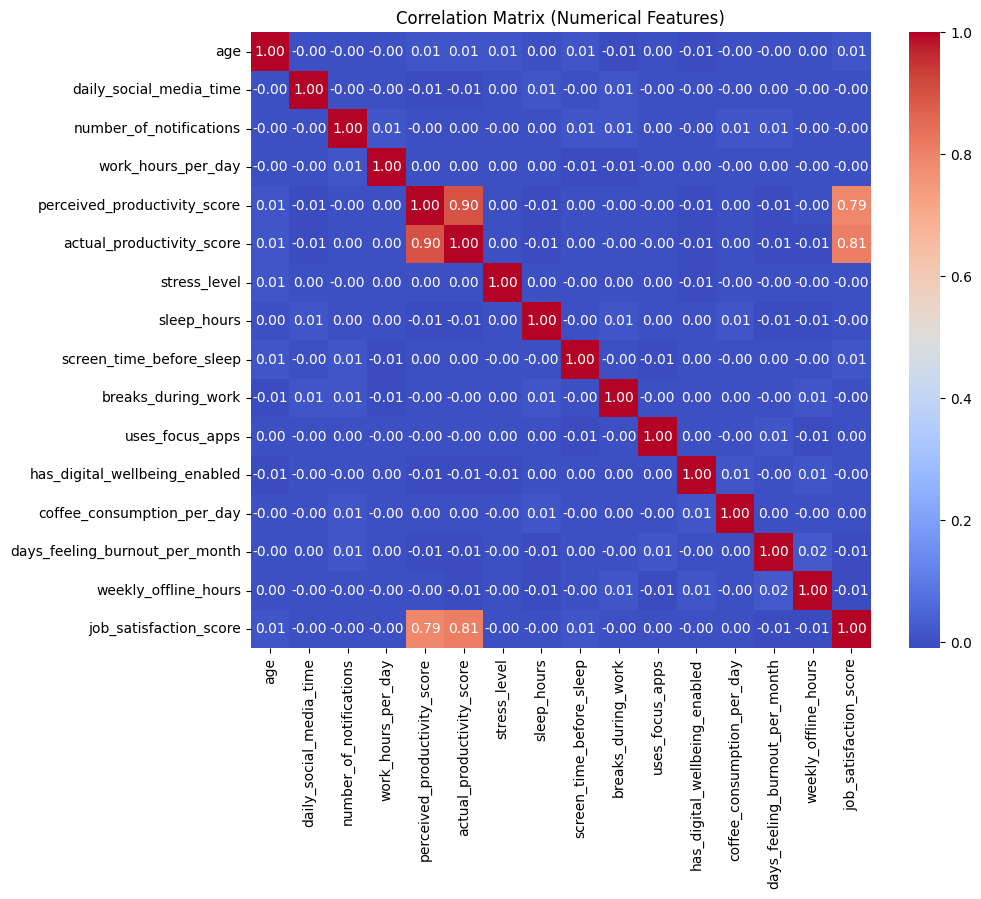

In [86]:
plt.figure(figsize=(10,8))
num_cols = df.select_dtypes(include="number")
corr = num_cols.corr().round(2)
sns.heatmap(corr,annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

# 3. Khai thác mẫu phổ biến - Association Pattern Mining

In [87]:
data = df.copy()

data=data.rename(columns={
    'age': 'age',
    'gender': 'gender',
    'job_type': 'job_type',
    'daily_social_media_time': 'daily_social_time',
    'social_platform_preference': 'preferred_platform',
    'number_of_notifications': 'notifications',
    'work_hours_per_day': 'work_hours',
    'perceived_productivity_score': 'perceived_productivity',
    'actual_productivity_score': 'actual_productivity',
    'stress_level': 'stress',
    'sleep_hours': 'sleep',
    'screen_time_before_sleep': 'screen_time_before_sleep',
    'breaks_during_work': 'breaks_during_work',
    'uses_focus_apps': 'uses_focus_app',
    'has_digital_wellbeing_enabled': 'wellbeing_enabled',
    'coffee_consumption_per_day': 'coffee_per_day',
    'days_feeling_burnout_per_month': 'burnout_days',
    'weekly_offline_hours': 'offline_hours',
    'job_satisfaction_score': 'job_satisfaction'
    })
data.head()

age  gender    job_type  daily_social_time preferred_platform  \
0   56    Male  Unemployed           4.180940           Facebook   
1   46    Male      Health           3.249603            Twitter   
2   32    Male     Finance           3.025913            Twitter   
3   60  Female  Unemployed           3.025913           Facebook   
4   25    Male          IT           3.025913           Telegram   

   notifications  work_hours  perceived_productivity  actual_productivity  \
0             61    6.753558                8.040464             7.291555   
1             59    9.169296                5.063368             5.165093   
2             57    7.910952                3.861762             3.474053   
3             59    6.355027                2.916331             1.774869   
4             66    6.214096                8.868753             4.951742   

   stress     sleep  screen_time_before_sleep  breaks_during_work  \
0     4.0  5.116546                  0.419102                   8   
1     7.0  5.103897                  0.671519                   7   
2     4.0  8.583222                  0.624378                   0   
3     6.0  6.052984                  1.204540                   1   
4     7.0  5.405706                  1.876254                   1   

   uses_focus_app  wellbeing_enabled  coffee_per_day  burnout_days  \
0               0                  0               4            11   
1               1                  1               2            25   
2               1                  0               3            17   
3               0                  0               0             4   
4               0                  1               1            30   

   offline_hours  job_satisfaction  
0      21.927072          6.336688  
1       0.000000          3.412427  
2      10.322044          2.474944  
3      23.876616          1.733670  
4      10.653519          9.693060

## 3.1 Rời rạc theo kinh nghiệm

### 3.1.1 Chọn cột

In [88]:

exp_cols=[
    'age', #r
    'daily_social_time', #r
    'notifications',#r
    'work_hours',#r
    'actual_productivity',#r
    'stress',#r
    'sleep', #r
    'screen_time_before_sleep',#r
    'breaks_during_work',#r
    'uses_focus_app',#r
    'wellbeing_enabled',#r
    'coffee_per_day',#r
    'burnout_days',#r
    'offline_hours',#r
    'job_satisfaction'#r
]
df_exp_apm=data[exp_cols].copy()




###3.1.2 Rời rạc

In [89]:
###   SOCIAL ###

# Chia độ tuổi

df_exp_apm['age'] = pd.cut(df_exp_apm['age'],
                         bins=[17, 34, 49, 65],
                         labels=['young', 'middle', 'senior'])

#daily_social_time: thời gian dành cho mxh / ngày
'''
  <2: Ít dùng MXH
  2-4: Bình thường
  >4: Nhiều dùng MXH
'''
df_exp_apm['daily_social_time'] = pd.cut(df_exp_apm['daily_social_time'],
                               bins=[-1,2,4,8],
                              labels=['social_low', 'social_medium', 'social_high'])

#sleep: Số giờ ngủ trung bình mỗi đêm
'''
  <6: thiếu ngủ
  6-8: ngủ đủ
  >8: ngủ nhiều
'''
df_exp_apm['sleep'] = pd.cut(df_exp_apm['sleep'],
                     bins=[0, 6, 8, 11],
                     labels=['sleep_short', 'sleep_average', 'sleep_long'])


#screen_time_before_sleep: Thời gian sử dụng mxh trước khi ngủ

'''
  <1: An toàn cho giấc ngủ
  1-2: bình thường
  >2: Ảnh hướng giấc ngủ
'''

df_exp_apm['screen_time_before_sleep'] = pd.cut(df_exp_apm['screen_time_before_sleep'],
                                       bins=[-0.01, 0.75, 1.5, 3],
                                        labels=['screen_low', 'screen_medium', 'screen_high'])

#notifications: số lượng thông báo mxh nhận được/ ngày
'''
  <55: Thấp
  55-65: Bình thường
  >65: Cao
'''
df_exp_apm['notifications'] = pd.cut(df_exp_apm['notifications'],
                                 bins=[0, 55, 64, 80],
                                labels=['noti_low', 'noti_medium', 'noti_high'])

# uses_focus_app
df_exp_apm['uses_focus_app'] = df_exp_apm['uses_focus_app'].map({1: 'uses_focus_app', 0: 'un_uses_focus_app'})

# wellbeing_enabled
df_exp_apm['wellbeing_enabled'] = df_exp_apm['wellbeing_enabled'].map({1: 'wellbeing_enabled', 0: 'un_wellbeing_enabled'})

#offline_hours: số giờ không dành cho mxh / tuần
'''
  <6: Dành quá nhiều thời gian với ứng dụng công nghệ
  6-15: Bình thường
  >15: Cân bằng giữa công nghệ và đời sống
'''
df_exp_apm['offline_hours'] = pd.cut(df_exp_apm['offline_hours'],
                                 bins=[-0.01, 8, 15, 30],
                         labels=['offline_low', 'offline_medium', 'offline_high'])
###     WORK  ###

#burnout_days
df_exp_apm['burnout_days'] = pd.cut(df_exp_apm['burnout_days'],
                                     bins=[-1, 8, 20, 32],
                                     labels=['bur_low', 'bur_medium', 'bur_high'])

# coffee_per_day
df_exp_apm['coffee_per_day'] = pd.cut(df_exp_apm['coffee_per_day'],
                                    bins=[-1, 1, 3, 7],
                                    labels=['coffee_low', 'coffee_medium', 'coffee_high'])
#work_hours
df_exp_apm['work_hours'] = pd.cut(df_exp_apm['work_hours'],
                                      bins=[-1, 5.5, 8.3, 12],
                                      labels=['work_low', 'work_medium', 'work_high'])
#breaks_during_work
df_exp_apm['breaks_during_work'] = pd.cut(df_exp_apm['breaks_during_work'],
                                   bins=[-1, 4, 7, 10],
                                   labels=['break_low', 'break_medium', 'break_high'])



###     CẢM NHẬN & KẾT QUẢ ###

#actual_productivity
'''
  <4: Thấp
  4-6.5: Bình thường
  >6.5: Cao
'''
df_exp_apm['actual_productivity'] = pd.cut(df_exp_apm['actual_productivity'], bins=[-0.1, 4, 6.5, 11],
                         labels=['prod_low', 'prod_medium', 'prod_high'])

#stress
'''
  <4: Ổn định
  4-7: Cảnh báo
  >7: Căng thẳng cáo
'''
df_exp_apm['stress'] = pd.cut(df_exp_apm['stress'], bins=[0, 4, 7, 10],
                         labels=['stress_low', 'stress_medium', 'stress_high'])


# job_satisfaction

df_exp_apm['job_satisfaction'] = pd.cut(df_exp_apm['job_satisfaction'],
                                          bins=[-1, 3.5, 6.5, 10],
                                          labels=['satis_low', 'satis_medium', 'satis_high'])
df_exp_apm.head()



age daily_social_time notifications   work_hours actual_productivity  \
0  senior       social_high   noti_medium  work_medium           prod_high   
1  middle     social_medium   noti_medium    work_high         prod_medium   
2   young     social_medium   noti_medium  work_medium            prod_low   
3  senior     social_medium   noti_medium  work_medium            prod_low   
4   young     social_medium     noti_high  work_medium         prod_medium   

          stress          sleep screen_time_before_sleep breaks_during_work  \
0     stress_low    sleep_short               screen_low         break_high   
1  stress_medium    sleep_short               screen_low       break_medium   
2     stress_low     sleep_long               screen_low          break_low   
3  stress_medium  sleep_average            screen_medium          break_low   
4  stress_medium    sleep_short              screen_high          break_low   

      uses_focus_app     wellbeing_enabled coffee_per_day burnout_days  \
0  un_uses_focus_app  un_wellbeing_enabled    coffee_high   bur_medium   
1     uses_focus_app     wellbeing_enabled  coffee_medium     bur_high   
2     uses_focus_app  un_wellbeing_enabled  coffee_medium   bur_medium   
3  un_uses_focus_app  un_wellbeing_enabled     coffee_low      bur_low   
4  un_uses_focus_app     wellbeing_enabled     coffee_low     bur_high   

    offline_hours job_satisfaction  
0    offline_high     satis_medium  
1     offline_low        satis_low  
2  offline_medium        satis_low  
3    offline_high        satis_low  
4  offline_medium       satis_high

### 3.1.3 Endcoding

In [90]:
# Chuyển thành transaction
exp_str = df_exp_apm.astype(str)
transactions_act = exp_str.apply(lambda row: row.tolist(), axis=1).tolist()

#Endcoding
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_exp_ary = te.fit_transform(transactions_act)
exp_encoded = pd.DataFrame(te_exp_ary, columns=te.columns_)
exp_encoded.head()

break_high  break_low  break_medium  bur_high  bur_low  bur_medium  \
0        True      False         False     False    False        True   
1       False      False          True      True    False       False   
2       False       True         False     False    False        True   
3       False       True         False     False     True       False   
4       False       True         False      True    False       False   

   coffee_high  coffee_low  coffee_medium  middle  ...  stress_low  \
0         True       False          False   False  ...        True   
1        False       False           True    True  ...       False   
2        False       False           True   False  ...        True   
3        False        True          False   False  ...       False   
4        False        True          False   False  ...       False   

   stress_medium  un_uses_focus_app  un_wellbeing_enabled  uses_focus_app  \
0          False               True                  True           False   
1           True              False                 False            True   
2          False              False                  True            True   
3           True               True                  True           False   
4           True               True                 False           False   

   wellbeing_enabled  work_high  work_low  work_medium  young  
0              False      False     False         True  False  
1               True       True     False        False  False  
2              False      False     False         True   True  
3              False      False     False         True  False  
4               True      False     False         True   True  

[5 rows x 44 columns]

###3.1.4 Tập phổ biến

In [91]:
# Tập phổ biến
exp_fre_itemsets = apriori(exp_encoded, min_support=0.1, use_colnames=True)
exp_fre_itemsets.sort_values(by='support', ascending=False).head()

support                                   itemsets
36   0.753400                     (un_wellbeing_enabled)
35   0.699300                        (un_uses_focus_app)
510  0.527500  (un_wellbeing_enabled, un_uses_focus_app)
26   0.520367                            (sleep_average)
21   0.516900                             (satis_medium)

### 3.1.5 Sinh luật

In [92]:
from mlxtend.frequent_patterns import association_rules
exp_rules = association_rules(exp_fre_itemsets, metric="confidence", min_threshold=0.7)

def filter_top_rules(rules_df):
    filtered = rules_df[
        (rules_df['lift'] > 2.0) & # Liên kết mạnh
        (rules_df['confidence'] > 0.7) & # Độ đáng tin
        (rules_df['support'] > 0.10) & # Độ phổ biến trong tập
        (rules_df['representativity'] == 1.0) # Luật phản ánh đúng toàn bộ dữ liệu có điều kiện đó
    ]
    return filtered.sort_values(by=['lift', 'confidence'], ascending=False)
filter_top_rules(exp_rules)

antecedents   consequents  \
23                                         (prod_high)  (satis_high)   
257                         (satis_low, sleep_average)    (prod_low)   
25                                         (satis_low)    (prod_low)   
260                  (un_wellbeing_enabled, satis_low)    (prod_low)   
261                           (work_medium, satis_low)    (prod_low)   
258                     (satis_low, un_uses_focus_app)    (prod_low)   
448  (un_wellbeing_enabled, satis_low, un_uses_focu...    (prod_low)   

     antecedent support  consequent support   support  confidence      lift  \
23             0.234467            0.237467  0.164400    0.701166  2.952691   
257            0.127933            0.319233  0.104700    0.818395  2.563626   
25             0.245633            0.319233  0.200400    0.815850  2.555655   
260            0.185367            0.319233  0.150733    0.813163  2.547237   
261            0.126200            0.319233  0.102300    0.810618  2.539265   
258            0.172867            0.319233  0.139667    0.807944  2.530890   
448            0.131067            0.319233  0.105633    0.805951  2.524646   

     representativity  leverage  conviction  zhangs_metric   jaccard  \
23                1.0  0.108722    2.551693       0.863876  0.534576   
257               1.0  0.063859    3.748612       0.699405  0.305723   
25                1.0  0.121986    3.696809       0.806916  0.549845   
260               1.0  0.091558    3.643641       0.745633  0.425961   
261               1.0  0.062013    3.594676       0.693735  0.298135   
258               1.0  0.084482    3.544634       0.731299  0.396292   
448               1.0  0.063792    3.508224       0.694996  0.306480   

     certainty  kulczynski  
23    0.608103    0.696737  
257   0.733235    0.573184  
25    0.729496    0.721802  
260   0.725549    0.642668  
261   0.721811    0.565537  
258   0.717883    0.622725  
448   0.714955    0.568424

## 3.2 Rời rạc theo thuật toán

### 3.2.1 Chọn cột

In [93]:

algo_cols=[
    'age', #r
    'daily_social_time', #r
    'notifications',#r
    'work_hours',#r
    'actual_productivity',#r
    'stress',#r
    'sleep', #r
    'screen_time_before_sleep',#r
    'breaks_during_work',#r
    'uses_focus_app',
    'wellbeing_enabled',
    'coffee_per_day',#r
    'burnout_days',#r
    'offline_hours',#r
    'job_satisfaction'#r
]
df_algo_apm=data[algo_cols].copy()




###3.2.2 Rời rạc

Chia dữ liệu thành 3 phần: số lượng phần tử gần bằng nhau

In [94]:
from sklearn.preprocessing import KBinsDiscretizer

for col in algo_cols:
    if col != 'wellbeing_enabled'and col != 'uses_focus_app':

      # Chuẩn bị dữ liệu
      values = df_algo_apm[[col]].values

      # Tạo discretizer theo quantile
      kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
      discretized = kbin.fit_transform(values).astype(int)

      # Gán nhãn trực tiếp vào cột cũ
      df_algo_apm[col] = pd.Series(discretized.flatten()).map({
          0: col + '_low',
          1: col + '_medium',
          2: col + '_high'
    })


# uses_focus_app
df_algo_apm['uses_focus_app'] = df_algo_apm['uses_focus_app'].map({1: 'uses_focus_app', 0: 'un_uses_focus_app'})

# wellbeing_enabled
df_algo_apm['wellbeing_enabled'] = df_algo_apm['wellbeing_enabled'].map({1: 'wellbeing_enabled', 0: 'un_wellbeing_enabled'})







### 3.2.3 Endcoding

In [95]:
# Chuyển thành transaction
algo_str = df_algo_apm.astype(str)
transactions_algo = algo_str.apply(lambda row: row.tolist(), axis=1).tolist()

#Endcoding
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_algo_ary = te.fit_transform(transactions_algo)
algo_encoded = pd.DataFrame(te_algo_ary, columns=te.columns_)
algo_encoded.head()

actual_productivity_high  actual_productivity_low  \
0                      True                    False   
1                     False                    False   
2                     False                     True   
3                     False                     True   
4                     False                    False   

   actual_productivity_medium  age_high  age_low  age_medium  \
0                       False      True    False       False   
1                        True     False    False        True   
2                       False     False     True       False   
3                       False      True    False       False   
4                        True     False     True       False   

   breaks_during_work_high  breaks_during_work_low  breaks_during_work_medium  \
0                     True                   False                      False   
1                     True                   False                      False   
2                    False                    True                      False   
3                    False                    True                      False   
4                    False                    True                      False   

   burnout_days_high  ...  stress_high  stress_low  stress_medium  \
0              False  ...        False       False           True   
1               True  ...         True       False          False   
2              False  ...        False       False           True   
3              False  ...        False       False           True   
4               True  ...         True       False          False   

   un_uses_focus_app  un_wellbeing_enabled  uses_focus_app  wellbeing_enabled  \
0               True                  True           False              False   
1              False                 False            True               True   
2              False                  True            True              False   
3               True                  True           False              False   
4               True                 False           False               True   

   work_hours_high  work_hours_low  work_hours_medium  
0            False           False               True  
1             True           False              False  
2             True           False              False  
3            False           False               True  
4            False           False               True  

[5 rows x 43 columns]

###3.2.4 Tập phổ biến

In [96]:
# Tập phổ biến
algo_fre_itemsets = apriori(algo_encoded, min_support=0.1, use_colnames=True)
algo_fre_itemsets.sort_values(by='support', ascending=False).head()

support                                     itemsets
37   0.753400                       (un_wellbeing_enabled)
36   0.699300                          (un_uses_focus_app)
12   0.598467                        (coffee_per_day_high)
691  0.527500    (un_wellbeing_enabled, un_uses_focus_app)
398  0.450267  (un_wellbeing_enabled, coffee_per_day_high)

### 3.2.5 Sinh luật

In [97]:
from mlxtend.frequent_patterns import association_rules
algo_rules = association_rules(algo_fre_itemsets, metric="confidence", min_threshold=0.7)

filter_top_rules(algo_rules)

antecedents  \
206  (actual_productivity_low, un_uses_focus_app, c...   
199  (un_wellbeing_enabled, job_satisfaction_high, ...   
200  (actual_productivity_high, un_wellbeing_enable...   
73      (actual_productivity_low, coffee_per_day_high)   
76        (actual_productivity_low, un_uses_focus_app)   
69       (un_wellbeing_enabled, job_satisfaction_high)   
70    (un_wellbeing_enabled, actual_productivity_high)   
212  (actual_productivity_low, un_wellbeing_enabled...   
74         (job_satisfaction_low, coffee_per_day_high)   
64     (actual_productivity_high, coffee_per_day_high)   
3                            (actual_productivity_low)   
4                               (job_satisfaction_low)   
208  (actual_productivity_low, un_wellbeing_enabled...   
204  (un_wellbeing_enabled, un_uses_focus_app, actu...   
78     (actual_productivity_low, un_wellbeing_enabled)   
203  (un_wellbeing_enabled, un_uses_focus_app, job_...   
63        (job_satisfaction_high, coffee_per_day_high)   
0                              (job_satisfaction_high)   
1                           (actual_productivity_high)   
210  (un_wellbeing_enabled, job_satisfaction_low, c...   
80        (un_wellbeing_enabled, job_satisfaction_low)   
198  (actual_productivity_high, un_uses_focus_app, ...   
197  (un_uses_focus_app, job_satisfaction_high, cof...   
77           (un_uses_focus_app, job_satisfaction_low)   
68       (un_uses_focus_app, actual_productivity_high)   
207  (un_uses_focus_app, job_satisfaction_low, coff...   
67          (un_uses_focus_app, job_satisfaction_high)   
215  (un_wellbeing_enabled, un_uses_focus_app, job_...   

                    consequents  antecedent support  consequent support  \
206      (job_satisfaction_low)            0.138433            0.333333   
199  (actual_productivity_high)            0.149267            0.333333   
200     (job_satisfaction_high)            0.149467            0.333333   
73       (job_satisfaction_low)            0.200133            0.333333   
76       (job_satisfaction_low)            0.232533            0.333333   
69   (actual_productivity_high)            0.252100            0.333333   
70      (job_satisfaction_high)            0.252100            0.333333   
212      (job_satisfaction_low)            0.174767            0.333333   
74    (actual_productivity_low)            0.200633            0.333333   
64      (job_satisfaction_high)            0.198633            0.333333   
3        (job_satisfaction_low)            0.333333            0.333333   
4     (actual_productivity_low)            0.333333            0.333333   
208      (job_satisfaction_low)            0.151067            0.333333   
204     (job_satisfaction_high)            0.175633            0.333333   
78       (job_satisfaction_low)            0.250067            0.333333   
203  (actual_productivity_high)            0.175800            0.333333   
63   (actual_productivity_high)            0.199200            0.333333   
0    (actual_productivity_high)            0.333333            0.333333   
1       (job_satisfaction_high)            0.333333            0.333333   
210   (actual_productivity_low)            0.151600            0.333333   
80    (actual_productivity_low)            0.250733            0.333333   
198     (job_satisfaction_high)            0.139700            0.333333   
197  (actual_productivity_high)            0.139733            0.333333   
77    (actual_productivity_low)            0.234167            0.333333   
68      (job_satisfaction_high)            0.232800            0.333333   
207   (actual_productivity_low)            0.140367            0.333333   
67   (actual_productivity_high)            0.233300            0.333333   
215   (actual_productivity_low)            0.176633            0.333333   

      support  confidence      lift  representativity  leverage  conviction  \
206  0.105967    0.765471  2.296412               1.0  0.059822    2.842574   
199  0.114233    0.765297 

Các yếu tố như năng suất thấp, thiếu công cụ hỗ trợ số, và thói quen tiêu cực như lạm dụng caffeine đều là những chỉ dấu rõ ràng dẫn đến sự **không hài lòng trong công việc.**

## NHẬN XÉT

Dữ liệu hành vi kỹ thuật số, giấc ngủ, năng suất – là những chủ đề cần **hiểu sâu nghiệp vụ**. Do đó, nên ưu tiên rời rạc theo kinh nghiệm vì cho nhiều luật mạnh hơn, dễ diễn giải và thực dụng hơn trong phân tích.

In [98]:
def summarize_rules(rules_df, name=''):
    summary = {
        'Cách rời rạc': name,
        'Số luật': len(rules_df),
        'Support TB': rules_df['support'].mean(),
        'Confidence TB': rules_df['confidence'].mean(),
        'Lift TB': rules_df['lift'].mean(),
        'Confidence > 0.7': (rules_df['confidence'] > 0.7).sum(),
        'Lift > 1.1': (rules_df['lift'] > 1.1).sum()
    }
    return summary

exp_summary = summarize_rules(exp_rules, name='Kinh nghiệm')
algo_summary = summarize_rules(algo_rules, name='Thuật toán')

summary_df = pd.DataFrame([exp_summary, algo_summary])
summary_df


Cách rời rạc  Số luật  Support TB  Confidence TB   Lift TB  \
0  Kinh nghiệm      484    0.146203       0.741215  1.056810   
1   Thuật toán      261    0.171895       0.739472  1.138561   

   Confidence > 0.7  Lift > 1.1  
0               484          45  
1               261          28

**TRỰC QUAN**

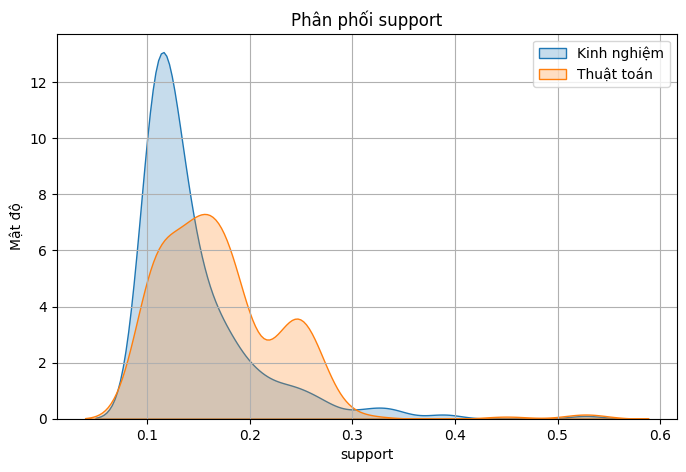

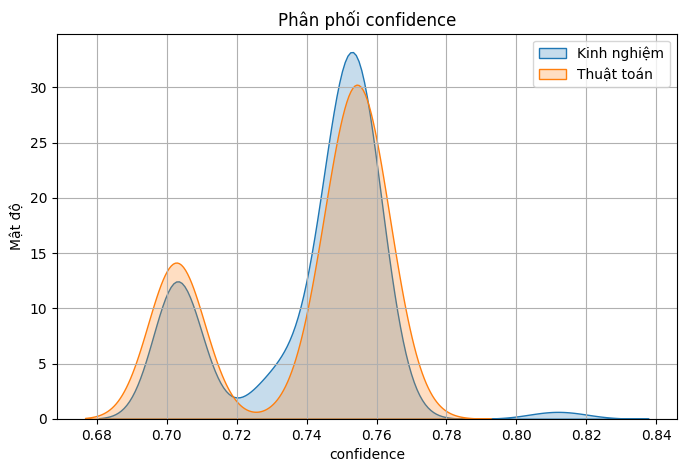

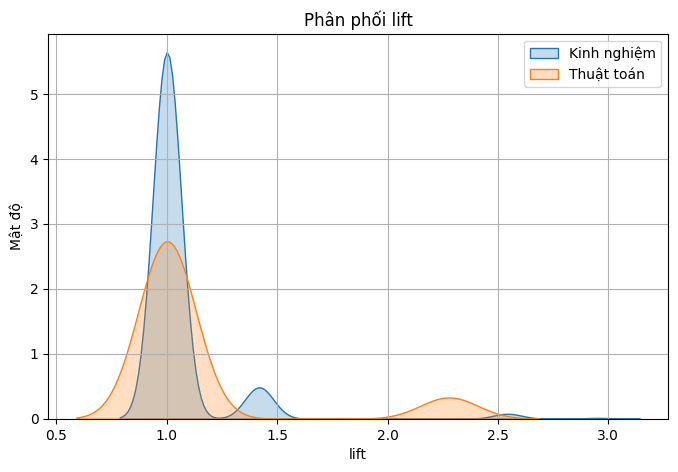

In [99]:

def plot_metric_compare(exp_rules, algo_rules, metric):
    plt.figure(figsize=(8,5))
    sns.kdeplot(exp_rules[metric], label='Kinh nghiệm', fill=True)
    sns.kdeplot(algo_rules[metric], label='Thuật toán', fill=True)
    plt.title(f'Phân phối {metric}')
    plt.xlabel(metric)
    plt.ylabel('Mật độ')
    plt.legend()
    plt.grid(True)
    plt.show()

for metric in ['support', 'confidence', 'lift']:
    plot_metric_compare(exp_rules, algo_rules, metric)



*   Cách rời rạc theo **kinh nghiệm** thường gom đúng nhóm có hành vi tương đồng, nên các item kết hợp đồng đều và phổ biến, nhưng ít khi quá nổi trội; Rời rạc theo **chia đều** theo số lượng (quantile), nên có thể trùng những nhóm rất đông người (→ tạo luật rất phổ biến).
*   2 phương pháp đều tạo ra luật khá đáng tin, nhưng kinh nghiệm cho độ ổn định tốt hơn trên toàn bộ luật.

*   Kỹ thuật rời rạc bằng kinh nghiệm tạo ra các luật ổn định, dễ tin cậy và dễ diễn giải. Trong khi đó, rời rạc bằng thuật toán có khả năng tạo ra một số luật có lift rất cao, nhưng thường ít phổ biến




#4. Mô hình phân loại (Classification)

##4.1 Xây dựng các hàm huấn luyện(Decision Tree, Naive Bayes)

### 4.1.1 Hàm huấn luyện mô hình cây quyết định(Decision Tree)

Quy trình tổng thể của hàm train_decision_tree:

- Xử lý dữ liệu đầu vào: gán nhãn, encode, chọn đặc trưng.

- Chuẩn hóa dữ liệu đầu vào bằng StandardScaler.

- Tách tập dữ liệu thành train / holdout / test theo phân phối đều (stratify).

- Cân bằng tập train bằng SMOTE để xử lý mất cân bằng lớp.

- Tìm giá trị pruning tốt nhất (ccp_alpha) bằng validation set.

- Đánh giá mô hình tốt nhất trên tập test và hiển thị các chỉ số, vẽ biểu đồ.

- Trực quan hóa mô hình cây quyết định.

- Trả về mô hình tốt nhất và các metric đánh giá.



In [100]:
from imblearn.over_sampling import SMOTE
from IPython.display import display

def train_decision_tree(df, target_col, target_binning_func=None,
                        criterion='gini', max_depth=None, min_samples_leaf=5,
                        plot_tree_flag=True, verbose=True,
                        selected_features=None, max_alphas=20):

    data = df.copy()

    # Gán nhãn mục tiêu
    if target_binning_func:
        data['target'] = data[target_col].apply(target_binning_func)
    else:
        data['target'] = data[target_col]

    class_names = sorted(data['target'].unique())

    # Encode object
    categorical_cols = data.select_dtypes(include='object').columns.tolist()
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    # X, y
    if selected_features:
        X = data[selected_features].copy()
    else:
        X = data.drop(columns=[target_col, 'target'])
    y = data['target']

    # Scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Tách dữ liệu stratified
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    X_train, X_holdout, y_train, y_holdout = train_test_split(
        X_train_val, y_train_val, test_size=0.1, random_state=42, stratify=y_train_val
    )

    # Cân bằng tập train bằng SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Pruning bằng cost-complexity
    path = DecisionTreeClassifier(criterion=criterion,
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=42).cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas_all = path.ccp_alphas[:-1]

    # Giới hạn số lượng alpha để tránh quá nhiều mô hình
    if len(ccp_alphas_all) > max_alphas:
        ccp_alphas = np.linspace(ccp_alphas_all[0], ccp_alphas_all[-1], num=max_alphas)
    else:
        ccp_alphas = ccp_alphas_all

    models = []
    for alpha in ccp_alphas:
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                     min_samples_leaf=min_samples_leaf,
                                     ccp_alpha=alpha, random_state=42)
        clf.fit(X_train, y_train)
        acc = clf.score(X_holdout, y_holdout)
        models.append((clf, acc, alpha))

    #Chọn mô hình tốt nhất
    best_clf, best_acc, best_alpha = max(models, key=lambda x: x[1])

    # Đánh giá mô hình tốt nhất trên tập test
    y_pred_test = best_clf.predict(X_test)
    report = classification_report(y_test, y_pred_test, target_names=[str(c) for c in class_names], zero_division=0,output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    cm = confusion_matrix(y_test, y_pred_test)

    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred_test, average='macro', zero_division=0)

    if verbose:
        # Hiển thị tỷ lệ phần trăm:
        print((data['target'].value_counts(normalize=True) * 100).round(2))
        print(f"\n** Mô hình tốt nhất sử dụng ccp_alpha = {best_alpha:.5f}")
        print("\n---- Đánh giá trên tập test ----")
        print("\n------ Ma trận nhầm lẫn: ------")
        print(cm)
        print("\n------ Biểu đồ ma trận nhầm lẫn: ------")
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix on Test Set")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
        print("\n------ Báo cáo phân loại: ------")
        print(classification_report(y_test, y_pred_test, target_names=[str(c) for c in class_names], zero_division=0))

    if plot_tree_flag:
        dot_data = export_graphviz(
            best_clf,
            out_file=None,
            feature_names=X.columns if isinstance(X, pd.DataFrame) else selected_features,
            class_names=[str(name) for name in class_names],
            filled=True,
            rounded=True,
            special_characters=True
        )
        dot_data = 'digraph Tree {\n  graph [size="15,8"];\n' + dot_data.split('\n', 1)[1]
        graph = graphviz.Source(dot_data)
        display(graph)

    metrics = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm,
        'classification_report': report_df,
        'best_alpha': best_alpha
    }

    return best_clf, metrics


###4.1.2 Huấn luyện mô hình Naive Bayes (GaussianNB) cho bài toán phân loại.



In [101]:
from sklearn.naive_bayes import GaussianNB

def train_naive_bayes(df, target_col, target_binning_func=None,
                      verbose=True, selected_features=None):
    data = df.copy()

    # Binning nếu cần
    if target_binning_func:
        data['target'] = data[target_col].apply(target_binning_func)
    else:
        data['target'] = data[target_col]

    class_names = sorted(data['target'].unique())

    # Encode các cột object
    categorical_cols = data.select_dtypes(include='object').columns.tolist()
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    # Tách X và y
    if selected_features:
        X = data[selected_features].copy()
    else:
        X = data.drop(columns=[target_col, 'target'])
    y = data['target']

    # Chuẩn hóa
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Tách tập train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    # Cân bằng bằng SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Huấn luyện mô hình
    clf = GaussianNB()
    clf.fit(X_train, y_train)

    # Dự đoán trên test
    y_pred_test = clf.predict(X_test)

    # Đánh giá
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test,
                                   target_names=[str(name) for name in class_names],
                                   output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()

    if verbose:
        print("\n---- Đánh giá trên tập test ----")
        print("\n---- Ma trận nhầm lẫn: ----")
        print(cm)
        print("\n---- Biểu đồ của ma trận: ----")
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix on Test Set")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

        print("\n---- Báo cáo đánh giá: ----")
        print(classification_report(y_test, y_pred_test,
                                    target_names=[str(name) for name in class_names],
                                    zero_division=0))

    metrics = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm,
        'classification_report': report_df
    }

    return clf, metrics


###4.1.3 Hàm so sánh 2 mô hình

In [102]:

def compare_models(metrics_dt, metrics_nb, model_names=('Decision Tree', 'Naive Bayes')):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']

    dt_scores = [metrics_dt[m] for m in metrics]
    nb_scores = [metrics_nb[m] for m in metrics]

    # Bảng so sánh các chỉ số
    compare_df = pd.DataFrame({
        model_names[0]: dt_scores,
        model_names[1]: nb_scores
    }, index=metrics)

    print("\n📊 So sánh hiệu suất giữa hai mô hình:")
    display(compare_df)

    # Biểu đồ cột
    ax = compare_df.plot(kind='bar', figsize=(9, 5), rot=0, color=['#4CAF50', '#FF9800'])
    plt.title("Hiệu suất của hai mô hình trên tập test")
    plt.ylabel("Chỉ số")
    plt.ylim(0, 1.05)
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2 - 0.05, p.get_height() + 0.01), fontsize=9)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    # Ma trận nhầm lẫn
    print("\n📉 Ma trận nhầm lẫn -", model_names[0])
    cm_dt = metrics_dt['confusion_matrix']
    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_names[0]}")
    plt.xlabel("Dự đoán")
    plt.ylabel("Thực tế")
    plt.show()
    # Tổng số đúng/sai
    dt_correct = np.trace(cm_dt)
    dt_total = np.sum(cm_dt)
    print(f"\n * {model_names[0]}: Dự đoán đúng {dt_correct}/{dt_total} mẫu ({dt_correct/dt_total:.2%})")

    # Ma trận nhầm lẫn
    print("\n📉 Ma trận nhầm lẫn -", model_names[1])
    cm_nb = metrics_nb['confusion_matrix']
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges')
    plt.title(f"Confusion Matrix - {model_names[1]}")
    plt.xlabel("Dự đoán")
    plt.ylabel("Thực tế")
    plt.show()
    # Tổng số đúng/sai
    nb_correct = np.trace(cm_nb)
    nb_total = np.sum(cm_nb)
    print(f"\n * {model_names[1]}: Dự đoán đúng {nb_correct}/{nb_total} mẫu ({nb_correct/nb_total:.2%})")

    # Kết luận
    avg_dt = np.mean(dt_scores)
    avg_nb = np.mean(nb_scores)
    print("\n ** Kết luận: ")
    if avg_dt > avg_nb:
        print(f"=> Mô hình **{model_names[0]}** hoạt động tốt hơn tổng thể.")
    elif avg_dt < avg_nb:
        print(f"=> Mô hình **{model_names[1]}** hoạt động tốt hơn tổng thể.")
    else:
        print("=> Hai mô hình có hiệu suất tương đương.")



##4.2 Dự đoán khả năng burnout

target
0    50.12
1    49.88
Name: proportion, dtype: float64

** Mô hình tốt nhất sử dụng ccp_alpha = 0.00019

---- Đánh giá trên tập test ----

------ Ma trận nhầm lẫn: ------
[[2408  599]
 [2393  600]]

------ Biểu đồ ma trận nhầm lẫn: ------


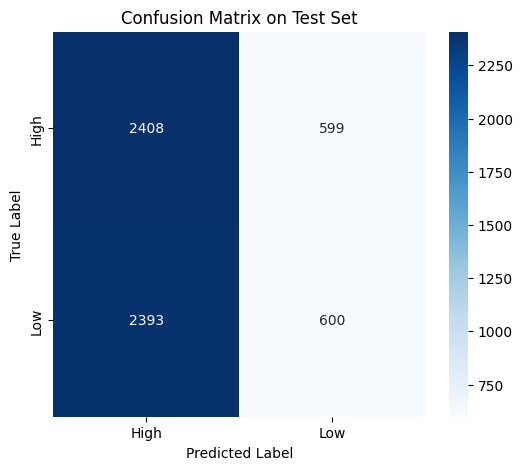


------ Báo cáo phân loại: ------
              precision    recall  f1-score   support

        High       0.50      0.80      0.62      3007
         Low       0.50      0.20      0.29      2993

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.45      6000
weighted avg       0.50      0.50      0.45      6000



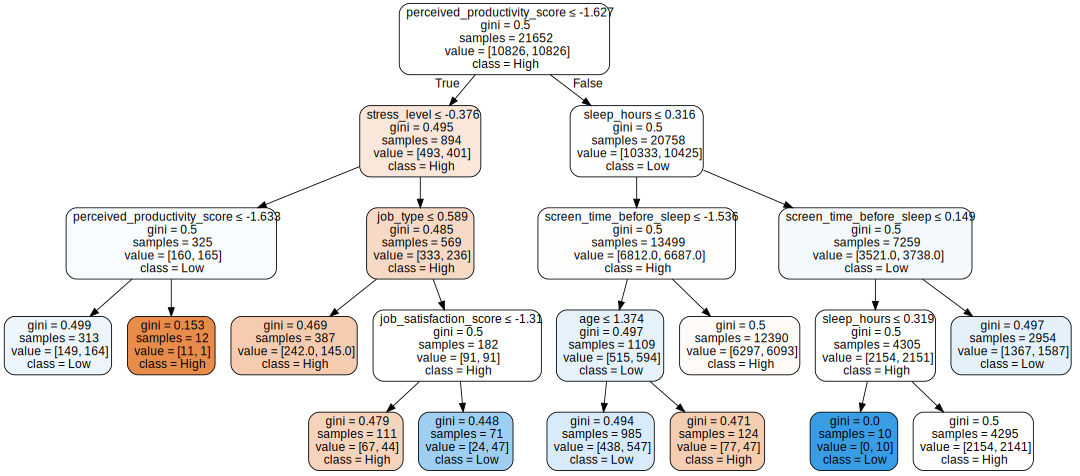

In [103]:
features_burnout = [
    'age',
    'job_type',
    'work_hours_per_day',
    'sleep_hours',
    'breaks_during_work',
    'screen_time_before_sleep',
    'daily_social_media_time',
    'weekly_offline_hours',
    'coffee_consumption_per_day',
    'has_digital_wellbeing_enabled',
    'job_satisfaction_score',
    'stress_level',
    'perceived_productivity_score'
]

# Chuyển days_feeling_burnout_per_month thành nhị phân: Burnout hay không
def bin_burnout(days):
    if days <= 15:
        return "Low"
    else:
        return "High"

# Bước 2: Dùng tiêu chí được chọn để huấn luyện mô hình cuối
model_b, metrics_b = train_decision_tree(df, 'days_feeling_burnout_per_month',
                                         target_binning_func=bin_burnout,
                                         max_depth=4,
                                         min_samples_leaf=5,
                                         plot_tree_flag=True,selected_features=features_burnout)

* Cây quyết định trên tập huấn luyện:
  - Perceived_productivity_score (điểm năng suất tự đánh giá) là yếu tố quan trọng nhất (nút gốc) trong mô hình cây quyết định để dự đoán burnout.
  - Một số lá của cây có độ chính xác cao (gini rất thấp, ví dụ gini = 0.0) → cho thấy khả năng phân loại rõ ràng ở một số nhóm đối tượng.


* Kết quả dự đoán trên tập test:

  - Ma trận nhầm lẫn cho thấy:

    • Dự đoán đúng lớp High: 2408 mẫu (True Positive)

    • Dự đoán sai lớp Low thành High: 2393 mẫu (False Positive)

    • Dự đoán đúng lớp Low: 600 mẫu (True Negative)

    • Dự đoán sai lớp High thành Low: 599 mẫu (False Negative)

  - Các chỉ số đánh giá đều khá thấp, chỉ bằng hiệu suất ngẫu nhiên

  => Mô hình Cây quyết định chưa đạt hiệu quả tốt trong việc phân loại giữa hai nhóm High và Low.


---- Đánh giá trên tập test ----

---- Ma trận nhầm lẫn: ----
[[1541 1466]
 [1606 1387]]

---- Biểu đồ của ma trận: ----


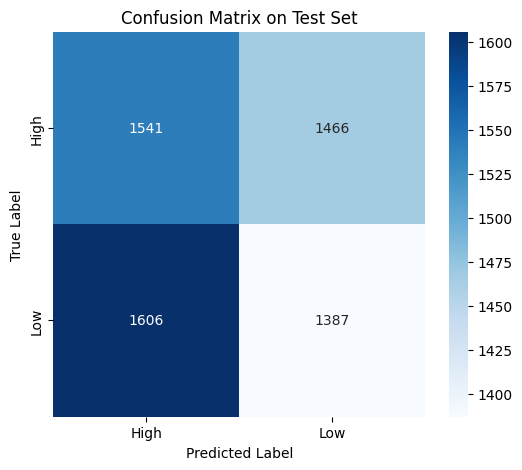


---- Báo cáo đánh giá: ----
              precision    recall  f1-score   support

        High       0.49      0.51      0.50      3007
         Low       0.49      0.46      0.47      2993

    accuracy                           0.49      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.49      0.49      0.49      6000



In [104]:
# Mô hình Naive Bayes
model_Naive_b, metrics_Naive_b = train_naive_bayes(df, 'days_feeling_burnout_per_month',
                                   target_binning_func=bin_burnout,
                                   selected_features=features_burnout)

Ma trận nhầm lẫn:

- Dự đoán đúng lớp High: 1541 mẫu (True Positive)

- Dự đoán sai lớp Low thành High: 1606 mẫu (False Positive)

- Dự đoán đúng lớp Low: 1387 mẫu (True Negative)

- Dự đoán sai lớp High thành Low: 1466 mẫu (False Negative)

Các chỉ số đánh giá nhìn chung là tương đối thấp => mô hình nave bayes không phù hợp để phân loại burnout


📊 So sánh hiệu suất giữa hai mô hình:


Decision Tree  Naive Bayes
accuracy        0.501333     0.488000
precision       0.500990     0.487914
recall          0.500633     0.487943
f1_score        0.451531     0.487662

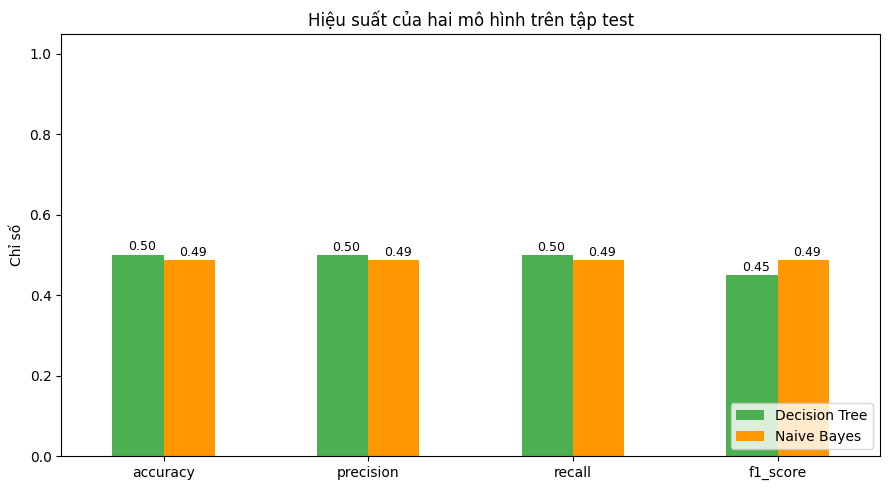


📉 Ma trận nhầm lẫn - Decision Tree


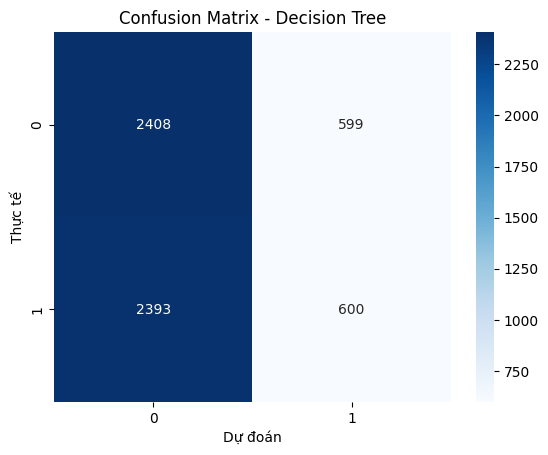


 * Decision Tree: Dự đoán đúng 3008/6000 mẫu (50.13%)

📉 Ma trận nhầm lẫn - Naive Bayes


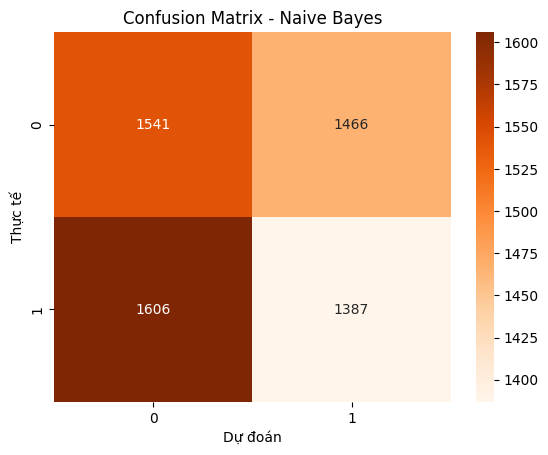


 * Naive Bayes: Dự đoán đúng 2928/6000 mẫu (48.80%)

 ** Kết luận: 
=> Mô hình **Decision Tree** hoạt động tốt hơn tổng thể.


In [105]:
# So sánh
compare_models(metrics_b, metrics_Naive_b)

##4.3 Dự đoán năng suất thực tế



target
2    37.37
1    31.92
0    30.70
Name: proportion, dtype: float64

** Mô hình tốt nhất sử dụng ccp_alpha = 0.00000

---- Đánh giá trên tập test ----

------ Ma trận nhầm lẫn: ------
[[ 175 1029  638]
 [ 192 1049  674]
 [ 208 1234  801]]

------ Biểu đồ ma trận nhầm lẫn: ------


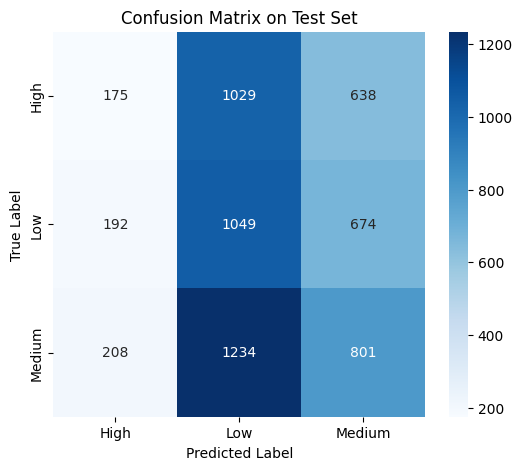


------ Báo cáo phân loại: ------
              precision    recall  f1-score   support

        High       0.30      0.10      0.14      1842
         Low       0.32      0.55      0.40      1915
      Medium       0.38      0.36      0.37      2243

    accuracy                           0.34      6000
   macro avg       0.33      0.33      0.30      6000
weighted avg       0.34      0.34      0.31      6000



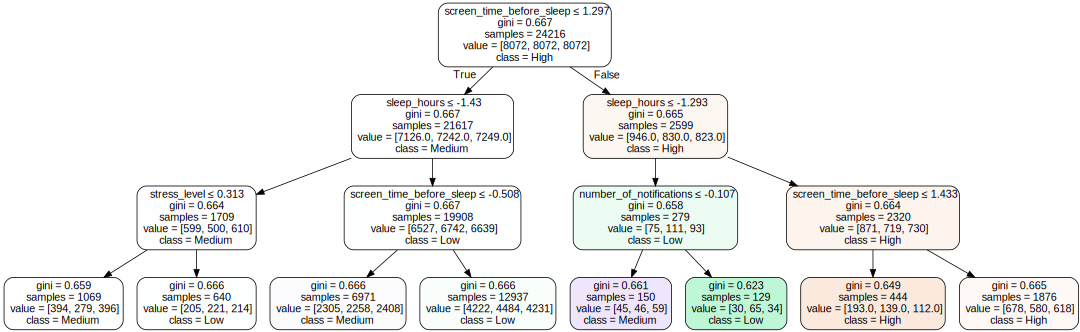

In [106]:
features_productivity = [
    'sleep_hours', 'stress_level', 'screen_time_before_sleep',
    'daily_social_media_time', 'number_of_notifications',
    'breaks_during_work', 'coffee_consumption_per_day'
]

def bin_productivity(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

model_p, metrics_p = train_decision_tree(df, 'actual_productivity_score',
                                         target_binning_func=bin_productivity,
                                         max_depth=3,
                                         min_samples_leaf=5,
                                         plot_tree_flag=True,selected_features=features_productivity)

* Cây quyết định:
  - Screen_time_before_sleep (thời gian dùng thiết bị trước khi ngủ) là yếu tố quan trọng nhất (nút gốc) trong việc phân loại năng suất thực tế theo mô hình cây quyết định.
  - Gini trung bình ≈ 0.66 → cho thấy mô hình phân biệt chưa tốt giữa các nhóm năng suất, mức độ hỗn tạp giữa các lớp còn cao.

* Đánh giá trên tập test:

  - Độ chính xác tổng thể (Accuracy) của mô hình chỉ đạt 34%, thấp hơn
đáng kể so với mức mong đợi cho bài toán 3 lớp.
  - hả năng nhận diện nhóm năng suất
cao (High) và trung bình (Medium) còn yếu.
 - Các chỉ số đánh giá khác đều rất thấp, chỉ số macro và weighted average đều xấp xỉ 0.30–0.34, phản ánh
rằng hiệu suất chung của mô hình không đạt yêu cầu.


---- Đánh giá trên tập test ----

---- Ma trận nhầm lẫn: ----
[[526 618 698]
 [614 622 679]
 [663 772 808]]

---- Biểu đồ của ma trận: ----


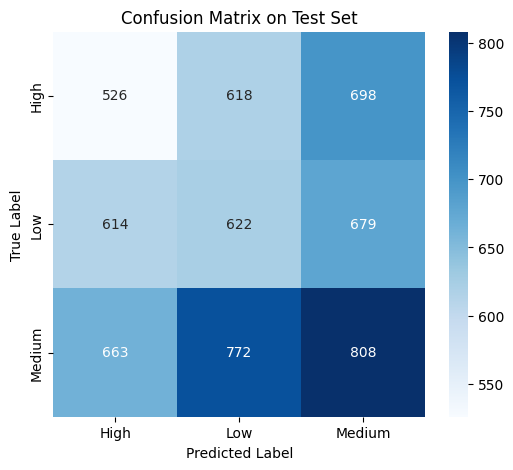


---- Báo cáo đánh giá: ----
              precision    recall  f1-score   support

        High       0.29      0.29      0.29      1842
         Low       0.31      0.32      0.32      1915
      Medium       0.37      0.36      0.36      2243

    accuracy                           0.33      6000
   macro avg       0.32      0.32      0.32      6000
weighted avg       0.33      0.33      0.33      6000



In [107]:
# Mô hình Naive Bayes
model_Naive_p, metrics_Naive_p = train_naive_bayes(df, 'actual_productivity_score',
                                   target_binning_func=bin_productivity,
                                   selected_features=features_productivity)

- Từ ma trận nhầm lẫn, có thể thấy mô hình gặp khó khăn trong việc phân
biệt giữa ba lớp, đặc biệt là dự đoán nhầm sang lớp Medium chiếm tỷ lệ
lớn

- Độ chính xác tổng thể khoảng 34%, thấp hơn
so với kỳ vọng và không đáng tin cậy cho phân loại thực tế.


📊 So sánh hiệu suất giữa hai mô hình:


Decision Tree  Naive Bayes
accuracy        0.337500     0.326000
precision       0.333386     0.323558
recall          0.333299     0.323532
f1_score        0.304651     0.323449

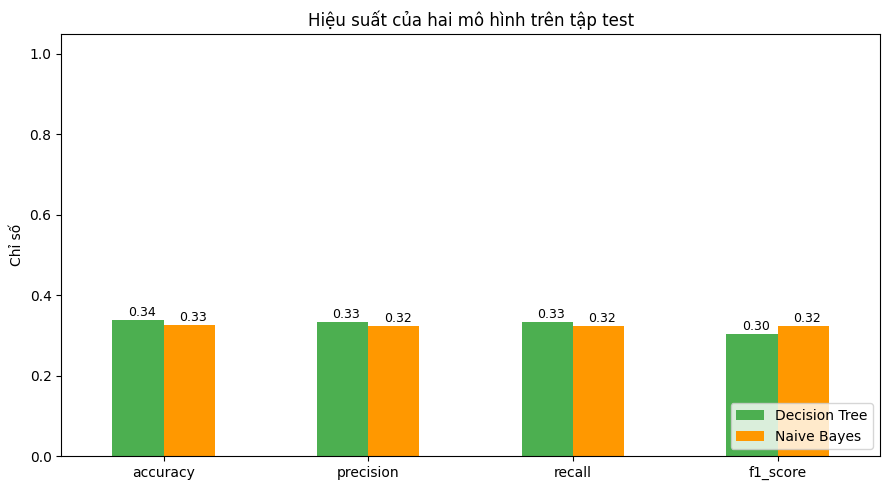


📉 Ma trận nhầm lẫn - Decision Tree


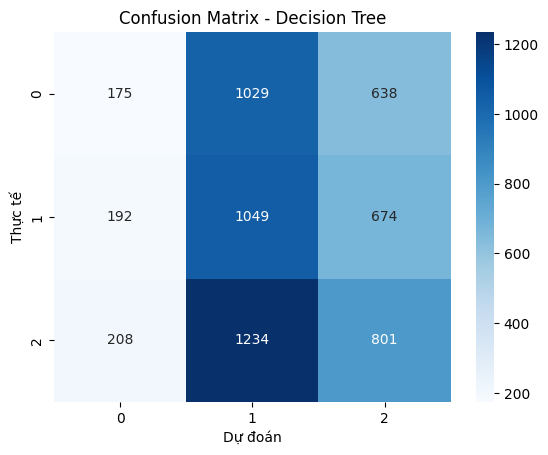


 * Decision Tree: Dự đoán đúng 2025/6000 mẫu (33.75%)

📉 Ma trận nhầm lẫn - Naive Bayes


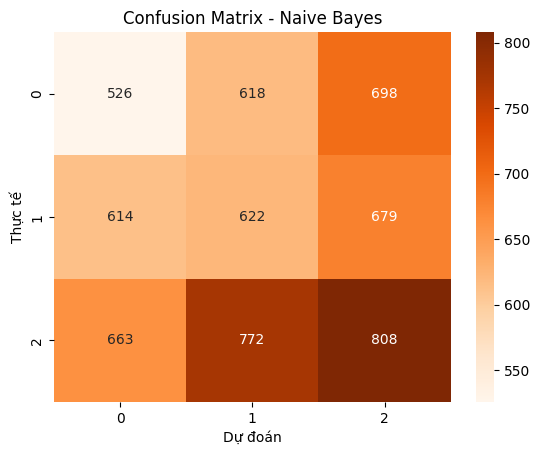


 * Naive Bayes: Dự đoán đúng 1956/6000 mẫu (32.60%)

 ** Kết luận: 
=> Mô hình **Decision Tree** hoạt động tốt hơn tổng thể.


In [108]:
# So sánh
compare_models(metrics_p, metrics_Naive_p)

#5. Mô hình hồi quy


=== Kết quả hồi quy cho biến actual_productivity_score ===
--> MSE : 0.540
--> R²  : 0.833


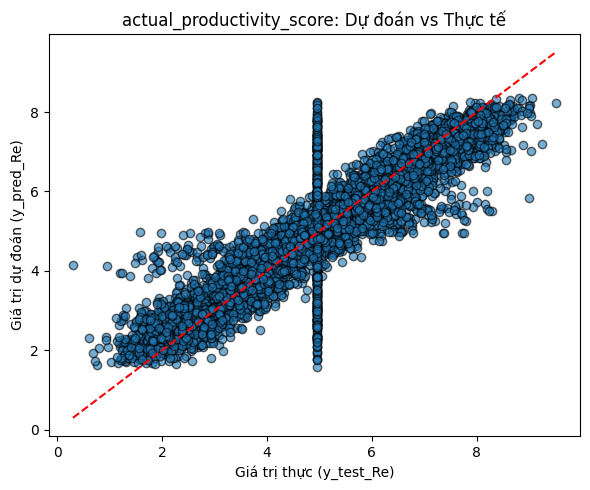

In [109]:
# ==== 1. Thư viện cần thiết ====
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_Re = df.copy()
# ==== 2. Chọn biến mục tiêu ====
target_col_Re = "actual_productivity_score"

# ==== 3. Tách dữ liệu thành đầu vào X và mục tiêu y ====
X_Re = df_Re.drop(columns=[target_col_Re])
y_Re = df_Re[target_col_Re]

# ==== 4. Phân loại cột số và cột phân loại ====
num_cols_Re = X_Re.select_dtypes(include="number").columns.tolist()
cat_cols_Re = X_Re.select_dtypes(exclude="number").columns.tolist()

# ==== 5. Tạo bộ tiền xử lý: scale cột số + one-hot cột phân loại ====
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols_Re),  # Chuẩn hóa cột số
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_Re)  # Mã hóa one-hot cột phân loại
])

# ==== 6. Chia tập train và test ====
X_train_Re, X_test_Re, y_train_Re, y_test_Re = train_test_split(
    X_Re, y_Re, test_size=0.2, random_state=42)

# ==== 7. Tạo pipeline huấn luyện Linear Regression ====
model_Re = Pipeline([
    ("prep", preprocessor),  # Gồm scale và one-hot
    ("linreg", LinearRegression())  # Hồi quy tuyến tính
])

# ==== 8. Huấn luyện mô hình ====
model_Re.fit(X_train_Re, y_train_Re)

# ==== 9. Dự đoán trên tập test ====
y_pred_Re = model_Re.predict(X_test_Re)

# ==== 10. Đánh giá mô hình bằng MSE và R² ====
mse = mean_squared_error(y_test_Re, y_pred_Re)
r2  = r2_score(y_test_Re, y_pred_Re)

print("\n=== Kết quả hồi quy cho biến actual_productivity_score ===")
print(f"--> MSE : {mse:.3f}")
print(f"--> R²  : {r2 :.3f}")

# ==== 11. Vẽ biểu đồ scatter y_test vs y_pred ====
plt.figure(figsize=(6, 5))
plt.scatter(y_test_Re, y_pred_Re, alpha=0.6, edgecolors="k")
plt.plot([y_test_Re.min(), y_test_Re.max()],
         [y_test_Re.min(), y_test_Re.max()],
         linestyle="--", color="red")
plt.title("actual_productivity_score: Dự đoán vs Thực tế")
plt.xlabel("Giá trị thực (y_test_Re)")
plt.ylabel("Giá trị dự đoán (y_pred_Re)")
plt.tight_layout()
plt.show()



# 6 Cluster

Gôm nhóm dữ liệu thành các cụm có tính chất tương đồng - bài toán học không giám sát, không gán nhãn

In [110]:
data = df.copy()

data=data.rename(columns={
    'age': 'age',
    'gender': 'gender',
    'job_type': 'job_type',
    'daily_social_media_time': 'daily_social_time',
    'social_platform_preference': 'preferred_platform',
    'number_of_notifications': 'notifications',
    'work_hours_per_day': 'work_hours',
    'perceived_productivity_score': 'perceived_productivity',
    'actual_productivity_score': 'actual_productivity',
    'stress_level': 'stress',
    'sleep_hours': 'sleep',
    'screen_time_before_sleep': 'screen_time_before_sleep',
    'breaks_during_work': 'breaks_during_work',
    'uses_focus_apps': 'uses_focus_app',
    'has_digital_wellbeing_enabled': 'wellbeing_enabled',
    'coffee_consumption_per_day': 'coffee_per_day',
    'days_feeling_burnout_per_month': 'burnout_days',
    'weekly_offline_hours': 'offline_hours',
    'job_satisfaction_score': 'job_satisfaction'
    })
data.head()

age  gender    job_type  daily_social_time preferred_platform  \
0   56    Male  Unemployed           4.180940           Facebook   
1   46    Male      Health           3.249603            Twitter   
2   32    Male     Finance           3.025913            Twitter   
3   60  Female  Unemployed           3.025913           Facebook   
4   25    Male          IT           3.025913           Telegram   

   notifications  work_hours  perceived_productivity  actual_productivity  \
0             61    6.753558                8.040464             7.291555   
1             59    9.169296                5.063368             5.165093   
2             57    7.910952                3.861762             3.474053   
3             59    6.355027                2.916331             1.774869   
4             66    6.214096                8.868753             4.951742   

   stress     sleep  screen_time_before_sleep  breaks_during_work  \
0     4.0  5.116546                  0.419102                   8   
1     7.0  5.103897                  0.671519                   7   
2     4.0  8.583222                  0.624378                   0   
3     6.0  6.052984                  1.204540                   1   
4     7.0  5.405706                  1.876254                   1   

   uses_focus_app  wellbeing_enabled  coffee_per_day  burnout_days  \
0               0                  0               4            11   
1               1                  1               2            25   
2               1                  0               3            17   
3               0                  0               0             4   
4               0                  1               1            30   

   offline_hours  job_satisfaction  
0      21.927072          6.336688  
1       0.000000          3.412427  
2      10.322044          2.474944  
3      23.876616          1.733670  
4      10.653519          9.693060

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       30000 non-null  int64  
 1   gender                    30000 non-null  object 
 2   job_type                  30000 non-null  object 
 3   daily_social_time         30000 non-null  float64
 4   preferred_platform        30000 non-null  object 
 5   notifications             30000 non-null  int64  
 6   work_hours                30000 non-null  float64
 7   perceived_productivity    30000 non-null  float64
 8   actual_productivity       30000 non-null  float64
 9   stress                    30000 non-null  float64
 10  sleep                     30000 non-null  float64
 11  screen_time_before_sleep  30000 non-null  float64
 12  breaks_during_work        30000 non-null  int64  
 13  uses_focus_app            30000 non-null  int64  
 14  wellbe

## 6.1 K-MEANS

### 6.1.1 Endcode các trường phân loại

In [112]:

df_kmeans = data.copy()
categorical_cols = [
    'gender', 'job_type', 'preferred_platform',
    'uses_focus_app', 'wellbeing_enabled'
]

numerical_cols = [col for col in df_kmeans.columns if col not in categorical_cols]

In [113]:
#Encode các biến phân loại
df_kemans = pd.get_dummies(df_kmeans, columns=categorical_cols, drop_first=True)

### 6.1.2 Đánh giá đặc trưng bằng Entropy

Entropy chỉ số để đo mức độ **hỗn loạn**, **ngẫu nhiên** của một tập dữ liệu


*   Entropy thấp - dữ liệu của đặc trưng phân bổ rất đều ==> không có lợi cho phân cụm
*   Entropy cao - giá trị của đặc trưng đa dạng



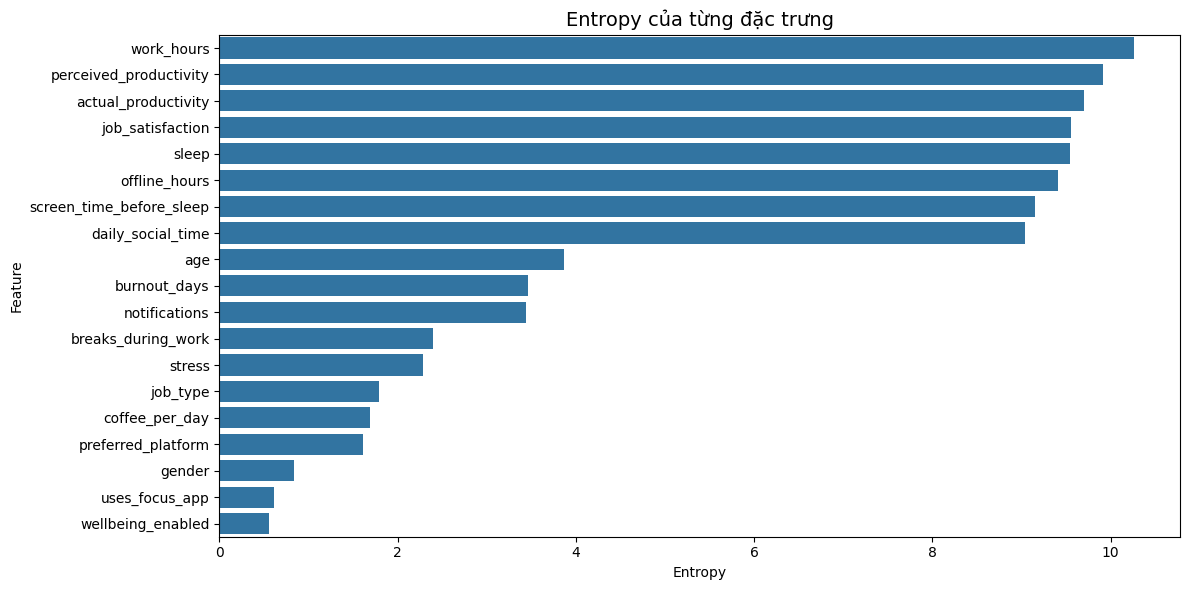

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
# Tính Entropy
entropy_list = []

for col in df_kmeans.columns:
    ent = entropy(df_kmeans[col].value_counts(normalize=True))
    entropy_list.append({"Feature": col, "Entropy": ent})

df_entropy = pd.DataFrame(entropy_list).sort_values(by="Entropy", ascending=False)

# Vẽ biểu đồ Entropy
plt.figure(figsize=(12, 6))
sns.barplot(data=df_entropy, x="Entropy", y="Feature")
plt.title("Entropy của từng đặc trưng", fontsize=14)
plt.xlabel("Entropy")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [115]:
# Lấy các đặc trưng có entropy >3
selected_features = []
for col in df_kmeans.columns:
    ent = entropy(df_kmeans[col].value_counts(normalize=True))
    if ent > 3:
        selected_features.append(col)

In [116]:
df_kmeans_ent = df_kmeans[selected_features].copy()


### 6.1.3 Tìm số phân cụm tối ưu

Tìm số phân cụm tối ưu bằng phương pháp **elbow** (khuỷu tay)

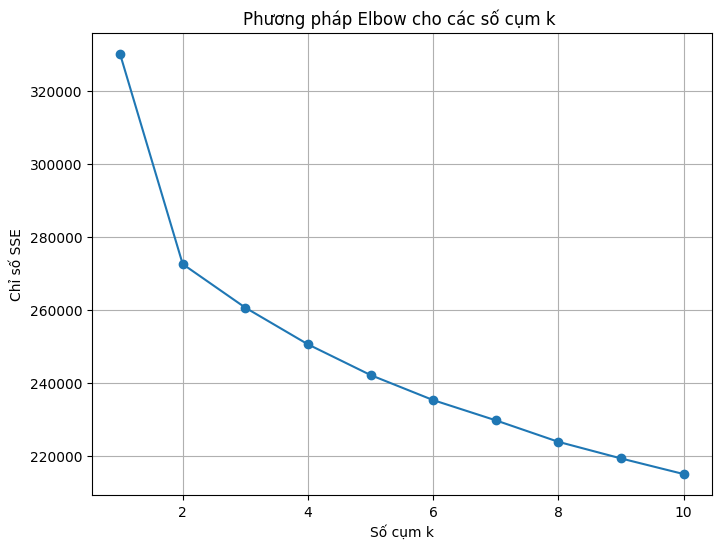

In [117]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
X_kmeans = scaler.fit_transform(df_kmeans_ent)

inertia = []

# Lặp qua các giá trị k từ 1 đến 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_kmeans)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị Elbow Method
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Phương pháp Elbow cho các số cụm k ')
plt.xlabel('Số cụm k')
plt.ylabel('Chỉ số SSE')
plt.grid(True)
plt.show()






*   k từ 1 đến 3 thì SSE giảm mạnh
*   k từ 3 trở đi SSE tiếp tục giảm dần đều  
==> Nên chọn số cụm tối ưu nên xem xét giữa: **k=3**



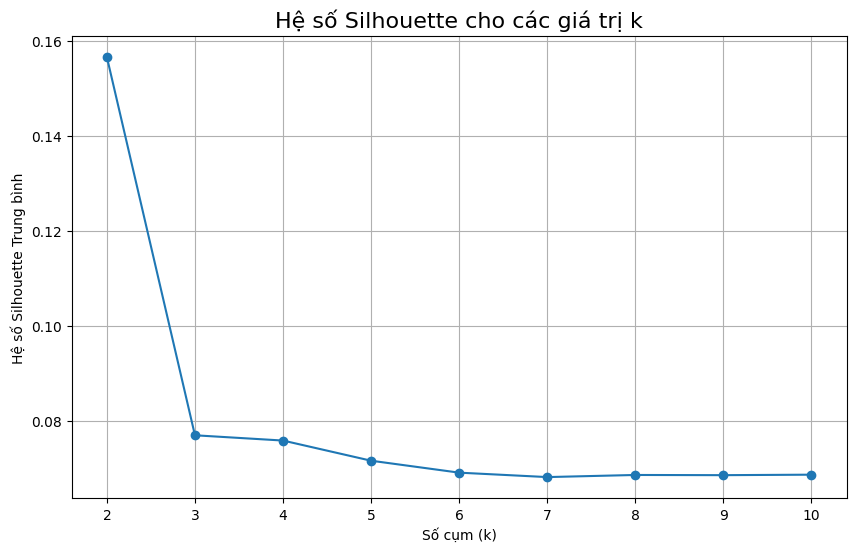

In [118]:
from sklearn.metrics import silhouette_score
#--- Phương pháp 2: Hệ số Silhouette ---
# Đo lường mức độ một điểm "phù hợp" với cụm của nó so với các cụm khác. Giá trị càng gần 1 càng tốt.
silhouette_coefficients = []
k_range = range(2, 11) # Silhouette cần ít nhất 2 cụm
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_kmeans)
    score = silhouette_score(X_kmeans, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_coefficients, marker='o')
plt.title('Hệ số Silhouette cho các giá trị k', fontsize=16)
plt.xlabel('Số cụm (k)')
plt.ylabel('Hệ số Silhouette Trung bình')
plt.grid(True)
plt.show()

**Gần +1**: điểm dữ liệu được gom cụm rất tốt, ở xa các cụm lân cận.   
**Gần 0**:  điểm dữ liệu nằm gần ranh giới giữa hai cụm.  
**Gần -1**: điểm dữ liệu có thể đã bị gán sai cụm.

In [119]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_kmeans)
score = silhouette_score(X_kmeans, kmeans.labels_)

In [120]:
print(score)

0.07703200074637513


### 6.1.4 Thực hiện phân cụm

In [121]:
from sklearn.metrics import silhouette_score
# Áp dụng KMeans k =3
kmeans = KMeans(n_clusters= 3, random_state=42, n_init='auto')
#df_kmeans_ent['cluster_kmean'] = kmeans.fit_predict(X_kmeans)
y_kmeans = kmeans.fit_predict(X_kmeans)





### 6.1.5 Trực quan

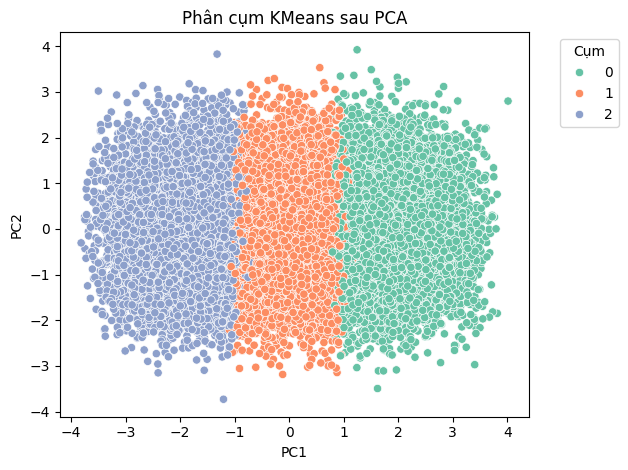

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA giảm xuống 2 chiều
X_pca = PCA(n_components=2).fit_transform(X_kmeans)

# Tạo DataFrame để trực quan
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['cluster'] = y_kmeans

# Vẽ scatter plot với cụm màu
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('Phân cụm KMeans sau PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cụm', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


## 6.2 Agglomerative


### 6.2.1 Endcoding

In [123]:

df_agg = data.copy()
categorical_cols = [
    'gender', 'job_type', 'preferred_platform',
    'uses_focus_app', 'wellbeing_enabled'
]

numerical_cols = [col for col in df_agg.columns if col not in categorical_cols]

#Encode các biến phân loại
df_agg = pd.get_dummies(df_agg, columns=categorical_cols, drop_first=True)

### 6.2.2 Chuẩn hóa

In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
X_agg = scaler.fit_transform(df_agg)


### 6.2.3 Chọn cụm tối ưu

Mặc dù Dendrogram trực quan dễ hiểu nhưng kích thước dữ liệu quá lớn ==> chọn 1000 mẫu ngẫu nhiên để trực quan  

*   Cắt quá thấp → quá nhiều cụm nhỏ, gây nhiễu.
*   Cắt quá cao → quá ít cụm, mất chi tiết.


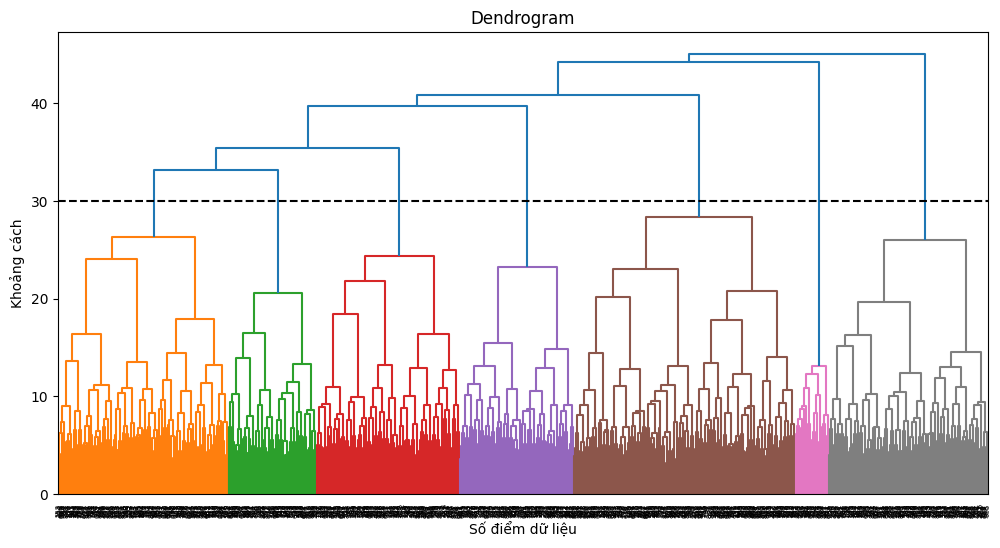

In [125]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Lấy mẫu 1000 điểm từ X_agg
np.random.seed(42)
X_sample = X_agg[np.random.choice(len(X_agg), 1000, replace=False)]

# Dendrogram từ mẫu
linked = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_contracted=True)
plt.axhline(y=30, c='black', linestyle='--', label='Ngưỡng cắt')
plt.title('Dendrogram')
plt.xlabel('Số điểm dữ liệu')
plt.ylabel('Khoảng cách')
plt.show()


Cắt qua 7 nhánh ==> **n_clusters =7**

### 6.2.4 Thực hiện phân cụm



*   Tính khoảng cách bằng: Eculid
*   Dùng liên kết ward



In [126]:
from sklearn.cluster import AgglomerativeClustering

# Sử dụng Agglomerative Clustering với Euclidean + Ward linkage
agg = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')

y_agg = agg.fit_predict(X_agg)


In [127]:
score = silhouette_score(X_agg, agg.labels_)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.0780


### 6.2.5 Trực quan

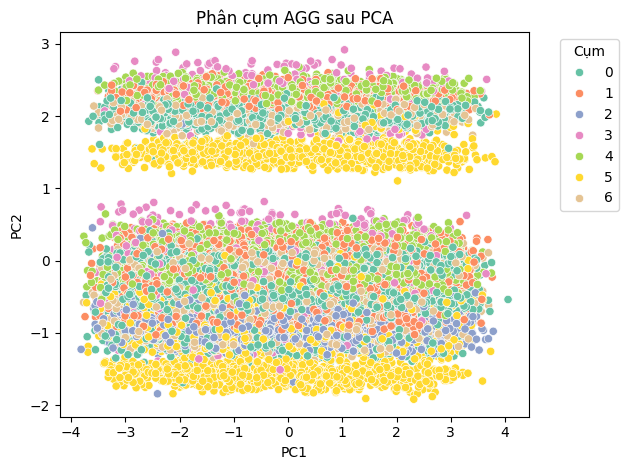

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA giảm xuống 2 chiều
X_pca = PCA(n_components=2).fit_transform(X_agg)

# Tạo DataFrame để trực quan
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['cluster'] = y_agg

# Vẽ scatter plot với cụm màu
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('Phân cụm AGG sau PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cụm', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


## 6.3 Nhận xét

### 6.3.1 K-MEAN

In [129]:
# Gom nhóm lại theo cluster_kmean
#chart = df_kmeans_ent.groupby('cluster_kmean')[selected_features].mean().T
chart = df_kmeans_ent.groupby(y_kmeans)[selected_features].mean().T
chart


0          1          2
age                       41.417398  42.061183  40.903192
daily_social_time          2.977785   3.184051   3.022897
notifications             59.913952  60.000000  59.918786
work_hours                 7.043923   6.908934   7.035982
perceived_productivity     7.717633   5.523314   3.286355
actual_productivity        6.958014   4.966840   2.924069
sleep                      6.459727   6.549648   6.484144
screen_time_before_sleep   1.062423   0.964886   1.049969
burnout_days              15.206767  15.853068  15.571429
offline_hours             10.105027  10.719145  10.180179
job_satisfaction           7.088279   4.943115   2.857680

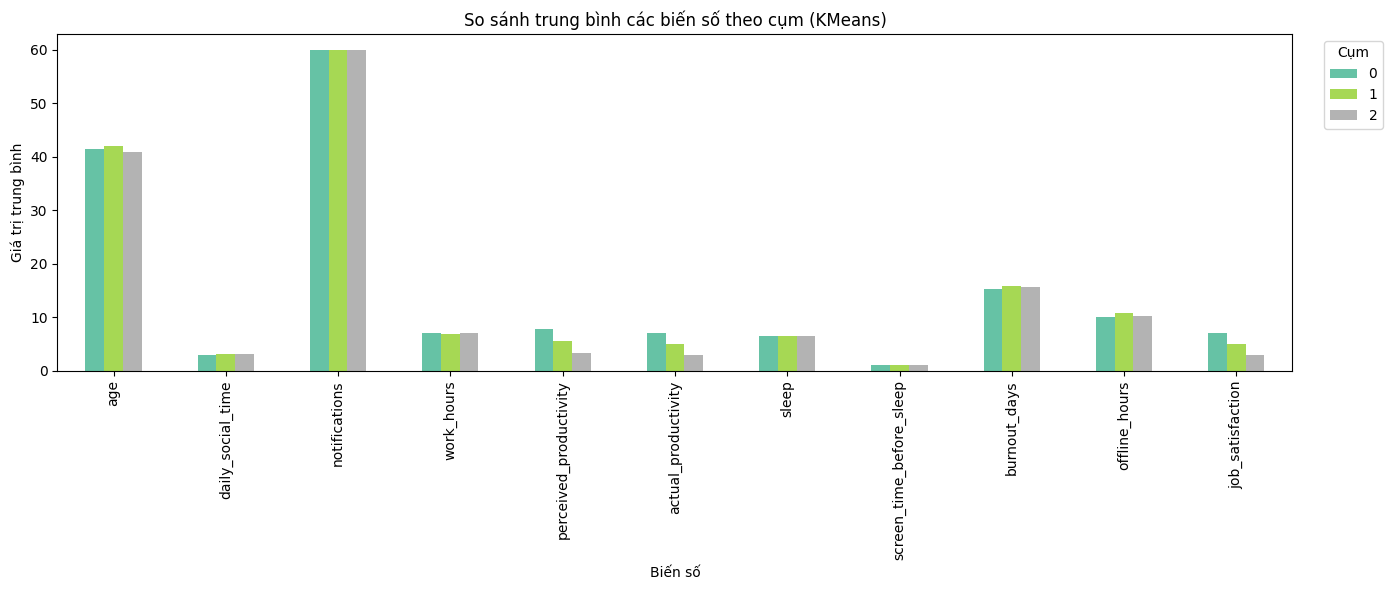

In [130]:
# Trực quan hóa
chart.plot(kind='bar', figsize=(14, 6), colormap='Set2')
plt.title('So sánh trung bình các biến số theo cụm (KMeans)')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Biến số')
plt.legend(title='Cụm', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 6.3.2 Agglomerative

In [131]:
# Gom nhóm lại theo cluster_kmean
#chart = df_agg.groupby('cluster_agg')[selected_features].mean().T
chart =  df_agg.groupby(y_agg)[selected_features].mean().T
chart


0          1          2          3  \
age                       41.643558  41.302640  41.409772  41.679117   
daily_social_time          3.064383   3.102790   3.021036   3.046839   
notifications             59.993730  59.824076  59.758559  60.140917   
work_hours                 6.949273   7.060896   6.980087   6.962437   
perceived_productivity     5.481299   5.533509   5.546447   5.382788   
actual_productivity        4.921876   4.973197   4.992773   4.851485   
sleep                      6.473902   6.490231   6.584931   6.485337   
screen_time_before_sleep   1.013363   1.034797   1.017231   1.009495   
burnout_days              15.636106  15.580993  15.286733  15.550085   
offline_hours             10.404617  10.264740  10.207646  10.604045   
job_satisfaction           4.924464   4.938301   5.083228   4.847657   

                                  4          5          6  
age                       41.362064  41.851171  41.173814  
daily_social_time          3.053499   3.073808   3.072143  
notifications             59.922714  60.019111  60.002486  
work_hours                 7.038031   6.984308   6.986675  
perceived_productivity     5.496682   5.591547   5.494774  
actual_productivity        4.940007   5.037925   4.918530  
sleep                      6.499751   6.482841   6.525117  
screen_time_before_sleep   1.028720   1.014132   1.038855  
burnout_days              15.578465  15.561873  15.532836  
offline_hours             10.381362  10.491947  10.219848  
job_satisfaction           4.966938   5.041501   4.945811

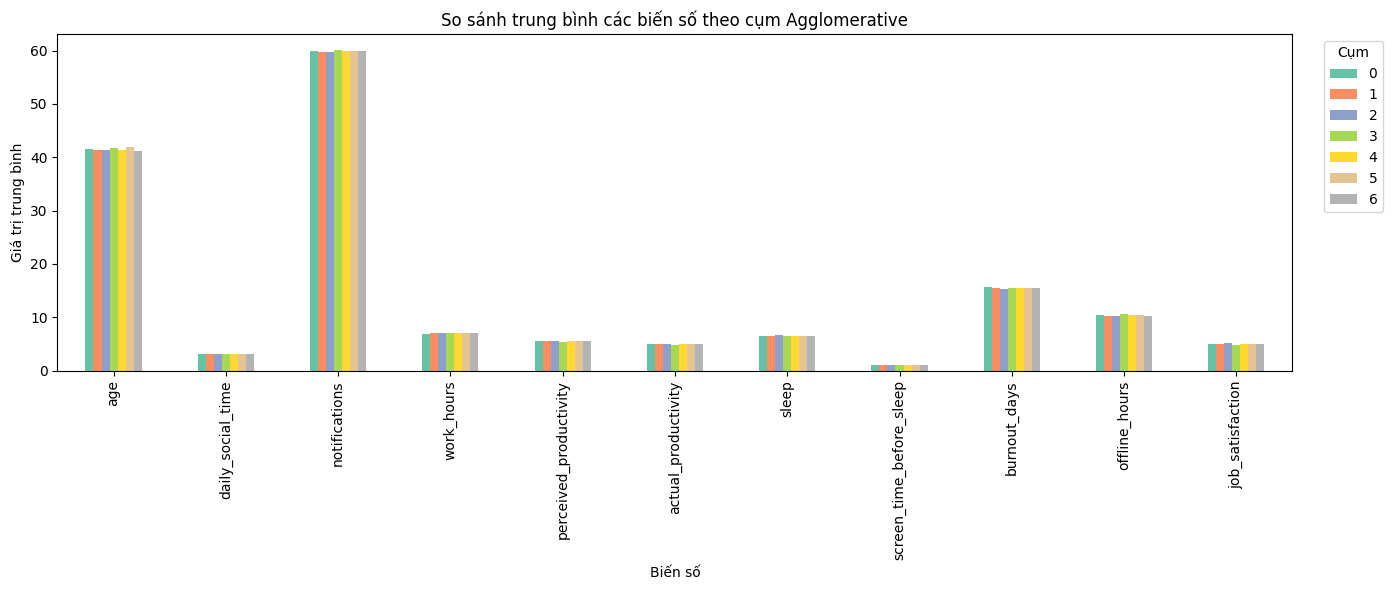

In [132]:
# Trực quan hóa
chart.plot(kind='bar', figsize=(14, 6), colormap='Set2')
plt.title('So sánh trung bình các biến số theo cụm Agglomerative')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Biến số')
plt.legend(title='Cụm', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 6.3.3 Tổng kết

Khi phân cụm bằng **K-MEAN**:  

*   Có chỉ số Silhouette Score: 0.0770 - chất lượng không tố
*   Đồ thị PCA: có vùng giao nhau - trùng lắp ở ranh giới

Khi phân cụm bằng **Agglomerative**:

*   Có chỉ số Silhouette Score: 0.0780 - chất lượng không tốt
*   Đồ thị PCA: các cụm phân bổ không rõ ràng, các điểm dữ liệu có thuộc tính xem kẻ lẫn nhau  

Mặc dù được phân ra thành **nhiều cụm** nhưng thông số về đặc trưng giữa các phân cụm không quá khác biệt - cả hai phương pháp đều tạo ra các cụm **tương đồng nhau**

==> Dữ liệu không tách biệt rõ ràng theo cụm tự nhiên.
Có thể tồn tại nhiều điểm dữ liệu nằm gần ranh giới giữa các cụm, làm giảm khả năng phân cụm



